In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kearas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
interpreter = tf.lite.Interpreter("C:/Users/hjhhi/Desktop/Codes/lite-model_movenet_singlepose_lightning_tflite_float16_4.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.allocate_tensors()
output = interpreter.get_output_details()[0]  # Model has single output.
input = interpreter.get_input_details()[0]  # Model has single input.

In [10]:
interpreter.invoke()


image = cv2.imread("C:/Users/hjhhi/Desktop/Codes/51.jpg")
image= image.astype("uint8")
image = cv2.resize(image, (192, 192), interpolation=cv2.INTER_NEAREST)
image= np.resize(image, (1, 192, 192, 3))

interpreter.set_tensor(input['index'], image)
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]['index'])

In [11]:
image_to_show = cv2.imread("C:/Users/hjhhi/Desktop/Codes/51.jpg")
image_to_show = temp = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
image_to_show = cv2.resize(image_to_show, (192, 192))

In [12]:
result

array([[[[0.28111398, 0.5317888 , 0.47765046],
         [0.25310028, 0.5673887 , 0.5779915 ],
         [0.25134215, 0.49615565, 0.50343144],
         [0.28753802, 0.60212123, 0.54144037],
         [0.28301546, 0.44190913, 0.46768877],
         [0.4671161 , 0.64368135, 0.4510767 ],
         [0.4372622 , 0.3951005 , 0.57529557],
         [0.23595968, 0.7329948 , 0.4379378 ],
         [0.3312919 , 0.39459828, 0.15430428],
         [0.17209376, 0.58653116, 0.4120164 ],
         [0.1524596 , 0.45629707, 0.3945312 ],
         [0.97939146, 0.61625224, 0.2519419 ],
         [0.98639065, 0.4413308 , 0.26698625],
         [0.94686204, 0.6194814 , 0.09976839],
         [0.9048511 , 0.4107878 , 0.06130492],
         [0.9609987 , 0.44190702, 0.01156833],
         [0.99914026, 0.3356763 , 0.03061385]]]], dtype=float32)

In [13]:
result.shape

(1, 1, 17, 3)

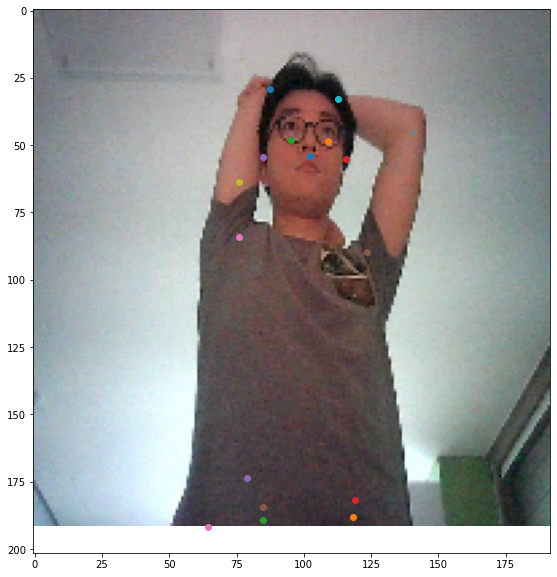

In [14]:
plt.figure(figsize=(14, 10))
plt.imshow(image_to_show)
for i in result[0][0]:
    plt.scatter(i[1]*192, i[0]*192)

# Make dataset for train

In [15]:
def make_image(size_1=32, size_2 = 32):
    path = "C:/Users/hjhhi/Downloads/image"
    y=[]
    data = []
    for i in os.listdir(path):
        for j in os.listdir(os.path.join(path, i)):
            temp = cv2.imread(os.path.join(path, i, j))
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            temp = cv2.resize(temp, (size_1, size_2))
            data.append(temp)
            y.append(int(i))#Append int converting
    data = np.uint8(data)
    return data, y

In [17]:
# X_for_visualize, y_for_visualize = make_image(640, 480)

In [18]:
X, y = make_image(192, 192)

In [19]:
X_ = []
for i in range(len(X)):
    input_data = X[i]
    interpreter.invoke()
    interpreter.set_tensor(input['index'], [input_data])
    X_.append(interpreter.get_tensor(output_details[0]['index']))
X_ = np.array(X_).reshape(len(X_), 51)

X: image resized by 192 for te_lite  
y: label for stretching pose  
X_: nparray returned by tflite by X
X_for_visualize: 480x640 image for visualize
X_train, X_test, y_train, y_test:   
모델 학습을 위하여 nparray를 쪼갬(이미지가 아니라는 점에 주의)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_, y)

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9869565217391304

# Prediction

In [25]:
image = cv2.imread("C:/Users/hjhhi/Desktop/Codes/51.jpg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

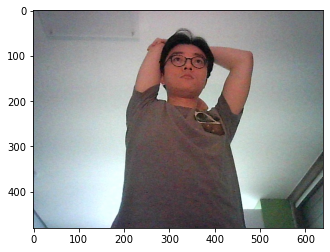

In [26]:
plt.imshow(image)

# Decode bese64

In [39]:
import base64
import io
from PIL import Image

In [28]:
base64_image = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDzlJApZWlAdeAE9O1Zd00tlqTMiIQ6DZGOvfPfnsa1LiJZJPLaXzTIDjYmAKy/E0VpFbLEhhaWRwEE0m0Hpnnsaab+JvUj20ILf5j4V1C7jEl3iQoTjyxt5z6ZPvTZYx54aZpAdykrv7gAA/kKSzt1gtxE8LhudmXZkDc8jPP5e9SQ+bAgk+0h3OTkIVwO3HNF5OV2xRmm9epJKLuCMHDSBMNGAwYjHQjPSks1KLvZQHaMqobH17fU01o7i4m8hnJ7YbpwRU6NbpO6s481cgc89+RW0as4waTHaMHcsvFNNB5CsxXkscj8qbbMUmTblWByOOh/pTcFmZJIhs4PzN94468VYs5l+z7JY9pIwMdMZ4/Ssovl2GqiSs2NtWR2NtIWwB8yhcnpkmkktNtwtyqHeVCHzJCBtHTqaefJZxIIBsD4MwAHP9acZ7JAI4jIXUjKspyctj8vWjnlfcKOJUrxTaJFhBVfNYuDHkc8gf4U/Aa4RI5VALbiuehx3xUgi83DG2UqowBvAB+oFOhSFmCwRlFGSWA+tOM3FNFKs56xdxYIovM2S5zns/y/XHrUiymCZFibI3HcPUdzzzSeSygSRkA5G0hDtOOo46mnxrJcQ8yKC3QoMZ+vpWaiou63KcpNpksTiW6aQqCCM7gfm6UG4lINufMA3ZAJO3OCMkfnSxWfkKojIX0PNTRRyTHZK2xv73GOlDkm7vc0VerF6PcYsQePG1eSCRnH41cjAixFvAyMEdcg9R+Yp0FlZpFsu3MjMvAUdTTyHlka3ihVdoyGPp2qnUly8vQXPOOtx8CrFlre5CMOCIxnnsatQpG1uokfLleXJxnn0qJ7adUWSNNrMQCoHPX/AOtWnaW+LcMsYdjzt6Y4xWadttSJ81TVkdvCxmLOzplSQrHJNXo7d+WeZn3MctupkUczoUuZSp6Aben41NbWhizyxXknjljnvUqVfmvey7F05KnK6ZA8CyWDWsZWMseJVGcEnJ796n0uKaItBJI5AJzKBxjGalSzaRfLh2uCB90jj2/KrVlp8kbHhdu45Y/Sq+sVIaQTN3iarVnLQbJEs8jPEVLEZJYncB7e1JHBBHHiHdlz0Dd6tPbXA2y7VJXgFQN2P/1U+4gkO0o6sd3VhyT60Rrzi207N/IU5Qls7saxmMPlvtf+8o7D+ppLHzPNW3jYDjqeB9M1aj+0EhHiwnGXAp9rasxMKyuUzkHtnHrVJytZseHbvprYv3VpDJprQyr8jL8+fTv9a0/DNnAIobwOHcDCtgEqcdMVV8jzbbYMNjjaef1rX8MW00Nq0c+HLtuGWAI47Uo6dLHTKtVknHdM19NkuWkWV4DIpwCwO38cHvV5YYpnIeNiAeMjjP8AXjNMsokuEwCF5554Aq9aRFECNKx5wAy5B/WiclFXZnTqcz5Z6oqrBbIQUVAFGQw6mkmKPyF3nH3h+oNXFszMC1rCAqnOQOv50sX7yRpngYnaACR+Brn57pcoubkfu3IBFA1t50sBZsYDEZ5z/wDqpsFnCVMsdvIR1BVcHPvmrShmQqgOSCFQj9cGmSW9277ROwQnOFHP41Sva1zb2suV6a+ZFKkZlQEyMoA3Mf4eaJhCJv3bEEDAzwf85qyI1jgC+erbmAyB/n601ov4hCTg5BPB/EnpzSlFKV1oc6ryi7WIpLCXzVYbnw4YMT/EDkH14qMQsjB0kZ1xyeQBzVqKNRCyYww7kc1LNA8w2hscdCe1W6k2rI3VZyjcogwxSNMjFgCCOP61C4zdb5iS33g3TvWlCrzBWQhMZ42duajZUnjHmOEYHDnGCRisIqtLZ6MzVWpOd1K1iAmZCu/iQdCSAOn+eaSWztxxG2COSrL+tTiGZysag7QuQNmCPb6/WoriFTETKh3Eklc/eHv6VtDmUeUztU5udyKMkSxnYhwrZ+ZepNRtbniWdSzHGWBzj8PrV6GwkdShuAyk5Ee3gCmzRi1xGEwSOn+Bqufldmbe1jGV+pSNtLJAYCEKyDmNlzwe1IbW1tQqABec4Jx/nFXIYdjKYjtTALhvTpVe/W4Z2jhdo0c84cEEdv1onJL4hyrYm1m9CiY5DN57RKSrZUg559qkMQkzPNASSw4Y4GP8KkggnVcG3ZscHBHP/wBamNFltwwuFw8AyevT+dQqjirX1MVUlSldNu5S1KxaRhgFQTlHByAf68GqE+lh5WmZY88bnQYJ4rUkQF28veQowM9hUf2efeTghWOAVHf61q5uMbscFOpUvYoPbmcefcXLORj5WHzHtzmqrSWjn7OsWSWHysTx+nHSth2McrCSUPzjO3j8zVSf7OZPM2ESHBLlcquMVjKqpQbTNJVJRVo6GZdW8XmefaoNwHRhxj2P4fpUcgkEDs0SjP8AGWzV+YxzSA7ckcDbzkD+VVrg7o2jgj3KfvKRg5/Oii5Sp3aMotyla9zLkgtLhikNzukXJZRznngH0pL9lNt9lntVcIBgOgb279KuSRyvg4aI552jj270xrWO5kAuJA5VcYIxj3qp6atkVE7Wb0Ma7tFmczyxby2MDpwKrtbRL87W7IThGyPvAZP9a1NTikjYKU2KDlnTJ49qoypKRJMkwODgZPH/AOupdW0bWuYwnUj8LM+RkOxVUjylCoVY8ADAHt0qrcWBigPmnhxk5P3vxq9clN3nYRfmwDk8mqd4TdTFY8sUUBlI4/Ok3F/AtSnWquSbeqKZt1tbYAKRuHUP0qASNGDH5SKeWG1AMkjnJFTst3KATIflOJEcAAH69TTbqFXTesqrsGdq8DNZ1VKMffCpWqyau9jPvPMu5FikMREZypxkqcY/kT+dUbuHM4liUNngAnOT+FXZbmJFbKsWJwCB0qKSGOVBI8DMhGVbOSM+1aU5yUUo3ZEq1VrVlVtnQxAHB2gk/nUM85JwS2cHnHb61PdOssawWzM2DjJzk1Xlt4/JVZZ1yzY2s2Dkj/CtVOUrPYI1JSjaT0GNNNtDiU5wME9R17VWltvPO9pi5zjavGPzqYhnUopXnhCG6VE7yK7QqCxCk7geSaIVlztK5K+L3Rs1wDvgMLYxjcHIAB9e2Kje3eK2+zxTGKJUIREO3qOeB2o+ziOMLMSSTxvHbHQ80joIICss6ojcqwGMk4OKuNScZ+794ql2/eZVleeYgyTSMyy53BcYPck9+lJLGtrGojjCFQAzHAz+H40u2SRlmdkXb8ylTzj8fapLi0gunZQwYn+8xOf/ANVOU1FamCm3JqTKd4kLFZ7kBmUkI5QEoD1+nSmsqtJ9oa6crLzkjB9c/nmrSW5VPKiCF8d2AJPT6VBcNJMgJGCOCp9eBVxcoS5osUqrhZblO8ga4BgM4li3b8hOcghh1xnmnCO5chS5+UEgqOhyOfxwKnlchwkshViAAVUcfUd6j3SzwMbqREYscFWP3OmSCKVSUpu99TD2qnPXSxm3IuHvAt07G3CqTCynG4EncDxjnb+VRXdukttNDMqbJ0CO7yFvf1GauxpLPAxtroFjgM8gypGe3pxSyR/ZYwyxLIuCHBQcjPX9KmjKcZKV9fIj21Sc23LT1/4JoQREAI5JdSSMKeMHgVJcWUMsHkE7t8Z3fLkAe/8AKnRxTMS7jKk4XC0+KB5A5mlZVPIUDGD04xVTjyuyOmnKVS7krMxY5pNOfy45EhQdTgMFGO/pS3VpL5X2pz8wYDdu55qTULe4tJxcmHy0fKllP3znPSlYImZhkLIdw3Hv60oU3LexU4ptJaNEaSPArbZmdCTgsevGSPenlCb0/vg6KnBjVs/TBGKVbgI65TAZcyK20qpJ/wAKs5VotscgIIwMnp6VUoSilLodEIc+jY2RZlCmCQBSDt+XGKdDIVzEQchTvjVhz+JNPiiYjc7/ACg/KS/GRSztDvKPIGPA3Imc8+1OM3F6HLKTpOzRIqyoxjeAquAy8g5FOJWQq3kklfvY/D9KXYkUQJbAxgb1/wA/SiJUjHyMQxxhsnOP5Um9CqeqsOSEKTHvZUbOdrcYx6VN+8RhBDbkAdkk5HvRJ+8fEyxhgQNufvdiMirMSQJGISU8zHy/Lk59aiyNY+7ogsmj5toNoHViOOTjmniwPnELIAxI3Hd157UTmWJcpEHJbaSRjHvUsUBEBdpfuDjnJIqlZotNuVxxt0cqpRQN/wB8nv2+lTW/mMhQQhuPXOfrTLbao3rCcMB8zr36Zq5HujiiVbdj6ADp/n+tZ8t3djjaMryQ2N5kc+ZEpyuV2nG0Vet8u5KQhxjqGHFMhtWuHJK+SQDkueRUojjtrjy1m+Zx94HqetKV3oinKDeiJY7LzkA5Y5wGHUfXNWrDyRFufeSBgq1R6dHcT3D4kckDkEcH8T7VoJAJLdHuLYI3JG1ueDUxUorXcFyN6skgWGeNXVD0+7Icc05oxGo3lWQnhVbn9aLNLRpGiYguD8m5j+tWvsymUhxhm4RQfx71N6k56dBXjF23G2luWBeAbUYHcn4dqfbJKypKjybcAFPbocVJDa3cXy26RgMwIkcdu9XLK1uFkIjEancQVIwR61vdNasFysWCwulZpHUAsAQjHj6UttazXMnyIgHQkg4X9atafbeXE8kiSB1YkKcYIAoIvppSFYqhyCrxjj296xlGnLW43USjypCTwAlnY8gAEDp+VGnjC4jBOxvmCtwfxqSKFoYPKwGJzv4GKfbWdzIiwxbSuOQrYxzzUU4Rb11Em4tSRqWkC+S4l3xgnnaemP8A9dbPh+2mjhVopsxjqQOT3rN06CaO1Kl8KTnjJIrpPDUKJH8/C5YtuIAPtWs24q6dzpbnUNC004+XvkwSTlcjp7VYmtZolVY7dRjkNvx/nmpGWaFAAGKOcqwGalmDeUUWBg2Thn5pKTtccFaWuhRU+WcPc7TxuByPyPSnSRzvdKWTCDpzV+DTpMRySqpJHzFewx0plzaCHMQf3ADcinCz2DmqU5XTuitFERF+9TDMOSDjH5VNGsaDdJjJHKk1LHZKEH2pSRt+UE5z7mi4t4ljV7a2wAflVM7unp6d6wvJO97lRk6s9NCBIjE2zYoXPCA0r2s93Hv8zyyvtyfw/GrFvFJEWecYBBwCeen6U4WjRzfIoJzz83IHr7VMnJJOS0HK3wtIprbT7ydyFhwSRjJ+tPSEQsskw5A+bac9+akG7zPPuGAC8bUwcn6UQS20oG2EFQMlQSPWtIqUleGhKjOOjICUaY+UmB1O78uKZE7QsZZThSAGB7fjVtYYCoG9yFHOFyRSpDEY9yxOxGc5+7S92m7IIJKNmitNESRMF4zklR1/zmobqyhmbenLHrxwf88flWldBFtArp8zE5THAqsLWXeuF6EE88HjqaSrrms0TKPM/IqtZtbwZRCXHIqCWCWaNW+Y4HzZHWtOS3v0QcBiTwycg9/5VEI9i4mcsR1+XkU/aq5m6fPK0XsZxjAlAOzAx8oPHX170yWPHMYGGJOP51bNvJFETH87YxhzwPWiVPMgVJsJx0Q4GcVXs+aNzSMOR3uUYbdXJzJgZ29eBmo5LMedtZYyxxtkA5P41beFoQRDEzHHJYdO3H50yR5HYpJDkjoc5I/KoqKc7LQVTkn8JRmxbn52jidT0Vc5HvVaa6mmHkpgMMFmTHOOtXLuORSu6LzBuHylckGmXFnHNAw2orZOCOpA70pp232I9rJaR0ZnXSJFLsmgLjqMH39vSob61ttyvHdEdd0QGN31q9FbOYiuADnhiM9qjmhVY2edhvVh8mCM1vTa5OZ6CjVnGVzMe0aMloQUUnDqnJ9qrR286zOhGCOQR1HFahT5BiMAk9QD/KoJbCZSJYblfUBhwaylUhKejG6ibvEoSRSLKyZDAYyWI/Lms64M00vl29qNucO6nkD+las8EtzHta0CcgfuzwDUC27hTFCGAHYcVUlNRvuK7rO2xm3UYdFlkn85+AiYAGPoKqT6cwYXM0aBmGfLQ5x0rRnRYECNA3zN07r3PNVZjcxkbiUDAhdiZz3A9qmEItakOGuhky2AkuclzkfdQjjr3NJPGzSMq2yCMqQznGf07VfuXlh3JLH5u88NjG0+/qOtV2le2iaNYVOSAM8Yye3pW8VCHkRdmVNbeecJANu7tzu/P6VXutODSFEQIMZfKgVaC3lu32tEHLY4OQtR3sN1cwuQ4yhGXJOP8a5XJupa9xO7MxtNuLiZfOkRQp2l+wHqaqz6Y8CyM0pYdM5AB98Vpgps+bzeDli6nH4Gqup2eWaRmLLj5cdB0/xrpi0nbqQuYxZokjJmgYYOMoCf59qgnIWXcICiAcqwzzWg0UUqbxEVVRgHkcVmz4iZ5HjwDyuWOB+daJJPcJX2Io7ZTIGLYzjrwPypswaHG0EMOdzjH+fWnI8jEOgWPnkv1/PmmXmJwwMowDy2Tnrzik1FuyY07rQryrkeW7jeyYJwelNkit0wJo2YkfdJwMkcHBq2QY413sDtHBA+v5mq0qRYaW4gYPnKuvPPb/GmoyZnCo23GRDPAzFohbqVK8M2AF4FQyKVcxCLyvlI3Mc5Ptj2qafe9t86OTj7w5A571HC0xtwJMYx82wE8de/Sno1cl01OSsVfLmYEEsxPUk9PekdJEYASZVh8wbnH/66nQyxfJFtkA5DBuAKhiEsjsshG0A7gpyTQoqT3MpNwk0Dab5kLXExD7SGDxk/KPQ9sVRktmW4D2sDuCDhCOBjrnvVsxr8zJAN4yBuPbpimeczL5jZUrwxHfn86bSRNKEmnqRBp1Hmx3rKrAq6bAOOneoLl4HkRJoGVSOd3Ruf0omsftUiG5smXLs2EnYg8cdaZcrLvUTRJwmBnJKnpkkUOSW5Kw9KVO+xs20krxi5dCMjOwnn/wDXUiokqcEk5+88m3A5pZoxna1w6Oc78HPP1FSrbbowFOOucgk/j/hSb0ujotUjPVWM/WraSUER5Ow7jtHGf51WsXhlia2FxArI20qHww69q15opBArrOzK3DHPJrOMEMjYzyTn5l6HFNK7CTclYqC1ae52yt8o4BLZOefT2q2bRQpQqSjHBYtwOgAxVO7tp4kZ4Xfeo3KVXgAVLpGopeIqpcht3TMg5BGeMVTUlozT2jULrVFtFddiRfNltoBGfyHfmrcCMsBt87WI4yMZNNktzblVUbCOUBbB+tFvGsciwzzSKqKoVTkjHUUOPNokYpSldoEaaOQpKwk+YjDDODU0aSNI6fZz8oHzq2efp+dTkTYVI1G4jBJGCRmnJE/zBAyAdRkDtTbi0lax0wXLHUjtklXPmQlnY5JJ+v5VPHaRRr0Acj7wxkH8aW1EqAkEhsEHccgn1+lTQwgvhAgJGeuM+1JVHHYlRfNdjbVWjzHNIWOCMkVYitrf5Y9xclsEKvSp7SzCKjlRuJPAGc/n0qwsKRSMZIRvGCR2Gf8A9VZzUZopqUZWIo9IP+sYkAHKsXzj29qnVHimCfKEAwDnOT61agt40i2uFDZzkmnTWoimHktu3dFA5H/1vei1loW23uK6PdMuWOcZIIP4YFTW8axvuuLRWAY/MB0PT8KtraPb24DybWIHOTz6VJHHKShaUAEckios0rSJjOUXZDYIHtYmeMrjHA38nnpU1os8pjePBYk7gM1LZWMtzuMuMEcsp4z64q7bQSon2dOcY24UD8KSpO97jbctWRppzQDMYIyxyNvbuKt2QdSZDEhIGASRz6GnWUSPKTOxyi8nt9Kt2tjvlR2jIx94r0z0/pVSulZGrgnFND7W1gEudwLA8gj+QpJzO0mFgyWJDFWwSMZ71JcWu+VZlQEr9487vyFPiglikDiNWGSWIXBHrms+Wd7Myd0LBGqMZI0AUn5sZOf8KdsVygmJU4yNvb3qyg8mMBrZx5hwHVc9jipUtYEiLupww+ck4INDhbTlC5BDpzCQkzHheCwAzzUlqxNyYWmXarckJ261M0CJAVmtWO7oWfDCoUlt7dwk95sLLlQxxznvUNyUdjaNWdkjc0i3kmdYFmUgNwOvfp+Vdb4f0uOBAs4ycnAC4OeuK53RLZTskgi3lx13cfWus0O3lcukhCqAuw9cHHas6tVuCtuVGtOT5S89qFXaiBV6KynJHeobeG2K7pRufqwA4q2fOtj5fm5LcIHPQ0IrbsytzjOB19qulVmvdkhtX+FkMKOIhL5W0DsoOTiomVLvMqHzCB0IwRzWhEGYFmGRnpnmopbOJifLhAB6lT0p2Uq3oJShBWWpRNlNFmRWwNwGVPr9asx2hRQJ3OWAxjjGPpUkVvFbgMSMjPO/Iz0qZzIFV40Ldhkce9FV0U9yoVJtsh+zNMVQhTzwxPJ/wptxpzckKQSMNhfepXaQyArKEJbG32p373jdKVxydoyTSjaSFqpWkVDBbsioVdmP3nCHmnNp0SgoAAD3HX/PWrnlyIu9iTg8mkkY4DuOAfxFRObgttDZJy1RClraRqXEITJ+961WmVJAYoYwGDED5h061oSIA24RfKD1UdOPU1CbcyyG4KDOc9+f8aKcobNnNJ2noVkgLwqwG0jIb27dDUM7ySgQLafMT97eD9TWlIVAAkTeCOT2NEFpbSKVHy5HX/Chezk3GSNac1ze8zOltriCASROcgeuKgjtriRVfymweATWtcRy25ZHQuoGCT061HvMkZJibAJBKEdjUP3fgL9xK0TP+zPC5yp3ZHPUY/yKi/eytJHLHGQ38RGMVeu42nkEIJ2jspyf0qG5tpYVVcEAjucGtqcotaswk3e0TPlgmiQYYMoPJ3Bdv+NMjgjkb9xCGznnoOvr3q/9kiVTGS43DLFu/wBMdPrUUcflSCAKQg6bh7USlzySi1cap8ruUZrSAszNIu7Lcbv8+9V3tREwST5R/eUZz7fzrTu7RVlZ2tlJLdFAx+tVJbWd8BUKqc5BIG000oTjruCjGcr6lBiDhlYDB5AHfFVbmBp5BNIcKrD7yjkVqLbTwEl2BCsTuKdc0txLakn7TAiqWJJfjntSdqerehc+SnK/UxrhLZgqxpjJ2l8dDVOVIi4UToD/AAsRxnFbUthbD97BISMjaB2wao6haGM/vUVB1DHqxNCpKcbxME053kZslpKw+WXtj+fPvUEkkNspYsC+eccbqvGWAoYBK27sn/16rvGBIAUXHY57+lWuaKUbXLnKMJJwZntHd3T+d9nALKO4wPpVO8t5TgtI20/eEeRz7EVtXSKIGYExswBBUcnHGPyrLltwq8mQ4OMq1Dc5O2xi+5jSC4hlcMSoAxsbpj8ajuLFrhQBdFSy8rtHTnPWtaW0a6QIibijAgsev1P0qC7hiuIy90qHAwnlvyPxoqVLQ2Jd0tDEERtpTbhnPGfmPAqG+EZs2iaQgAA5BIx6VtPEAFhmt9wU5Q9KpXVupJM8IYZ4UHJHpXPBxb0jZis+pjMLiSIN5O5QQCWbOBWbcxy2spkgDOASWRa6K6kQHyiWTHXZ90fUCqt7ZxkMQmOwcty3rV06dOTb6jcY7owrySZzmJnXjChjgdO/6VUIbG26jQ85xET09TWs9lDKvlkSblHPzcE1Tu7VDMbePOeq7mwSMeoqlKcZKPQGrmbdWELsQkpHqGBPFZ8fkhSyzFipxyOOvrWtPbNCpZ2yTyCDnHbFRS6emRhdm48gHv7dq6rJGLT2M5oz5hWQcrw2/gfmar3gXG1UJ2/eCjJPNW7tLeWZRGzYRSrBuMkf/qqP5HHlYBx+YGKyTnBa7lwjy7IpmBo4d4l8r+8v41CLaF1G2dX+bBUgjOR+WavTop+dSdy+p/Wq7NbtshLlT1VxESB75x/9etISbjdkSjNSvEqpbRhjE8SpHu2oqcCkltolk3qobuD3H1qRoLiaZzuSVlJ2ShTjAHvUFvLJki4CK+P3gXOCfY+tO6tcym5Sh5hKIyPNgnQlM5DKwyQMen61C1pcGRkjJdzkfu+Qf04qV7chwZQ4ySGBG3P0pk0KzFZI5HXaeiSMv8jyP8KbaRmoTaRWmuYkt1t4pxnHzksNwx25qth/LWedvKjYffcMWbK46KMirH2SARMVYFNxUs2WI5weT/jUDrAsi+S2HOAQHJ4GcfzpqMGrtkzipO0Vc31ikdjOICp6AdO/THpz+lIjTxMTtKjJ+6/HXHQ1KDY7zILl5MNgAKR+OCAR+XelS3fISZcAD5Ag4GPr9a0jJRgdcFzK7CO6lkfyjbArj77ccGqmp2Ebu07qShb5sdVPtWjGyyxssik9xxnimzWgaAtNMfUMBt/yKz6gnBpoxbiOdrZ/s0boyr8obqR7eprL8A6Bf2Ltc3gnmkkJKrc/MI05wBjGMVuOzSziO5u3baBsLt0A7U8RzLGBFKxcchgvQYq1J812HPThZbkz288iFHjQuG+UqCe3v0qe1sWhhwQS/PzP+Q4pI7Z4bdXW6J67gp/pVpGnDgo/Uc8jgU5ppXSJjO7ajoJHby3D53PgYwdgAz6c9asJpzk7YojvblgRg+5pPtd2kRRAmTnZlsk+tWIW1KSEOszMQcKNpye/+c1kXGUubchfTbyGQN5TMMfMOv4fWtG10C6eMXEaKP7qY6H8aS2m1G2l+eRQGA+UjPP1qzDrGo/cMQVs5Z8dKmV7bCqVeTccvh/U3j23CynccMjY4HrkcirTaD+6WBMkoM5Y8Yzjk1LDqOrSOFKI+cENtODVxZrkzCSaNsgjATnHoOKcdYjoTc1zSRnWPhyKZ3AuN4UfM+/5V49K1l0hoFUrEpbBAYDsPWp31m4guFhaxyGXgYzzVu01BWH2VIF5HBdcY9ab2K9pDmsVBaSPG32h+wCkdB+dLDpQkDKsruoIB+UDn6j61ovK8UZtWgUg8fN6+n0q5Y3B+ziCRI9xOflTofrRF2Vh6N3KUds8DeSynnGVxz6cVZtdCaFyQkrKem8nA561bTUo7B/3tsGkIBIYZP4Vcj8RpIWBhyTwMjA/GlNPlui+ZIqwafFFhVizkY4HJqb7HcMQAj53DKjr+XpVyDWYkmCGHEZyzEqQauQ6taygxW9uNxA+ZuuPrSirRsRGpCUrJmbFpk1sxYxtuI4y2env+NWI7BxAU3lWY/P8nFbVtqenCBXFsGZVw2Bkml+22gj89LVMgkEOvHtURTiXFxT1MeHSnlCs5YbDnCtg/lVw2zWrri13AYyXHOcdTV2G+sZhvW2BYH+EY+tXUvbKNiJIHJwMADOaU6jgVJwb0RkXFnHMomEqLycKw5B7YrhPHNjqg8T2b6ZLOkQVldEiDCUnoOemP616sz6Nu8/yWYk8sVBI9OlVzDps16k8LIJAcRNIA2D6mpVpq7JUrMXwFpHkaTE8vmGVVy29P59q6uwJecAcc5/Ks/SLm1s/3Mzb1wSZFAAP9P6Vq6d9luJle1x9znd/OpnCFtS4Sjz3Zc2mVdrg8gYJbFPSAqMqOfcZqSK2d2AfcQOcg9vXp0qwYLhXZpYhtwCyxHjGfSlCrG7vqaSqTk/d28io0MD4ddxdeSwPSn7Y542ijjJGOVAycVajsw2fJiKux4LEHv7VKba5VSky+WM8ALwRnNDcJPexELt6GbDCojEEUQw38DDn1p06MirEuQOu0dqvC2mlbczFE3E88GkksLSZg5jJP+wxOfqaxjTk52uW3Bz1ZUhtIvtCvPbEAdWHH0GaPsr/AOuKlVH3Sf5VpC2DQqsmdoIxnr7UsllG8g8tWznmm1UovYvlUtYszo1nnUtICqk4LMOKQ2rp8qMWbd1TofxrTgt2C4jIHGW3DryKrG32znyS7JuIKqBj14/KlKoZqTi9CtfW8k0YHlyDk5DN04/lUJEwJ3qFC8Ag8kVs/ZElUs0ZXBBbb3+tQzaZIsQmkicgcoucjP49qinCLd0VeVRmTNbTrysbODz60sCyBfnUrgZ5fOa0IrK5KhhOEYcY9s96STToYZDje3HQL/WrjF9DNtxdmUvPkaJlwpHcFah8uVQSByfbH5Vc+zbSGkkUlmwFYcAe9Kll5z4RlBJ56elLlbnp+BV3OyZnO6Wm17eDczHDbByOaiuvtEpDMzY3EqNmea0LqyTd5YYKSMMy/pTLm22jyAXXIySg4AxV+5GV1oxWlAydvmkGVRwmcvn15PFSxSBSYmjXP+yucVMunSeYxQ5xx86fjStaxIGUr3yQBRGMnUvJCVSS1uZ8kL+ZtRwcHBwcDr7026gVEaNkOO59vWtCWFChYIcA42qMd8fnUMljO8fyZYE/MCMMeetEFzTtHYLtpszYreEs0cNwTtI3biOP05qCWxtZfkwrOM4I7H3HatKWxeN/3ds6kD1BB/GoJLO6ZzOsu0cfLkZPrW14xvqYqV5WZnG2mtImlkkVMA5zg4qle2y3EavJMpPVVC9BWtNAzT/MokDdMjvx+H/6qjvdNedtyp+Qx2xis3UnFKyLd1oYEljP8806I+OAAv8Aniq0ssTBiy8564xitiaGSJ1s2EkWeny8GorzS5HPER6HBP6/hT9pUi9RtxMcJMgKIyMh6g855qrqNoW3R26YLDJKdTyO9anz+csUsP3T90024if7UNyfLknGMMc/StJNO3PoJO3UwY4lhG2481WI+QBT265qpM1wqZW33FXyPk4xW/doYDJcy7tpUblI+77fjWcU3xlNoYOpJy3zAelNqEo2sOXLJaGTdWpmhN1OwWXcRtU9R6VXZLQwpEkDRYbqO/51qyaZHGBFJG7nkbnwTj69arvpdus/lyxrgKCBGeh71z2hF8iJb0MSey+zoY4myRyGcnGPSs+HTi07iZjg8FgDW3egrMYjE4TfjJXPGe3tVa9tYxKI/LZlJwq5xj61vSpOF7s5qjUmk20Y19p8sF3ugug6hR1bk1nTRmBX80KXfBHqa6K5jmsV3QKrFmxyO39ay9QivA3Ee454AHA/GqcG1oVGT9pysyPsk1wxEUbFR3OKjm+aJkzvwmSp5PTB/WtGKSM/LcwqHzhlJOSfWqfk27O7BvL3dCxx/niqjFPW45ztKyMPyysmWiYANnDY496ZK8Kybd4GBwcVpX1jI8gNtLxtIZ3Ws2W3k8zynORg5AH9KJOMloJzm5JLYrbpppSgDKAOo5U/nRKkRAiVwNvOG/w71bKlwI1QDn5SO9VmjMLcxKMc85yO3NKnCT1uaNx6kMzBXSOB18wrxtTgioLidZkWORDnJ3BFxj3qwWi3bJFCnGFYKRn2xSSNbFPM81QQPk55z+FaRhzO25z+yWupUzc7hCBwOfmxgfn0qOMQTK3zqQMAurZGMH+tWSDAGKsFDLlww+UGq7pCsPmKYyf7oHOMdBVShd2kjH4Go7/IrjA/1Ktg5ysZxgY/WoXNmiLLI7D7oCpHuOM47f561OiOp81UyuB2PA+lRXA3uqQhlcOVK7OG446dev51EbU5aX1OjmhdNKzNeGMysXW3AIbl2bgc1JbmaUBZCjkABg47ZpVhi8oC4kRd3P7s4A/GrENujLjyhyeQCPfittY+6uppFrk5u4qb3XdtCY+7gdOelOa28yURy7WDD+4TnjvinRMluylIyT29PrVmMTPGbhgyE4yScjnuKlWvqZxhJxdnuQRaZZ5XKKGJ+UheQaW209Xbc8iKxxwepFXbezmnjFvCqBzgEjrnirp0tYMRFSz/AHRg5bOPUdKzc1F2HCjBLVFKx0PTTOAIxETzhjgHH86tQ+G7eVsYOxlIDDnn86ms9Pidh9quJVcf3sbeuM9MmtYK6KJQjlR8vyLxk03UjYGlLSOxlQeEbIuB9nkb/aJPHuTV1dAt7FisMzZzwxycVu2CFrfbcRELsxgEAk47/hSpDukLI6FWAALLn86yUpTemxdOEYrRfMyIPDoOZnlLHOCVGSenHFW7bwzaBGWdSMn5tinn861vsUgPn28bbDw7H+97Yq5aypFACY0clgMggkHGR/WtYq0S5RjJ6oyB4Odci1GyMjOO9XLfwkkOZGLepJbnNbtizM4AbbuOQAf51KJbWKbypLdWI4kxn6ZpJtvUaSRjp4etFxK9s7ybRnkYqxb+FDPJ5+CB1UE4z27Vt21ofL3NFnceEP3QM1btFtoisT7QG7Mfb8zUymloTJXemxzsPhDzfnkmy5BCgckHPTpVy18NTwxsqzL7K0eMd8Z71uW8bENNCApReWxyQf5UT+JtD0ewNzq92IolXLvIvA9alzdNajjSlJWT1M608OPcyeZJ8wAwfMGMVMnhaQkIs+Rn5cpwo6/nXJeLP2kdF0qV7bw1pv23ZKUWVvlQr/eA4PvXmvij4peOfEkmbq/vLeNCQUs7kojgjvjk1zyxVGEtz2MNw9ja8E2rJ9z2nVdQ8G+HXP8AwlPi60siMhVeTLMfTaoJ9ulc1P8AGjwBY6hPZ20t1deSVxNFAQknPON2Dxj07V43bxjywkcL8jGGJJyAB36//WpdjyXAt5GIYZJI/lXJUzOcZcsdu572G4Noxd3Nns6/HvwiFYJYzxKqDJeNevfGDk1owfFnwFewif7bNGDwXlj2gHjsCa8MhijMQiMRG3pk8ke9aukpEwSBWZyBwNmAPb3pQzKt9pXOqXCWFT5U2/0PoTQvEvgzUpjY2XiizuHxu2LMDtGP0+tdDBpFusjq7xs23B2MrZHrxXzDLbXdnd74Wb7pKkjt6HFXPDvjfxl4bn3aFrT20u7egKK8Zwc42NkVEcy552drlV+Bpulz0Z69n/mj6dtPDE0sLNHbY2kjKsAB9KY/h6SXCRRKXzhlkbgDB9q4zwD+0XaNp7v42idXALNLawjDf8BBGPoPau10D4xfDXWwIrLXYI32Bz5zeWE+pbAr0Y4ujKOj1Pka+T5hQlaVN722dia18O3T4Hlnb8uQrcGtzQtJRHUSlsAY2hu/rV2wNhcwJd2pjljlI2zQzB1OemCpwavpYQFt3ljjkgcZqYVfaSucU6FSlpPR9mRQWTebjznwuOAMfhVqOziKGFRjdwT0/WkXiMJEpBI67u/1qeGG6Cl3fC56c5GB3py5fmZrQQWBtnVTkEf7XSpGEcv7lHydvAAPb0oVJZEaUIHGcZB4+tASeKPaoJRuSCRnFZKb5tNGNRV9SIgzDync7ccn+lEdu8T7IlIycgBasSl9qOF2YzsA60/7M6ok8cuXboOnPvnrWkaqbu2XLkb0IMkxEhM5+98vTn/9dOSKaf5g0YX0yBxUiws8gimDc8blbIB44qW3tBBGSV3Nt+bPHHOP/wBVNylJWTM72II7J9xjEaMc/eJOR9aj+zSeaQYwpYnJOAKtbGtsPG2Scg7gfw7+lNtyk775Lfe+Tyves9ErMOaTIZrGUAHgqV6qeBxUZS6OCWAB6BmzV9doxHHKqYzwVzt560TW8sNudkuSOSSe3tTUowdwb1syjLbSBMbTyB0Heob61uUAeRVKNwykEH61dt441B3ylR3OfvUsiQuSjEKSBgYLHHvWfPF7sbXLuZ8dspIaOLO1eO4FPNuQQZOvcgdqmh/dT7iDjOMjjHamStCsioZQxPUFeRTp1I8+jdhXTdyGRYyDIIsDrwM1DcwzTxCE28obrvY4B/Cp7uaSPBjU7eOFTJP+FKZLguHTh+qblNbpqUfedxt9ig8Ito9pfqnQDBz6fSoY4WYlmRSP7vHJ981oyx3FwwW6gJz1O7jOO1QywSRAvbRoxYgAk/571PtORWTuIzZInD4AKnAJINNnaToqFwQcHdgVoSxSyR/6S4ByOXbjJ7AVELiEwMJVT5WOBt9aXM3uDatoZyWpRB5EWD3V3JqGa0E8u1V+bOWJ7D0rTuogi7lXcD0PT8s1CqCT5trKx7e1TDkT95iMq6S3IYTqfMAG3BIx2/PFU3MixbZmcjPy4fDE+nH41r3YwSwRWKk5LKcfyqpdRwuwd41PGF2ngGrlaWmyJbsZcRZ13SxZA+ZWYEkE1UuGRAbgb9oyDlcD9K25orh03pbJtGBgsQevfFZt3CsLECFQrd1P3apRSl0+YtkZFxYiQi+EmBkkL6++aYPOiJm+0Bs4HI4GMn0rYuLJZUBiPzADCk9BiqMkMlvIQ0gkVjk5Byo6YrOWk+ZF2jGO5n6jHBcZdJCPm+cgnt0qjdWNpGpCq+7o2WIyff2rbulRYmjijUbucFePxrPnihlQxJC24j7yD5Tj361UXNvZr8iXaSMKeR47pmZyQeCpHNQ3Twh2dGYyYztKjJ9q1pdHjCZkGGIOARVM2P2ZtsjjfweTzj0rf2UXZ21JguXS5mXqRyxhVQgBcldvNZoctKIktWyMMGI59q3Lq3SIkgqcjHAwwPvVCWBXJUwZYHAJ9Bz3+tO00tA5bzuzLvRAjbpZCACBvPBz/hVS9urdnSEMjMP4ivAGK0/LeM5aAHIPykZ4HsfpWfe2luoM32fGTz5Y6U4QhBWiZ80pztbYwryKYzOnl7lYggqufm5xVb7EssRYxYIxkMDheexrXkj+y/O2NpPJA4X/AOvVOa381y7ytk8Bd3GPwp2jLRMylJSnyJGZe20eBCVYlW4KZOfpiq89paxyeZ9lVB2YMSeg7VqT2h3CaFm3nB25xz2qldRsZdjBpmH3oxg4781Vk9EauFmvyM6aNmmMtu8ZyQAX7Emqf2hpZWby1Tkknf1464rUvYpVtmkTEeP4gpIzWekbY/eqsZzu+7jOaUFKnHUVSLurFSXzNnmRuAw4DbKigEF2Mt5eeTuVcEj860WtWAJwrE/LnPJ71QkiuFZEjhCKuQSw5X6Vb1OepCMlv+hC0TRufJnOAM7nOSfekWzKxGeQo7Acoo4H5dKnkiEmBF8pZPvAcU0osoGwkk4x6dPTPtSTn1LlJQh8VioxXytpK5yFRA2Tz0IqpNGLl0iMPmMGBK7Tg8/rVqcKWaIBDhujAZU545qks1xNcBZF2o3OFI4PpmnFJO5jRrRnO34m9GhVBAiAMq8MR0NOit0tfmSH5sAEg5pLItKPNdUwT0UdOcdTVmNiGx03A59vrV88r3ud1NuUPeGxy+fl/KyMYHJJHqParduXZPNjZyECl42b+VRaa2GYrGGR2xkj196uRiKCYM7ZB7BuvqalSi3djULSuiW1ildw0S7RnJzwQeOavTXFxDciKBd27O8gd+DVOJpFlLLKDzjaQQR9PatKLzCqpcRoGPVlGKzg9WW3ZE0VzIp8qC3PzAZZuvrVyWd2RIY5trLzggDn8KihlAOUBZcc44wKvQRxTxlooy7AklSOgz0/KraTVmiIOC2YzT4Xi/eXl3liCW29x71ow285ZcQ5RwCqYHFV4IUV1b7OEjU9T96rcF2GuCkMDQlD951OG9SKhwSd0irplv7PshDsu0AgjY3Bp1pYorCeWFo1HTHJz7ilhLXEi+cm5Dglm4HHXirtvFa5JgD43ZwXJBI9M1dyiWzhheQGd2KlMqfWtOKzEz7xbjkD/WHn86z3nWcbI3wAfnGwDjnjmtCKRFgVVcqu3O7bx9ayTm57GT55ytsTrZvExa5yQx4CjHQ063t43Ifa+SflKrnn6moEn/0U3RdTEjbTKzYVT7ntXm3j39o5YLc6Z4MWOdSdv25oy6oQf4cEdeeaibVKDlI78NhMRiZKFJXf9bnS+PPi5onhQ/2XFIbi6Iz5cZACHGBuPavHPGPj7xD4i1Vobt5THJ9yNG/dpWJNd3V9O2oXe+Z5CXaaTgsTz0PekhljvZ1+UgrgAluP/r14mIxdequy7H6Hk+Q4XCJSqu8vw/4A5TdiRUErA7RuOc5HQ81et0lRAplLZ9uM1XFvJFII0aRlwep49RUkE1xZ75I2BBPAK571yTk3G6PsqWHTiuZrTZEkMMplZFLbTzkngVYtbeUZyMEDgs2c9T3+tQxs8mSgAJ5PJ9asJcGJFhEW4qDvO/Gc9KzlzyikjolGL2sn2FiVN/mTP8y8AYyOla9oCipKkygA5UYwazo41dBuk+9wMKQQK1bK1lUCYpgDgnYW5rCNSblblvYUYU5STW/4Fm9KLtJQESAqzsOgx+lV7qOEyh4QokBxuVcED0rRhtkMLi4dHIYkBuMdKrNaQ28uYCQWJztbIHt0rnU5KV76nop0+XlW5BZxS3MiiZWLE528Yx3/AErWljtY7QRIrDIIZSM549qp6QrTXTtJJ5YCYKnj86s30flQGOARsC3zADAJNHtpp3e5yVMPGp5Gr8PvG+q+Brlbjw9fPCiuGa3H+rcDqCvTJ9a97+F/xr0P4gwrazxmPUI1zNbk9cfxL6jmvmYtDaw+fAG8wHG1cfkap23xB1jwFrdt4ltLghrWdZTFEoPmAHJQ542nGPxrrwePqQnao9PvPnc74bw2NpNx+JdT7mtvLlt1eQOpIwADjP41OI2ZRGFJGehOev0rlfgr8VvCHxk8CQeNvBuoloWcwX1rIw32lwqgvE2OO/BHXPFdhGsysZIgGzyDyPyzXuxcJR5ovQ/GqtN0qjg1ZruNtolgLR+eCGyvyvnnHpVm6a5iPlKgC7MjK9qghKRyFpogrYyvUVMohmVjJOcnIGJOMelawUZS0JbaRCu6YCeT5mQE5OBirB+zXDFJU+YD1PFQxt5GI2BYnknOSf69KnhRfs5UKSTyd3Vvzq5qFt9QhG7IwsbMYoivzDjIAwKebS6YktIy4xtGcD8qW2EpjwU4HUgZzjjmnskrssijAH+12pJ2E1YjaBViMMaEcHDHuT2pIUmViGmDZAB+XFSywW+7fICdpBwGP8qZsQOWG7r8wI6mlz2egJXIfs5Ztsu1SR8mBwfz4pwn3kRSyDhvmJIHSpRbPKVaVg+ADsz8ue9HkqcHaflPTFKfNN3CUeV2IJDFcKFjOVzh2AyQe3WnfZFaUIsrAKMnaMGnxGPpGFQjlghzTLm1mmlVYpAqf3Vbk+podOMpWvYluyIngLyOkjFVA6kZyOv9KR7GIZYSAk8sTj5vxqy8LphWfG37pLZ//XUW2OFmXduVuu3OVIPWlNaWKhyvdFZo/L+bAIJIy/XP0pskEsJ2mUJk5JIySKsYZRm4JZCAfkGOetRtE1tIzKCcHPzMenIrWlOaVtBNIhniUHmRiR14yB+OarlUTLbSML68ACrrLFcbjuIAORlu9Q3ECHG4EqBkbj1zTmoyad9QaKUoBX9zIHBGWBPU9qp+U7kMVBB6FRxnPT61quFCrlduTxjpnPeklhmXEjSZGAVXOB6c0rcrTTFbQyhASxxJxzkA56c0yWOJGMjHDcgjNWZEV5NymNQBzt7n1plwzo4M20sMMAR1/HH+cVKfNLZlJFQgZw/y4H8Q61SaIiQxxyjafvBcd+On9au3Cu8/mDCgZJG7gZqEWxDb1EfB6be3bmt0o8liG7FS1lkkd41JVck+pNVJ47a7z+66NwCxwOPWrrIkc5lnQoc/w9DknrVTqT5LkDOcGqgowV0F0U2tYWAZEYY4wDgHvyDVS9VmysZy+Dl8entWkzMGJlhJO3IIqnf20YhE+8qX+8G7e2OtDhLmV1cOWLfvGfNE6SFLklmySWB6dqpXgB3eWvTqw49fzq6ouW4jR22j5+MflmqszHy2knCg5J2lskHp0x61ry/eFlHYz7iCWV/MnuWwVxjPHtVS7SNpfLMew9EkYdT6VpvbyuyyRAYxyxP5/rVe4tDMGgWRApPLN+lNTTWugnzJGRqKTKdjN5qqTnaBx9agmmVX2bd2Rwx5/wDr1euLSRmZ0ZSVJBbdjJqnd2Tt+8miYEEZZJSCR6cdaza63FHma1KF5cXiocEKo4GO3NZ8szwyB5rdSG6CLr35Pb3q9fuiyCNmwoP3M7m69ar3yrjLDaccNtI5+lbKxPLyXlLUzriNXdzHF15KPg/r3/8Ar1ny2scURPmoCG+YIOp9a0wm8vEecE7uOvHb3qriFFZBI7n+8gxge9Z8jvoYTUHDT/gmPM0nmK8cRO087mP+R1qtcgqftccSdTxkZ+mM5rSu4o3kzbA+pDNnP0rOkjj3+WpAXGVZj0qr8mg41VyJyTKkrWk9uYSG3Fzxnv8AjWdcWoVjsik4XlSNwBq/FDCJS6gyHBLbVxzVZ2vJpDsTBB5w/wDn/OaUXzDlUvsUbloAgjeFshuoz+VR/JKuxznByCecY4/Cp5kKbkMm9gSeOeaYqnB82JnxkjgflxVOST8i3FRhqQttZwyOpC56jg9uuKrTffY2uF3dRv2hh09s/h61YjRmDCeRsNnAJxxTbwbgFWRAAxI3c47d6fMkzGpKnyaoopE8OTOVyWA2DriovIzIZNrFhjgJwO/X6VbW4a5k2hlJUfMYx/WojMZFzw27kRHK5x71XocyXNK8NDStJkjTyTEVUrn5hnH41MqpKgARc5J3fWqVut1bqIn3bjjhhyD/AIVYjm2lRuXJGMleTzWcrTloehGS5LR2L1tO8Shdy7AcFB1Huae0y28pSJN6sfm3jOBTLIrMMMhJTn5RzUtvbIjsWn25yVVh2x6VSSQrtT0LluDcMLxoQ/l4UlpOF74rRs1WBW3oF3DIIHP4+lZ9vbtbSLd+SGXI3MFzx9fWtCIqQ0cLAjGRHjk5pJNaGsoa3LsIj8jBtDlj8rg4rQH2kKRbyod5+YoQMeo96pWk9wV3KCnI2qB0AqW2SRgzRQyGVlIVtuQM96b5lEyiop26mhbW0fmuss7M2eADkZ+lTeReefi1OA2N20Dr61X0mKaKJnuhkbiQB/QVbtsNc7raMyIBksGAwamCktWy/ZqOvN8i/ZW6wJ5RYscA5PO0mryIEZBFMCxGfl9Pp3qnaC5W4a4l5jZQAu7OPcY60/7ZDAJLqQrHEoJLN2GPftUX5LtGij2LxiS1g8+VBgKQX3DAzXnfxD+P8OiO+jeFLVJpVyk1xct8oOMEKByce9cd8WvjNc+LpJPDGgrNHp0eVmvFcgTMDjaMDp/OuESU28DQsQASeFTLc+/581w1qtSF3GWvY+nyrIXWcZ11o9Uu682bPin4n+KPEGoRjxLfEpI5MCQKERWx0wPb1quk0arkHBbjjjn1rk/Et46h7dI3fbjHmLtyfwNN8P8AiGVVOy2bzEOx1ckkkdT7V5dSU5v32fomCy3B00qdOPKjrxKPsLyCNjtcAspGck4rDj8SQR+I10z7aocpueASfMBkY4NZmveLE0uEySXixs5G1S2cHPQdvasnwrrtlrs/2ldUN3MJSZncYCZOQqnjdwDzzXL+8leMND1IewhLlPV7SZnXakzDIGAcZHbpmpwzJE0jxkt0UE9QKq+HhbNAHWFgXxgkdvTmtH7NIshkKgAjoe4Nc0nKLfMdco0nZyjoRRJIsfnLv3A/NgcY/wAastayKokiJcue/BAPX9K0bC2gktlcKADnCg8H/PNJHbIAXS5GF/hdsgfUUXcdTSKje4ukadMqiQFvm46ADNbH+lwubeBFOQSu3nFZmlzT6rdm1tMtt657dvyrZewksY/3alZTgkgcZ/wrlxOJlBaxIc/f97USGN4JNjuGZlG4lM4pzQxQbQ0xcnOTgZY/SoXnezAJLSGQ/MUGaS1limuhiZlA+9v5b8KwVam4pNWuaRve5NFEWctAnyscsShB/WpXaFnC9GH8JPUfhVhIkeJywAc4wjHkj+lMlWMuHhiYBRnGcj6CtHUTp8sXqdCqe5bdmNqItZJfLiuMMBnyjkVyHjOeZbR0R0dc7SrE8jJ4P+NdTrt3GQROgA/vc5OOtcb4uugLaRw6MjrjHGWznB9aujTdtTjxE1SpNzZc/Zc+Ouv/AAL+JltrVxbt/Zk92sev2eSFMTkK0gH95OGBxyBjvX6LRXMMw82z1BpoZQHt3XkSowBVx7EEGvyJivLqx1q9t7S/WJJd2wNJ365+Y84yK/SP9hnxXq/xL/Zb8Pazrt4J73Q2l0K8uCFUtJbYK5Cj/nlJEM+1fQ4Kpyu0j8bz7Dp1PaJpv7j1tWmcbYypLZPzf1qYh0CK6qOeNgwM4qq88EDACUK2MkA/071zfiz4p+E/C8ZfXdat4Ch+YPIS2QM42jJ6e3eu5u/XQ+Zep1c87hCyxguAPmA6fjR9ovkYeZEHVmHQ/dr5R+Jn/BWL4MfDzUZNOs/A2teJXg3Cf7G408RsCeM3EeWHuBXmL/8ABf74Ead4gj0rxJ+y748trJ5Asl/pGuWV4VB7mNxExA68dqqNOUnozKWIo0n77sj77lmeRFlUlD168fTjmljmmBWElTg85B478Zr4d8Qf8F4/2VdKtDP4Y+Gvj/Vp3P7qOW1tbFBkfLuaSVs+nApfh3/wXa/Ze8S6zcW3xJ8F+NfBtmvlKlxPo66grFiAxBtpHJAznoOAaastE9Teco9D7mj2M4O/BPJXHOM1IsqzOYol+ZR/Ecda+Tr/AP4La/8ABNSwla3n+NevRKeBeP8ADvVRCp77iISQMd8EV6t8Jv26v2QPj4Fh+Cn7Q/hjxPcuQY7KwvDHc9f+eEqpKPxSsN3bqReNz1yG3ZAQ5AZuQFPSpXmVoPJWQDpwV56nvWba3/mMI5o5VZ+V8yIrke2fSrO2RyFml2gHgZ5+lNym9Gxuz2H+WM8rnPGRxSFp92Aqr19/88UuxxxGQPUnv70CV1kKYBB4ycGnLmWqFoISCQX49D9aa8W+PYq4GM5xmm3U06HcuFXPzbqI4nlHzsGVh8oK498VK57JyY1LlIJFu96qz7uf3e3HP4Ujyz7ijhlAI5Cc/wCf8KlMUkD5EYAQnbzx06mhpbudjGIwoBxuJyR0rf3JQ1dgbuU2EcmQrNjGOmBjGSTSPZF8pGDIRg5zgYp95Bcghk+YE8kDj8R60yNJNuS4465bn/69JxbXkLWxBNCYjuYiFQOlMd8kLFJg7vmPqPSrAj8xQUUvj+HBP1qF5BEC74UHk7u1aR5ErWErrcq3cTSgSwjJ/wCWhxjHQ96pzRyrJtZm4/iz1Per4kZpwqynBweF7f5FV75BGFCylh1zgHNOFVwdktwZUaMlCSjFsnqOP/r1We2mD7TcD7p2qi4xx61ct5Y1UiXLDtk9Kry20kkm6LK4HHJ5+orRxXtCb32KNzYshHmSElyMuDnHt70yeGKGLaSAS2SQMnbmrU9tH5isEVsN8xYkn6ioZIW+dUUNJxk9cc8dR/nFZ8rUu5ZVlVAWKFiBjlj/AC9Ko3oUptA38AYDHd+VaLWTs+2VWVmOMqeCP5VT1BDZIvy7gMbi3X8a2hzTlrohcqZnBI1BXAPrHnB/Ws26s5JJN0aKoz82fX1rXMpcFWZTv/iOCRwMiqU9qrczMGA6FDjr7UqkvZu4lF3KM1mGzFJOYlYdQep/ziql3AkeFilyFwQx4wPerP2RYo90au6dcEYIHfn2qrKGKtDHuAYfNjpQqqnJKQ7plJZLaJWEcpdiRuY5IqtexkkyFFwxIO05/GtCfyo4Sk4ZhuwMjNZ1zIYHyX2r0RWb9Krmkpcpmqi5rIoNZRiTz0CZzk7s5qK++eL94hJOT97jj2/Grjws5a4mcbTxjI5/A1QvYJV2yWcvlsTwwHJ4960aUVe5nOUJNamfevZFAkisM87+2cenas2eUwHzI5dwweGXkfWtB4jG6x3MxY9CCO/8qrmJgssYBaNlwDnOeKUZuWxNW0I3WpjyrJdERNG6IQdrqMEGql/EBL5BXCr9193f3rZQR2aKkABwPmVs7qz7wTSkqiL83IUinrJWkFKpz+61YzbiNHfyHGMN94nGR2qlfXMMEgjt4MbRhzjn0yPSrlyEgQt5p9MkZx3/AEqk8MqyM/mJjsvI3A81Lp23bKnRW6ZBJHId8MKgbuFOTnA64zVRjMGEGOOBk9cVfvvK2gSttOOOTn25qjIHQkOhAA4J4xWqtbQ5as6l7Rd0QSXD27LEUYcHJVd1MuCxTdOuBgZBOc/h2qS8R3hJjJP+51xUEi7GVGlwi8gEZI6daaprc0i6afvrUb56ovFqYgW5yvB49veop3luXDKy4TrnOTntUgDFvLXDjPAfnn19qry70+S4jVTg4lHQ45zQ1bQlTjJe6tTXmi2vuUAjON2c5Hfr+FPtoprg4VCQByGPWqtvcTNvEu47T/rHQICT7Vo2IYuqCZGLHBU8DH1qYrl1kbqXNTSgSWoWQG3U7QUG4R5B6+vXNWnE7FHt1QKvUscnPSq0e4uwkIXyydhU5A9hVmJUlUZQeWF3Nx/SqdmtDoS094sMXNm0kcR/29h+96dTVrSrOQ4Q3W115YOMnnjjHtVaGCMR74gwG7BwOB/StSGzSSGPbIyOF6k81LbirCU4yWhbtLExyI1wSy43hScnA+lX4hFLmYW7RduCefcj/PWqdlCqp5zq2RwNq9Kt2izQgsWJXG4DGS3H/wCqiMefVsxcKcJ873ZchW3IMhkZSTnG3GanhKzxDanybtoOwN+h71WN1LNJ5UOU2fdc8cnqK0bVrprQjdJI4GeYgFHoBz+OabibxlCfUf5ULkwxXMhx0UjHSvNv2o/EmpaD4JtbaO6lhtbi+SPUJHn2KVwSvA6/NxzXqVvbMzDOTkZHrnpx+FY3xS+Gum/ELwld+GL+MKLlPkc9VcYKv1HfH61M4xlBxex0UKkaVeM3smmfM32qKO3SeVklBQAOjBce5A6/Wq1zrluqO0xNuVTgMxYNjp09u9V/EHwE/aO0LWLzw7pPwmvtfS2G9brTNShjiKYxuy56/wCyaqad+z9+1vqC/u/gffwOJdhjuLmDbkjjJ3nj3HFeFUw2JV1FXP0vDZ9gKtJNNRt8irrPiSKePakYLLyCjde3BrE8KvrXjbxtH8O/BcL3er6j8tvBEjgrwcsSoO0YBOTge9eseBv2EPi74hniufiNr8XhuMQCS5i0WeK6m3E8L1ZBxwe+ecV9J/BD9m34V/AjSb23+G+j3AudQlja81LVJBNdNtH3Q+BtXPOB/Sto4CdS3PocGO4shTXLht++54x4Z/4Jp+HtYtbq4+LHxQvZ3ltR9mtLKyKxW74BZmbO5iDn2rwv4WeD/CGiapNYaFZpcrbXex7iWB13lRgNg4OSuD/OvuH9pLxvH4F+C2uzwX7R3WpQDTbR0GXWSc7Mj3C7j+FfMXgrw3aaNZhAGLSHLyL95j6njFYYrDQpR5YseQ4rE5niZVKmq/X8jptMjVcSROoQD92iLwKvySCWAIvzlRkkDAA9P1qhaSwK21Wwu/GDxup1zqYZRBbgs4AwM5HUZ56V4jqSirH6ApzkuSKvY0obq2to45ZWyBgFVI/P8qfBpVzrTtMtzJFEMbgmATWZayw28Za9glkYuAFWI4+mf89K07HXLhzg6fNtUHa7cD0rGTbjpIUIVr26G7ZaNbWJaaJmCr94dDj3qe5urRtqtcFn68tkmsWa/wBbu4xHJB5cbHB2OD+tWIH0W0tBhxHOv3zJJk59aJTjKKUnoV79OdpajNTvZrmNGtrZUXcobzGwwH4cZp+m2K7hIWQyEfKcHkCqY1TSYHItbld3O5mFT6NrMbSbgAyg4Zi/6/59KzUaUlr+BtHmvojobWz86DzHlwq9wc/hTLm4zKqKzBUTrs5I/wA96k0+9gkBdblX3d/vYPpxUWoXbB5J51UcEKuevtXPVppxutC3KXK7o5nXmgfegiPJ4fqMV5/4yvoNMsjcKkciocOjSDOev5+9dd4i1QKJR5wHJxGOQh/rXjvxX8R2emaTdTyAOwG2GNk/1hYcEFT2z+lVh41JSW9jxs2xcoYe1reRxmlmLUdUlvNUtAFa4dlEjj1wORjtX3D/AMEpfFnl+DvHXw40tWkgg1m31pflbG6eMW78jj/lhH154r4Q8LXc8RMcV4s0joftCpwOevB9+K+rf+Ca3xJ8K/Dn4pfEDUfGOpy6XocPwwm1TVLoQhgxtry3IQc/eKySYz6V9NhqbstLep+f5m4fVL/ofUnxp8TXPhDQJ/FPj3xxF4e0gfuQ8s0UKyOQdqtM4+TP+yM1+cP7TH7dvhy5vTpXwu8SLqsV0Jxe6hFDKEQghcLLMoZ+h+YDHoTXj37d/wC3T44/bA+LV7rk9rcWXhXTrnb4Z8PXM4k8iJekh5/1jZJJ7dK8OutU1WePzL8SOz8A4APPbpXtQpXp80Uj4+n+8lyrQ6/xb8V9U8TyNc6tcvvQna7dxgHjHbmuIvfEj3UuTcvG6k7SDu47VDBaXmoyeZa7ixJLbjnJ9BgDH5fnXcab8Do9Rtxey3gUE7ghb5iPwNaKpTho2jf6liakv3Sv57HMWGvzSv5clw28YwrLwRWomoyLDtt8xMeS+Tk/lW9qPwmi0IsILfZJtyPmXJH55FcfqsM9lchIp5l7ZDgY/AilGdGUvdlqRWwmIoJOZrprd3FARbylmZecscf5xVV7LQ9WaK41Wx2NbT+ba4kYNEwOVZXXBBHFZ91qtvAG+zDyvMbc0kjD5mwAcDPXAH5CrOm3r3VvtmSMvtwvBB/EVq4Rlq1qcns18Vrnvv7O3/BS79r39m/WIY/D3xBm8U+HYZGZ/CfimaS4gcsct5UzNvgJyehI9q/T79kr/gqP+zf+1CRoia0fDPipGUT+GNVkBfngGKbO2Vc+nIyM9a/Di4uBHqJmiZsLjJUjk1p22pRCdbkqY7oNmGTgOjA5DK3UHOOnpXPPDtr3bfMq0oq2zP6Rk1i3uHMUUWSGxyeQasxSLIMhR0+bJ/Cvyp/4J+/8Fe9V8FWi/Dn9rH4gTahpVgVNjrcsSvc20bAoEfYoMiq2DknIXPpX6naFq2leJ9Kttd8M6zZ6jYXcIktbyyuleOZD0cFSeorkcJJe9oF7E0k0SuI3cZ7A+tINqSgwBFYL2FSyMsR8pFUleG2sDULRNgclcnLAGqc1bRDuPVpJgGmAHPT8ahuLl4mYPArHblcKeMVJFAhAdlBBHqQMfSiRsqQjc4yS3QVpFwhHvcn3mirFK8wyj4fp93ggd6ZNbXrMT5m7OTgH7o71M8cpLFXTGOCRxmoAt1I5RbjcVbPDdvXisaknzK7KTVrERhjVxFGhf5Q2Rxj61WladnPmrvB5+bHX0q2baedvOdv+BHikQebExONo/uoPwrRxcI8yeoFKVXGBFGBu+8wOccfrVNrRovmKE8/eX9KuXHlNL5YYtnqAv0qCZQQYvM3sTgIDjj6U1O0bolxUmVdpCsyAdcNkc9eKhuYSxDlmRscHoDViaOUSEQgABiCGJwBTfKlXcoZT6lRR7RJWTZPKrme8UcL+YoG7PUjvSTRzbw0Q5xzuHXn/AOtU01uzAgTE4PzAcY/rVS4SdpmDxuY8YG0+hrS6tc0v0HiYxAhbcRt1OBwB6/8A1qyprmEy+Txg92GBmtJ7FFUvFGVIU8A5+nWqUkotkdpoCRyMk4JP/wBaqh7STunoQ03uUbsAOVhi2qACQpHzf5/WqCLeecd0ACsvB29B3q9dQu6icRHlxjJ6571XjSc7mjcrjHC9TmrScouUh2bWjKd1E9q2x4xgE7ld+oOTVC8m+1HLRom3gEHJPqa0bkOk+y6t5GLclmYEDj/Cqt1AyKyPtIA4ccFfb3rFSozjtsSoqOlzHlMckBjUM5DfeBxyKp3Vxm2WJ1+YHJYke4zWukMSqx2knqxJwD9apXkKMof5WfBCcdT6VtduCSCTvGyM14fKiGbncOwUEmqV5LvUptIHVgRjpWlcxpFGHikVS2QQyk//AKqy9RO5hI0ZG7jIfj6etKFpy6mfNTas9zMuzKcRwxsWxnbxj8c0jWSwxNK7BRj5sSAfpV90gaItHbhiF4O7p9RVB3C/uZpWYyLygGAa3bqNkKjNttGTeiN5dkExlLAkMen0NVmtLiVSZgUIHO1s59KvuMs6qDEwyAG6kenvVWS7nJJaMkZI3570OUrWSM6jVFqWxnXMDqzWlvbvII1347jnn61RnYxj58bvRj0q7cXF2ZDJcuo5wQwx1NUrkTTkTxbWRedq9PpWaV31Rop+63NlK7WV/wDXHcgUFDx1+vcVWuWgZvMXO4n/ADzVu4QPkSQsD3+fiqdwWbbGsSrhcMc5LVopQTsmc8PZL4Sk0SSOXlgYlifmSQhhjoeeKI3ZYPIuWIYDG44qxJ5sMghKKu0EDJB3D0GKhW8MseY4jyfnB57Vok+hMoKzlexEDFgkQgOGzle45PFV3jm1GBkuLhVVhgDH3c9frT7lZGcMsi4ZSFCDJ+ntRcRPHEYkG1H4IB5FNKz1NlGhypy2LyxyTxEynAC8Pvxu59KswR3HCKwGT8h3YIpu1VUbEfDDhn71PEQUKqAXxhOAcDOamMmo6nTzRqarcmt7KSOTNwAxJ4H+RV6aDbApih2ZGCAeuR1quHt5FVW3B1HcYPFX1ulsY0Z2ZgxAGOSPemxyjJxWtiWzijt7UICWO4Eqy8DkelX7Zk3FmBVwOBuyv5VTsWfb+5IwxyXcnI9qvxw5IkmjO7tjn2rJpSlr0NGrxSLVpFu2mLaoLklC5+Y/TtVqBvMdYLm6WNmbgHAA9qhsBLIxDmLIGEOM4/x6dauS21mebiJXIGW29elOnOTWqIahflZLZwpGhlt0iY9++T+P41o26rJmV1YKR/B/ntVe2hdIxErJGhAKuy5x7jA5rRFk0j/ZkujIuOGQYHT3p8y6kWk56LQlhwCsqSSn5sbyvOfQ81Ys5b2JlZo1dmyOBg//AFhTIoZLfNvIMqUGE3e3X9KsW+mwBhMrMrD7uWyOKI+zvo7mqutyxZWkU8u+7b5iOnv6U97GOzuPPwGz0B7+9T2tus0gy2T67s9/Src0CeVGJVGE4yTxROVkRKq49COEGFt9sMCRQSq46fjWhHbSogZB8pPzfPUEZib5lVAcfMM5xx7Vbis4hCHC8fwgn5uM/wCfwqOVWvbU0V5O9z57/b1upI/D3g3w9BqcqW9xq15NLDHMoLOkcewbSDkDcxzXk2j/AGtoY4nuHEQT5Ykj3c9zuzivZf279O06407wU1la4uo7++be0f34wkJIzjrntnvXktijG2jcQmOT+JB93mvn8ZSlHE8yulY/SOEXNYZpW32+7U1NJ0O1aXLShyxyMDp/jW1b2P2OERLEpHIJ9D9aoaWUsgr7drADdnGOnNWjqj3TFW3xorcqnX257142KcI6t6n6BSptouBzaIvnIQgOQVIGTz+VPlvBqbiKwwirk5KZ5PFZ1lpaa1etc3l3IIVBBUvwR2B//X3rbgfQrC3KWhVOmWCfl+tcFWdWMneFje3s2lYry6Xfxj99qDMCAWKrj8qq3mi6Rcyr5to7N0DFiTnHTrVu+1F5FVY0Ll87mBwM1QiE1hMpuJHXI+XJzimpcyXNG3oWqblPRm5pvg2ytrLzpbaBiYzy6DI9qrwaDYw5tIrFEQjna2Rj6VZsTcXiKI72QmRFUo2AP5Z/Wke11G1v96gEHA3DqPw9KV2p2SsjSKdNtSC60iJoStmRANoACgjJrJ1WXVLaQW4nEwVeAM4461q3GqSSxlDI23B4P+FZer3MUGns1wFCkdSlS6lGc7NkVJ6aHKeLdXitdPmuLiII0a5LMcL7n3r50+JHiVPEutlDqZjtYmwrFMlgT254xXpX7QPjd/DXhidIInDXC+VFMeACR0H4ZrwLSjaXhS7cguXDszrls4yDzwa9DCUoxjzJnxWZqs8RdNJ+p2mhAQhQbmPeUGJEhBZe+TzyOnFaPxOn1SL4M6xFZapC8k1vCZUjRkWSMSoXVhk55AIH+zWfodzY3FiF8iZJhxvYj5+PToKm+ISpe/DLWwFlLRac7naqsTtG7p+Fe0m5pJ6r8fyPHxEIui1Udz5S8WSvdXxgknjV93yGGMIDjpytGjaN4p1bUE0myieSV3KB4XOccZJ/PmutsrTwxDHp9pBbJd3U0SG+vZR5fzsxO1QewBA69q0X8S3tvqD6dplpLEikRGK1O4ynIHUcnmvWlXg6Vkj46VKm6+i0Nj4b/DW+s7g2HiDQW3JJ8+2QEoCB6ZHc163pngT4axu2nax4xWxBg3Z1CIojgkDG4YArJ+G/wt8Uo0+qXc0iRzQqTEwKnpnv1r1Lw34DgtkjlE0iyuCdkrgrz1+WvNxmKpKny318j63KsvxcKd4xun3RheJPgj4JTwnNeaRcQXOwEpd203mIQP7pB5r5p8X+Fnt7kvewyB5NzO8rDp2PHNfXXinyPANq/ibQIUtpbaMiaKSMeRMx4yVYY79q5qT4aSeNtHuNX8T3ii9uSPs8OnWSLDEmPu8n/OawwWJlRm27OKOjHZfGvHljG0l9x8mrotsJ2k0+zLnaAzDPHbv/AJ5qTT/CGoTyBzausch++4G0V9BaP8M9CvfFY8HauLd7dIvMWWKEtKH7Ag4GOB3rV1f4CWUhLwXfmzsGVLaEBEJ7DavT616cczoyerPnJZRjMRfljsfMd/8AD7xB9qMeltAuGOEW5Cl8jJIOKqXnhDxHpyrc32lTBAfmcLkBvr9a9j8Qfsz/ABB0+ZXawd5HJK7WGAvUDr9fyrk79/F3hG4k0SaK6SHDLOrRnbkYyMEc/hXRDGUalrM8vE5dWw7vUi0v66nnl+Z1DEztsYEZaMMO46fSvvj/AIJAf8FA1+G/j7Rv2YvilrMn/CM6xOYfDmoMyqNPumGEgkLcmN24BJ+Un06fIEupaJHZi6uNJilimkCXCeT5bjC/3sdc89K5aTUbZroWemXBtZIpg8FxFHuMTKchue/TpVYmzgkrHn1IKDunc/pUa2g89gsmZOQxz+H9Kc0R2eZtLA8Anpmvn3/gnF+1Rp/7SP7N+h+LZnRNTs7JbPVlNyj5uIyYy4AyQHChsEfxfjX0QJDcqCIc8fKVBH6fjXN70dJIhSjLYUbTHgQoD/fLHntwKbJaR3UQEcSDaQCST81OlijiUxqFbJzjHK0gjjhRIQrbnGWUZppOzu7DK81skbbHUD/Z65qskaGZ4pFGwnPycf56VdaMAlyM4JA3Hv8ASoGhV5C/mMRk8E9B6frWcXKLva5MnZFZrMP/AKp8J1VGOf6/WoJra4mBCvGUAGAnXFXLmCWUFQsePcdqitoYWjaGRAMj5ueppzVaVnLYFJMoNE7AsDnHXJ7VXmgMpEgUKc8sF61rraWzghIGGDgljjtUM9vbo29WG4gERqM1SmrWaDmtuZm+PUYyQuCp4yepqGext1ZmR3LknCgcDir11bwQZZo2PGfu8/X/AD6VHMryxbY5AVI9evrVc8UvIbMkAhto4HXB6VC8cgGCuFzkFWBBq6LQswkaNtp42nr/APqpGtZC22MZx1z6+1ac1Nq8SWm9TOnSURk/aNoONxYcjtWde2pBbflyRzuOfz/z2rZeFJSUuQwXBBwOn4Vny6aVTzo5XYtkk4xx6n8KylKUNmO8WtTNVMwDawGOmD0+lVpTPCplCKwU8FsfjjFaVzaRwEtGSShG4qM5B6f596rX9vvt/wB1yxHHGO9dEG2rSIjO3oUpbc3YDzRpgZy3T86zriCNnLRSEryWOfuf5/rV64spWX944Lhui8kVHPamRWiaYDHJU/r179Kn2cFVukS/i5omHe28MabLecEkDc2AQDVIQJBblQ7sxz06Ctq4S4RTH5KhOm0Dr75qrNbzsd0gCgrwcn8zW1uaGjCtflVjICTeSxuMYwcrt56Z/Csq7gSScRyNg9duOa2boN55BQsAm3k8E/41QuPMiKxOi+Y3QryTUU5wh1uYJwXxFG7hhtlZPNKFs/KPp0NZ9ztggZmfO0kZPUVp3doUAAjLSf3icH/Oao6jGu14o1IO08Yz+Zqp2qNOLOinUhJNIxL+5abakaoQRgOpJIqvAl1ljdNGUYHacHn2rXYK6sNuGQ8DcBVKW1kklUTv8m885wAPpWsJprQ5ZwTlzMx7q12SB2lABxlHH+f8iq08Mc8Pm7NgDYwB14q/qhgt3KGKRugyW6VXvHCWu5HGGwBGB+Zp6vYVSnaN1qjEdRbkGKfjIATufzpl9Ghn2wyMJCCSMHkf1q463MKM8iY3DAVlAHviqgYuwDfexlTn36VLj0SFF826sUWkRcyb0yg52nOceuKaIo1kMmwZJG5lPP8AnmrV3DLJtn2gDjBwBVR1imYfIoZuep57Zpx8h1fZ3ukU5IYZbjDxvGCMEsT25pkjxLEFRNyqeHJHrzU93AYQZIV5L4HtUFlGu9FMMZO/ILc8nP8AhTlzb2KlGNSjaS0NGFy67ZXOCfu7uSfw+lW9MdY3LBUUgZbNJbPE0nmSxljjACxjipIbK3sVl8i0wCQC23n8/wAa0lpubTqxvsWZYLec7pFHIxyxBAzxWtZxRfZ0YBmGOCefQVQj09ElE724MkgHzMvKj6dq1YLaURhI0AVhzzwT3+lRPkkveehUcRFuzHwRyyjzIV4EnzKwxhc1ejVWkVppWCg4Dd8/T0pmn20tw2LeTAJIZh6VdFtcW7CVEjZVHHGWNJRcVZakylN1VZ6EumRi3TZIgYk8BByKtWkTy3JjVGC9Wy3+TSW0Ykwmx1k7kDjH0rSsbWRWEbAq3ALE9fQUtncuo/fXMOsbffHh51QDABxn1NXbSOR38oOVwcqWHLelIbCO3Im81gd2cAdT1/CrkVq7IJvOLDGWLHhRV2W5cbtXiSxWcspO5QAowc9x9KtadFGECMp2pyOg70y3lgLKp+b5sZXvWiIgYAtyB1+XaBkH8K5ZxhSlzscXKS1ViKKLTmlIEW3JILg4yepH0q6BDPBjaQBwMEgkUWiFIyJkTqdgAxxx2q5DbGdQ7g5AOwBT+eelavldmjOpCd1bbr3ILG1ggIHkELgZY9MZ/nWl5TLGdjIHYnBIyM9Bmi1tGtiRJIFBxjnrip4wr/u2XJzhcLzUySvc0inFaM+e/wBuvT/OtPBLq0Zkiv8AUEb58MAY7c8Dr/CfyrynTIFeJN+QUAbfuHP4V6t+25Nb614l8KeFg04Nha3V84B+UmRkRT7n903515QsTWVpi32j5cAshyf8K8fH++2o7n6VwhCcMI6rV7stPqCWnMcEchIwA0nHSmaVqcV7KQLYom4Z2tnr6Vw3inxZFZaokd7PJEmdiloyFOfQ9vxrqfA88dzbb4LkMG5HGT+GP5185U5dUz9Bw9dypXcTpo7iK3JSVmfg7cDHtUJuGmdYwVUZ7nkfj+dP1G8t7aHasb85GSfTrWdoN5De3JVFBTJGWHXjP+fpSlrG0kd1CpCSd7HU6PYysvnXkiYOTx7GsbxLdRwXwt2Z5EUnqnXvWzDcWscKx3A+XYSct/XtXK+Mb+NCs8ErldxJDPk9PauamlOp1dhwdNzunY6DTdctokRdpHTknOfyrROotdRGQJyvIZRz9K800bxra3NwdMhug06L8yEdBx/+qukbVNQa3EkBHPIK+vvVVYqTvbQdWmleUdvM07+9MZ2KmTkFMtjArB8WeJRDaMkpTBB4kYY6YxTrzVLlAZHVWJHzHPSvHfjv8SEt9PbTITEZJlI3Bv3i4PUAfTvUxw7rPlWh5WMxtGjSae55r8ZPGD+LfELrErRWcAH7ll3ZYZBbPbg4ArB09ILZw9m+Qx4y2cegHtUVxczTKztINpBZsggkcZ/rV3TYbOZQ0alyo4GT+uK+lw+Hw2HoKMm7/gfCYjETnV9o1c3tLjlWFp5Y5TkEZA/pXSaVbw6jpt3p1raF7i7s3jSMxAlgykFeh55P41ymnGCQBUHyN1ZuNoBxmuu8I3UlrqsFrCgeIv8ANK0mCpzxgd6mErSvGX9epw1Zc0Woq9z5K1i9uLXx2+m26SCRL8QKqqCV2ttwATx0r3r4ReB/CPhCym8U+NZI5E80vACgyT1xjnk9KzfDP7OtlbfFPUNZ1eyhiS31CbyY2G5sklg2e3X3rtbHRrrUtXk0j+wrjULWI5ENrCfNGOrDg5/Ku3EYym4clPQ5sty2rQmqtWKWuiJvFPxw+KelaNaa78N/BFm1hLdmORb21NwxXaQTsRlOOeM+1bfgn4k/EPWbeC/8b2VhbxT3IjihtbbyXUk/KNhJPoOtavhK38EaZGumz3sNhJKTJ9nvlMcsZVc5+YYJI9O9beq/2Tobg+HYW1WckOVeEou7gjlj/KvLrVKdSHLGN33ufSYeliXUc3XaV9loreZk/Fnxa9r4dt7TS9CfVL2W5jiktUieVhGW5dVzgkCunTQNVksoToyAoUUFJU2Mh6EntWOb7w34B02Lxx8S9Zt7Wa4aRoWacRLHsycDqTgYzxXY+Dtc0vxTpltrWj3q3dtqEYbT54ZdyzKWK5Unqc5H4V49SpOL1R7UaMJyTb1+488upk8M/FTTrHxCyQSXcMqtd/Z/NUbV4+cdOv8AKn6/4p8QTR3aeH7eJ5xGxSZ1ySccH6j39a07bxj8M/ih4s1DwNF4mt31KykfZExwXKHEgQnhiMZwD2qLQ7jWLG4/4RvxdpAmslkk2ajbuRIi4OAUP3vqK09tyqzRwVMPOlNypS919Vqec+DPGf7Rj+JQNZ1/TV0toWN1Z3GjxqwYRsFxIDnknP1ApureIvDnxWjm0zWNKhsdWsMrfrMGO/JO1kYqARjGcV6vra+BNHs4r648TWMULjKR3EwDtg4IwOc55x1615r450HT9QvPt3hO1uSDnzLhrdwvTOF3AZPOOnavSoSpygruxw1KVenDkqe8rdUfPHxo8PzeGL6HSdLntXjmZneaAhgp7rgdDg45rktRjhsLtfMvmaVkDLiIgkY9q+jfHngaDxn8KZbC2luF1CFi3kyQ4IIzn5ie5A/OvmK6F1JLGbtJ1kij2tFKMFWz6/T+dfR4OcFTUZu58HmuGp0KnNFWv0WyPuH/AIIbfH3xD4E/a8tvhBdubjQvH1jPAli+MQXkETywyY3AAYDqevUV+0FtGvlq3mIzEcFec57da/nH/Y5+ML/Az9pjwT8bbkzx2/hjX4prwxgMTbvmORlHUkIzH/Gv6OPDt7omsaVaat4d1UXVldWyTWk0bB1eNwGVsj1BBpYn3dbHixSTepeit22lImUnpgr0qOS2I+RpSTjDEDmtCK3SaPdJLkK2NsaZyKjuYYcd1DZGWrnjOnLdlmXNIsZNvCvLnJeROSee2KjCKV3R243D5Tnof61pyWfIYTBuuG28jtUJheRTFHEpwPl3rkdelXRUpPTYynroZ0sMi7iqI/P3s9M+lQyQQNH8qYbGG+TqPrWpMkgbyDsTKkFAO/PNVJrWUKZWBJJ7djW8qcVq3oVGzVilJIVON2WxypqOUQkiTYu84wSOnp/KrjWTTLkLuzwe3FQOpiX/AFRwcBcClam3og0itWVJo1kw2N5fPGex6cnpVCdoYZNnIDdAR7Vskq0WJVwpHI6VQmSCZttrCcxnDADjGKynd9CW0pLUotBCy5A5+uDUc9vI6gxMdy8naOtXI0SZgiRnIBx2P502S3ZJDvyMEg81pTgrppjcot7GS9qNonIJIzvOeR+H41Smyn38ke7dK1btWgYsH7DoRwfcelULi3imHUnJ+ZW4B5qpqDlfqOUbrYoyO7S7IEx33kY3D8PrVZ7aSRd4G0KOeOnPNaE1mkaksqAnAABz7VHJYxPEfNwshHJT3rRJyV7anNB2lZGOxtopW3kqTwOPlNR3aLPDhJB15ftgVozabHCuYlJAXAJbJ/8ArVSuLKJg2zqR82w1k+dLexcY2vcxrm3LhYRD93ncrZzxVS8jkhb5VV8jDA9DzWncwPbN+6YcYJZ+gqGeFZ1ExYbsEkE988GtozcYe7qZznCUrGBdWoB3mLaA2dqqfqf8apyQwMBIVCkHgngn1NbU4ZQQtyCG5Zuvb07VQdEmyssmWPp196XJBz94cIX9DFubVrkeWwXaFJUBjlj25NVdRsYvLRJ7kZHLFDx71sT2VvDOp82MFhiNHbP4YH41RuVIma28pSSeT2UfjQ1Z+4tAqKcF7ph3Wnup82K3BRR95W9u+TVF7QTSCaMspzjlcYroZQY2NvEY0wTwTgEe1Z97bmMkuofIOCXHP61VPmk7vQU6cmt9TI1GODYYjZpl1Dbs+9Zs1sykqSFyQR7VqvJbSuHEpyDtXAyF9OlQTKkSljJwF5TbuyD06VteKYqcZRVr6mJf21uY/JEjZBJJJ3H8qz3tlfEsjYCcjBwT+Fb1zEs0MkkL4+UgMy4JFY9xZzSRgxRswyMnufX8KozqQkt0Z13mSIg2pCIPkLHt9KrLarMRIXVdp6J3ya1rmKeM/dXYRkh+1Z14jRoUFsflAAbpn8qUUElFK0tCpPEzISjbcZzkce1RxwcrDDbmRycbI1yT6VYkg8xRLH5sbAkH5gBjHT3qCR5WIypOD16gH6d6uLb0RKndKN7GpaWu9JInnkjJ+6Aeoz3rRhedYcIgYkjDBelNltbLTwtwscrO+SDBGWOff2q5HH5hUsXhAUbmQ45+mKFKLjqdMHq+bUWyVn/0iafbhsAZ4z0/z9a147K1MCtJcEZ4GBnFVY7WZnRhaqY8ducnrnFaUdmvZowhTAOO9Jx0BR54Xas0S2CNaqAsIdM5LE4qwTGkvmS7mB42pk4ptpbPMVEce/sCo4OKvRRQwSIGjY5yQBz+HFTGV76E0ndvl3LOmx3CEMoG0jHIBJ9K1YUjlQIHUFeThCR/+qqttbIkW53KMR8o5Pf3q3b2UrMGmmwB2Rjz7YpXTep0xcpRsx62Lyjzpbg7M/IoWtCztFFocQygg8nf1681HbIVcBwCo6ER4AGfTNXYEmQqY+UJ52DP50/ebInJxI7XT4okVYPNYMfmXPU56j0rSgt0ibayEqRwxbHOaalrM8oURpgjLgDBAz/hVyyRnYqI9yjoO/X+VTLbUL6XZYjtYYYy5hDFV5O7rU1qbiVeUZhsz8oHHT/69Nhs/sy7kU8nlgcg81btYYg6pEJMEcjJpNrQ0TktSWC23Isuzcvfnnr3p01q21pIywYEBN3y5PpUsFrcxQh45Rhh90Pg0g1Cz0yT+0NZuVjggG+eR87VjAyWz9BUyUbaDjNSnynyl8f/ABBJ4t+OusW96u6LRI4tNtzC/wAqtGu6QDjOfMd8/SuYeFI4282FsMO2OaxovFGo+J9WvvG2szwvc6pqM906xyk7fMkLAZPXAIA+lbk175yAQoQVTk8fMa+XxcuWtex+vZNQnHL4Wa0S8vM8m+ONrHcaHcTTyjbGmWZl5C554HPatb4K6Zc2/hGymvYph5tuGicsWLKRkHPXkEVi/Gf7fqkSaBBNC017eLDHj5flbqMZO4kZ7ivUvDmmW2naPBZIph2wIixLwBgCuCpUlKV3p6HupvTlM7XHaFS8FwGwpYxEctWF4T13VNT8TzaRYWTqtuoaUTKVVSwyvPvzXTeIo47a1eWZcEcj5Mmub+E1jFHqmr6/EGLX80ayb4sBhGCFOe/3m6etROM+TmlG6OvDzgl7p3E0FxawKLu2ViQQ6hjj/OTXKeOFnFvLHZ25WMoQEOefWu43pcwMHg2Ln5WYnJ/OuM+IjLb6RLdXOoJGkKswZiBkDtXm+0cJXsbKom/M5X4CeH7w654g1PW72WRJVt4rO1aFdi4DFiD94HoD616jHpQ0zTy3kfK5yAQe47E1zPwl0mPT/CsFzcFFlu1Msr+Zktkkjnntiux1G6tDp4kc5BX5Rnnj17VVSu6iTS+Y1JyWpwPjzWZ9O0uWRCEZYyCxbPPJ/wDrV8u+K7w+JddkvLtHzvOFD4GPb/Ir334wagdZdtCS+kiYrgiFhwp9+a8a8d+AtS8L7LmN5bq1dsLP5GDz/exnp06162AjFS1Z8zm7Vf3VEworWyhiD3AZ1A+baNzEZH51cs5YtOiPlybQzkthOTx7d8Cs23tr23t1u5o1YknDjIOMkDjjNa9je3klopj1CEBVxte3VQ3Pc4ySM/rXrurKSs7NHzjpxlPskW7OJZ2jnudSDwEZMYBbbkZ5HGK63wtM9rjaI5cYKs8Xyn261x1i0UIHmiHe6tuSItsXnHeus8JusZ+0vcxbd4CqB24JqZ2c9bfkY8tJWcW7nTv4Zi1vWpb6xt1sbfYrTLbscM/c47DpXQaD4XstJBZXZXchWePgtgHvmofDtys1uLi4EIBYlDGhKleOp610FibUnbbwiNfvmTZgc/XrXiYitXpXko+73Po8tbnCzKR0iUSsGyNwwzkZUj0NZ+qxS2FpI9zGUIT5PLy24DpiuluJ4E2sHLZBx8pOe/Ss7VJh5QjjgiKnqhHI56/yrkWKjNdz3YUadKnz9fM4z40aBc/GT4f6bofhq8tYb23uC8lzPCQ8cbIVYbR3FT/CbwM3wg8L6b4W0HX55TZJkTzJkCYkszKGLYG7J4pdU8S2umztFaHyYkO2Vgc44zjjrk1mr4/t4jlpeG4LooBHNbO04csYkRpJ1faaXMX4XfBdvhV8WX8UQeJSmnzC5lFsw3PJLJnc27OQPmPbvXpuk3qa7qV1bm2kneSUNG+87gFX5uD24z+dcxo3jHT7meWNtYS528GIENjngV0unNA2JraRCjoVZo3wQD1yR+WKzdJyScgVCEY8qikvI1xp8cZMsY2gEBXhk5P4jp371Wh07TvMlsbiYiSQF83ALb884BA68VftEWJcbAAw4AJ5FQ3k0PCNvVt2MY4A7HrzUwVWU+VS0L9jQmjldf8ADliVW5ggMbFM4IPz/Ud6+Sv2kfAjeG/H02oWcZW3v1EymIFFyAARjJx17Yr7OvLW0MblM7d33VUnHoemTXiX7X/haO6+HsXi7TVVXsL1VlIB3KrNtPcY5x1Fevl1atGqle9u/wCh8XxJhKMsO7K3X5/cfMlrNcaekdxbP1IKMmD3PUfUV++P/BI347z/ALRH7Dng3XdXdDfeGID4c1cRLjfNa4RHOD/FHsP1zX4NCC3tyGmiiLIMrnJyc+1frL/wbgLqsfwC+JWkpZyLp0/xBW7tn3llilNnGJIsdVzwwB9TX1dWH7rY/MJUpQqb3P0lEDK4uIhsHAKnPrUbWcM7ANcFpNpBBHB5q/DGgt1+QkquM+/0ppgUZlCfNyAQ2BXBT5U2nsDVnYoTwmLmUKc9gOpFR+U8sJMUBzjbjv8AUD8a0otNjUMQRlgc8/41FLbIqtGAzuBjAPGfX0q4SinZCe2m5lSWM0Z2zMN454yKiEbSK2SdvTdkDHFX7mIO68kkDByeuKesMiQrN5asccqV79qHUcnuZxc9kzCS13oYp4DtByvH65pLmxUZRHwMZwRx1rTkJlOwR45IPYZ4pjwnaNoJAPQDHervy6Pc015bSdzFfT7lWLSIW44289/0qobW4jzuk78MQT/+qt6W3SRt1vLIMDOOgxVGW1jZeC2GHRjk4we9Dm3otTOnL3tdTMWzkWRhIo+fI3Y6Uy6W3lRWFymBxnbk1ceybzSq3O5WXOGx27VGLaKFjELTPIyQMgGtI6L3kaSU5XZh3tmHYlAucjljUJspFiLKqltwwSO3tWvPEibmltgxLcDB55NVyAUWQxBA2eCfeqae6JakloY09oIkEqcqerKelQSpI+1rYksAcnmtXUI8IyRQnJ5yo6mqT+a4VGLhzn7496cayijO/VmHPHLDKT9oG7GTleo9DUeY3typUmQDgCtO5gE6MHjHGcEnpVeezYRDLLjODzgKMf8A1qX7tvR6/ebNScdEY9/Bbs42OSXXlccD/JqpND5Z8koHzgFnXofatdoEXEyzcn7p5xkdqrXkAfDO7ElSdo78e9LljN36mMVVhN2Whz99b/Zm2PF82cRHPAPaoZIEVQWhAIGSV6flWvcI5kKtEuMjO4fqTVBpSW8uEJtUfMAeR+n6VpKCktNy1KTTaMS8hjMgmQNuTnCjluelUtURfL328WHPJ5AJH4962p4niG+R85yArDp7/rVO/gWdNghUMRkAN0FNUoQegRUqkLtmRNDEIFlddhKgMCBnJ5/rVC/hgW13/ZV3D7pB6jNbd3E/lsJvmwM7Bz7dazblQm2TOeBlFAzmqjJPVGUnUUbNGM9uk6OhgGcbiuMA9az/AOzZrRmEqAA5/wBW2RjOMY610F15EiLLLIWBGVOP51nampumBW5GF/1Z69f604ycpbGanRjbmbuZU6sFKQGI454bnGKzL5VjUsUJfbgDtn1/z6Vs3VgtuguzgvkHnuKpSafNIFkRVO4feLjI96u3L6GnOuba/YyJWeMCJ4SxA3ZJGPrWfeRytNsdQEGQy561q6lZSCQiaQIobOW5JI9PyqhOolIzHtOeCo6fWm7taGU1Wi/e1MudYVvT5TMu44Yb+Ov/AOuo5TIHMKqNvO0r29qvXiyCP94gXOAGGARzVGaO7XEc77/YHkU4JRRU7VFqbVmfnke2iZOnkqzEsAfXoK0okmMRE8wVj0ZRnFZ9vZzm52Qo7Oxzxzt/wrU0wEYF3GQRgE8E4/GtI0nUW9jdWpNuRZsYJI8CQk8DBIPNaRlknxbs7CNPvlT+n8qS3uECCSaUcnA4I6H9KvpE0gNxKSqhcBiBx/jSso6MFOpVh7qF06Vo7VmtIpWCgZQKAfqM1fjWMEI0fzgkj1GfpVWxZfM8nzVKkYLYwPyrTspI/wDVyIMjAHHUc/lUqLSv0Bc/Lq1cksjHEAJnY5U5LE53Z6CtOw3Swr5cWxe2/r6VVgtER8ecGGQMcgfjWnbukX7lARwAAjYJPtUyTkaw57aktv51rkyRoSRxxnI/wq/ZqAfMMSoSeBxx/n0qvG6s0fnREOowM8E/X1q+djMj7ELAjAPb86aTS1BtSdnoywoguXODhlBA68Ht9KsW1kv+uWclmHVeM+5/SoR+8ugvlCPKZJB61eht4VYkQgk9XJzUyXLqU5JR11HW6PasihN4dssBzj61oGFZYwq7FLYzz1/z7VGojjgwGdCCeM8tx1x9aZsa3UOIkGGGTkk59ahK5HvOzT+8s2xEo2qsrjOCxUc9vyryT9o347eCtM8K678NdM1jz9YutNks9tnKCbQyoV8xsdx6e4q1+1R8VNf+HPwpL+H3WG81W+SzguQ5VkU5aTbtOd20HHpzXxdrWr291c3C6zq9zG9wru90pJ81zuJ3NnPWvPxtarSXLDfufRZPljxjdSey6dy3HJYaYsNuNTD+QgG5ed5/OtG38SAMYxdlkVeoYHj/ACa8y0fU7+5Yme5Mm08vuxx6D/8AVWxpl/bySttlSQIdpVxhh7kV81XdVVW6mrP03BzhRwqgmdRceGtKv/EVn4mlW4W4s3ZlzNhWbGASvQkc4rd/4SudJDHNLFswdoEPzD3J3cc+1c4+rNFp4+deQCrbsYz6gVQu9W8mJp5d20kqViIw3GeayjTlte1yI1uSVo3Oru9XTV7Qx3JZUcEYQ4P+eKl0HVodHsPsdnGvlhdo8wbmxnr7VyaaruvwjWgWIRq0ZYbsvk5GQT0HNaVgzPJugkyvHyKRg4/lXI1Xc+WUro7YYityM6mPxdPOgR1GzopHAOO9YnjDTpPFmlzac1+0IPduv1/n2qW3RN7Mxj38EpuoQxxMxIZz/CcgAH09xisKkW3yctvnc6aFebu2R6THNpkMNvHO/wC4UBZATgkfXpWhNrl/Pb+Ul0Ch4Yr3H9TVeWJ2AMYAYkY54xUkdq1wyxvPlgOAWzjFXKDjSulodkJSb0Od1DwpoF3qQvvKYXEzDdcPJhcDsBjPf1oe3jiYWN3bxy22NrQ7dyvxgHB710MljJCW+0TQkr93I5znPHpWfqREr/ZnijyCSSUwD7g06FVJ2ijlxNByldKz/A8j+J3wdMqz6v4PlO6EFxZs/YH+DI9+lebeS+nuIJ4CkikDacfr2r6gtLKKORZ2k2sFyMqCAfeuA+L/AMKYNdSTWfD9ki36SGSWMSALMCeoGOvPTvj2r2adZW5bW9T5fFUWp3itfQ8yS4ujg2hjHynzA0eRyMEfrXQaZq97bbJLRkOUCtHIFOcADCgiuTlnutNiNpGh89WIeJkK9OCDxxV7Q1eVTPOHjOQfL8w4zxyCDx/9atJ4eLV7nlzvGHvaM9R8K+N7abWovAupywWt++nm8itpJ0UtEB6Zznr09K6Zbu4lcSveuio3BDjB7DNfM/xn18+GfHWheIrGWJry2tlYOkxDOu8nbkDP6mvoTwv4j07xH4WsvEloySJf2yy43Z2nHIIzwc1hjKFZUOemvd9bnXlWY03J03LVHQvI5UEyCR2PODyv49a5X4neK7rwlpXm6dDLNO7AKYo2Yg54yVGa6aHULUQfZSlvFjL7igySR/ez+lJutIohMhJjbIdyvEh69c14NCpy1LRWh9XJyqwTjI4vwv4A1PXpo9Y8T3ksMU0Y32ATaZCRwWbJI57Cuhk0bwNp1yJ08N2bF0COWtw+PXr/AJ5rQtLkSXDeZLmMgbA0WfX/AAofT7Kb/SY7LCq3IMZIIx1z9a3qSxEa12tDrw9LkjrqZX/CAaDNbPcaNZQ2rh/MiMEYT5vfHUe1ZGn3HiPwd4mh03VLKWe2mbBmijLDODjgcjHqa7uwurWPT0e2i3ptOdp6YNU7i8imYRkIrbs+h6e5pyxMHGzLqJuRY06aaMLeyuwjcny2kU+nvUV0zyyvLLtwcDOMZ9ORUyS7LMwJbxMjdJHBIT1496qSzpb5QPmPHKlT9Miop4md7NJX8jkqKVJ20Vxbi+umHk20bE7Ruc8kfQVyfx18P2usfAXxRYXgle4k00y26pN5a70dWDMcZ/Kuhj1mLzxbRTb2PyojcEnsPftR43006x4J1LQ9T01p2lt3TymVQWJA4Oa9LAzlTq2vp+J8xm83UpulbT8D4P0+WOPbABhmjyCrhsHoetfr5/wbZ6Fd3P7PfxcupNWeWI/Ei0HkPGF8sDT1wRjsw49Mr7V+d3jv4GWp8BXOseE9CjS/060a4hgRQN4RcmNgF5PH+etfsZ/wRc+Aul/Bf/gn74L1azty9/8AEKyg8U6vMY9jCSeFQsRA67ACv419RHHxq3jB6n5tmGCxWAqxU42UtVp6f5n1VFb2Sq6QtlwCNrdM0yC3nup1DFcL0x39a0ZNNDoJUVQ4bOc98f8A1qZ9mlWTLELgcnqPpSVSKi7vU8y8E77FXUFmmYxW3l5Xqc4Pp1qnPFH5W1EIcDnnjPqa1Z1tVBHkgnPT1zVb7PZZDIJSx+9GOcGsmr6g6kEu5lLDBK2AHbDYIZ+nNP2hX2B2DbeF6gde/rV1RGJXklj3DHTywO+Dmo5II3Xc64GMFuoP/wBfFbQhpfuLlpy+HfsZc4UjyX2cHgg55/DrUENtM8bIi8E9ScZ9MVoNCII28rHGMfLnp3quYJ/JMjFQRyOOn4VMad9LhGrZ2ZQmiZW2SgnaT0FV3t8k7YHBYfeLHH0q48e8B2mDFjhhnJFQCGZ2ISQkHnBbpV0oyjJq9ipzd9NCj9m3pgqMpyCQfX9aqXKyvKqeX8ofjYME/XnpWnNaSLGXCBeDlyTznr9az7geYTJESF7rnO2t5Kys3qYzd3r+BUvWZNyxws3AIOPeqvkQFchnIHrz+VaZQWw2OnzMvG44/Gq9zDJKGVXyTjjIH9Km02rPU0TlS90ypFkaQxwv8pPU9hVeewZZfOacggdVPCir8tt5VuZF3MSeQOmOtV7pi4MnI7gKPelJ+8rahyylJXMu5jEeFBLtnJZhx68VVmtjKp86HI6cdau3URY7rdyck/K6Zxz29KZdRxqAkjszj0PTirXuvmSNLVIq3QyJhJDlMqi8bRnqM81RvWfzCcnJPUKT9K1rnYgIkLMD2Wqs8dvADtgYL3LfyFaQm2YSqcju9TFvIpRhd7MCRk5Ax2z/APWqCS0aK38x7chiSQyJkD61oXLfuWSMY3DjK8jnPeqkhkFthnwdvUMcj04q+aL6Eqcox5u5kagk0sflGAqMghm6Y9az5rNYgXXqGwXHr1xWy0Es6ne5zjAZmxjP9ahntfLOyE7gThiCDk471XMr6EQnX5rx2MK5guRFiZDuZSFdVqlLbIYdpi3sw4IyPxxW1qUkiR4lTIPCjZ936H1qjN5kS7UVQzZ4Y8CtLrYKdWu5arQxRbJb5TyyrZxsC8His2+ChgCqIwxhUTPOe9bskczMYsoz9ThuazNStxLJhoGUnON3tRbsc2LoTTUkZk8ChJEuVLJtOdmQMfWsiSGK3YpbFo1PIGSdo9ieTW9KzKm25txg8rkdB6VQlt2uFKRy7V2fcaPkc9qhRcnds6MOpQhv/XqY88aj5AwLAYyeTj/Oazr4x28JZlLqRwwwcH2xW1Pa2aTsePkJOUOD0P51SvbYSqXE0gUckbenFXLYuorxcotsx7g294FBfDg8DAGfxqre2EErJFcXDrzt2g5Dj/Perc6SgeWgQsD0ZgO/TmoLpLqC4N0XXdG2Q/YfXNCTb1OZ4jsbFkIEVUc7fVh298/pVq3s0jBltsj5cnf83Heq9nOUULLAGBOQykVpQyEQrGJjkFiSOCR6cVvFxUjvlSg3o9PvLUDQJbIbl1bI+XcvODzWnZToIv8ASN4yOFj/AMKzLeUxjE8eFwPmA9sjrWjY3TKgZQACAQT1xUPVOyH7J2tfQ0lsY9i3NmqBsDODj9KuW+y5kSQQAhOCCvbueP8APFZ8E0rMRHFtL9Tjv6+9aNjdTwfIgYlsdOvH+TUOyW5mvZKps0y1bIEvG8two6bAOv41oW0BE3nRpkKN2T0B+lQho5DuAw38WO1WrBigy0YZVGSS3I96FZodSM781O5p2iRyYaaQqrdNx/SrVvFaxhhJHkMNysR3x0/lVEOuY0aUEEgZzwCfftV23eMMTg5UdFOR9P8A69O5tG09bl20jKMGdMNnG5znHFWbRnuLgxOy4DcdjTVWIDEzjaOgUdqnhgjCeYP3Z5+bqT9KHZrUTn7N2J3t4PJL7ZCwPTuTnpXh3x8/asvfB+o3Pgn4eW1mbyJvKur+Y7hA43AqFyMkHBzz6Yr3SZJJ4kgMjbchQ4BDZIxnP5V+ZvjfX7rRNX1DRfEd95N6t5JvjnYtI8hZsggkkHPXNclXmp6o9XK6EK2LiqlrX23O/wDiH+0H8SfiPZR+G/HPiu5v7CO4+0RwblWPzAuzOFUY+U/rXA614d0LWLUoNZuLHzJAEZWH7z25B4/KuZGsqZWt5BcoytmNxKFXJFWbbxZDFDGzysZI5PlkUmvExVepOVm9D9FpRw0H7On8PpY1ofhTHOPtWm+ILhNu7bE8alC3G3vnH0qqvhjxjYXJxpi3mxWISCQhzjpwR39K6DQ/ELpFHOybzMBjjOB06ZrozdWYhAMmXAwx3YPA56Vx1rKNrXO6CpxTiloeUR/ETU9NkW11bSriIyc/6jiMZyMtiryePdCvZ/Jt90wEnzuF4z25PvXoJaxw/MRimwrK0SsOMHgnkVTvPD/grWLcrf2NvPCzDdHLCrAkfWuaEqTXvP8ADQ5uecKloq5k6H4i0S4lklE8DorkKqn+IZBzWm1/ZtYbba5YBuHbyx+75/HP5VX1b4WeDb21SHTNKW2kZ9xe0fZzzklRwT3rNf4P+JdGm87w78QbqdGA32ep2gcLjrtkByB14I9KxX1f2zaeh7NOs5QS5UdLaNEhDmORm6K3c9Onekh1RjOYmj2g9GL8g/4d65Vbv4iacslvF4Y+1yL0NvMFLf8AfQGafpF/4zu7ljceAryMiBnkWeVQ0RBIwSCaJShfbQdaDppSa1OzvNRnIV5FclOoVgFx6fnUlnfQTIGglK5PGBgjtWRa6ZqM9olzLcAZIYxZyR7fypzQ3XlFlmKKOPkAB6elcTc1Fxaui6FarKei0OkLN5RBmRtsY6DH4e9c/rF95MxAO0q+VdE65PocVRW+1OFpFlvN6iPAdD93A5BGOtQXetxSx5upQgCENKFIJA53ED/PFYYek4zuvuOqtKo48stS1aeIFniMazLKoyCqj5sD9BV426SptRCIuqCQgBT161gaaLGaXFvqKKVYnzWQ/N1IA4zWnb3U0aAyS73Q5ZtuduR3FdlSbgtFqefDDNy5m7HDfE34X/2+k2s6A5S8i+aVdoKygckY9fevLIZJbGQm5t97birBH5Qg8qR6j+lfShS8uA0pdCxxgLGOAT61wfxR+GT+KLee+0GOKPUlhZojENonxlsEjHJI616GExfuWaR4uYZa60uaL29T5Z/aB8URHxdpVuUkcwWbByCSqEuTtI7H/E17Z+zR4/XW/hXDBd/ZibDUJ4Y/LjJk2hUbn05JGPavnj4i6Fra+JLyLxDayWt6JQZoZGO+LPTrj2r334IaT/wj3wr0u1N/50kkLSvcqMO5ZiRvzznGBXv1KVN4S9/67HzmBU8HmL05Vsz1PTL2G6RjNOZImwGRWI9/Sp5YczEafMiFuTGMnB/L6VzmlanEINn2r5weMnlyScYq9a+O7PTdVaG3KhvLO17gKwyRgjBzjnOMV8q8LzSbilb7j7iNf3U2dfYwTQMIp1fKffJGM57DvV4TRyYEUyIMAblPB57g9+K4u28ZG2hd7p1KtllaPnBx2Fa1h4802WLdJImCwwsQ28gYyRXLyqlFrmudMMbJS00S6HQJ5bKwlSQsrdNwUc/qeO9UNVtbaC4drYsUAwcHJAxnnjFUbr4gae7BLWPhmAkY4BAxSp4htdQiMhmHyDGwoFz78detZyhz/Da/mKrjoy3uXYHme2CSgITkI79euecelUZLlprgI88bxlfndSQASOi5pJfEFpPYfZPtbZWP5igXG73J9h2zVC1V5SZtjgMx2ZYZOB1rWnTnOKjNE1a0Zw0Zpo9rcqv2s5H8R7g1otM91avb7PlbpI75I7ViQ3BjYxm62P1JODyQexq5ZRLdWpja4fcwIIZe3HIOf6V6ND6tBtNaHzuKfTt1M7UfCWva+V8IaEZVutTlFnEltAHeVpiECrk9TnpX7U/A34Y6N8GPgt4S+D+kRO0Phbw9aaYHMWxn8qMAkrng+tfnH/wTQ+FuheLf23vDJ8UqL1NJ0zUNXgt5HUKZ7eEeW5z/AHWZWHuBX6miO1ZWkKHcx5Jyea68vpqSdRaHzXFeMq1qtOnNt8q/P/hiPdIqbhuGOAScjmkeN1i3pC7Ec5HTnipVAKYijZm7FkwAPWmwpLKB9pbg/d4wM5/lzXpwjK95K58VLm5tdir9nDjc23d06dPrSfZXYFIYtuONxbr+H+etWZTCpCRPuYnGCP1qC5tnOC85VQOmcMCO9aOM37z2KqOna9iF4HYMMFc/e3jp7AfWq04jKmJ5GyrYXPPQYqzLlGEaIxbJGWbgZqO9twz7oWGWXkjsc/pVKN/JEwqUk7XsU/KbJYJuGMbz26VWngLxN5r7Tj5iB71oyNbJEYnuuSuQo71VlnRA0abOmST2qJqKkkhe2Uqhmv5BkO+JXXJO9TjA/CqrlUlIaQED5RtSrdxCIXLOqsD2Axk0yXjDxpgDG5SM7SPat7NpNFT5WyvclgwjTr3JrOlyJG+0RMGKHGDgcfzq7M0rvvA2Z/i9vWoSkjnJkG3rt6k8fpVcsXZguaDuik6Lh5IV3Kx4BByOKryFcFAp57r61eu0MZdDGFJHysrD5uOy1UYxrFthB+bqzrn8qqnJuOhKnV5/eKt3bTsoUsR6AjAPPtVC8txEdrRjp654q88Rxs2l1xgj39etVLgeWfKUjJ9Md/X0pR916F815FNkwcBgQOy9uKp3bW0J2qpO5cNjkr6CrzLIuSrYJ9B71QkjgaX93IM54wAO+evehJt2ZM5QlGxSuwXl+ZihPXcMHNU7oSyHZKMqCSuO4/xq9qMM0koWZTjA3HHFVLmItGyo/OOpatIOUdOhEqUZxsnsULzHlhJX2NuAO1Rkiqd2XE2xHO1l5AHfnv61ZuMYBSQnGBkLx0qrfwQ2/wC880qWOCV6E1tHR+8yI+1T91GfcRcZDBiDywz69TVKeHJxvUE8AYxtPc8VovGoGJbgHup5xVS6+bdE21gRjJGB1o0jK5bXLG7uihPYsWfYS5Izgg8f41nXEMjExlpFI6FR19q05GZofMXeACD8jHP1+lVb2Vm+VTg/xZHJ96hSk56MxhUXN7y1MSdJpJWLxqCo5IAyBj1qvdyHK7ZC67gSSOhP/wCqrt7dWtkvlSoRv5RkY/MfeqNz9oY7VjwOiEdDWrlDm1N5xrVV0sZ7qpdjIWfBLeWcjGPWsm6E8Ti9t3Q/KVIY5x/jWtexeWzQ4YjaA0m77o9h3qpdWFrOggtpNwAyxZeh6Zpvlh1sc9nTeqMdkMlw0kyAgqCrocfmKgnuDG/kyL5gI+eQKfXpVudZISxT5grY3hcc9MfSqU7NFhSuCx6A9TmnB36lTlTqpqG/4Gbd2USM0yKjnPIxyBVbVJTPFujh2gnAGfl/Krl+YlYlBhsZfJyPwqi0ERAkkUEgdN3Iq1a5jhZQg25LU0bV2juSXjYIQcBeTweTV20+zSXKo5+fdkkr0HtVK2hl2q6qhY9QT0XIq3bCOWXyUmKqxG4jkgetVaXVnXSjVj70jYs5WeBVkC5wNowa0rRoYExIinClVIHf0rJtJIHf7OXXB4BA/Tnmr9larE7MU3tI3IzjOSeKbaTVi5VlrZJmjZzPKpdi3DYHy1ehuEQg7TkPyQM81nWwYOI4VKgABkzxnjjP51o2QeSUiRQVI5VjtyamUW3dmNJe/wAz69jWsEspf3hfax+8CST+VaVoyxubaIs+7kMY+PzrKtgWlJRFQEdQOfzq7aSmEgKpP+1u5P5UrdjqlNQslsbEcJRWYuuMcAKP85qxpzrbZcJu3DI9h3qjD54bAG8HnORwPr61oWM8WHjELrjBZ+x9qE7F8za00LG5luFTJQtyAT15/wDr1pLOERUMuFU5xt5qtLGGVX3q46gY/rTrQqh3gEkDgMM54zzmps3uRKN3uaMJkuI1ZHBAX5SBz6fnXkXx6/Y2+DXxtebV9Tik0PVw+469pbrCwBPzebkbXznqcH3r1ixbfI2VYMOMquAB1r5n/bi+Ma6d4pHwes7uSCCOyiudTWK6I84yfOiMoHRQAf8AgXtU1PhsdWEp1ataME9WzwD4qfsM/EPwbq09t8JP2kvht44RJSBpLeIIbLUIlAOAVdijnoOHFeMXGp6l4Q8RSaB4z04adqEEpia2+0JIC47B0Zlb6gnpXp2ratpsNw0hsYpQ4PEigkHjqCD19qqT6f4a8QQb761gnJIxKqAlOMDHcY6V4VaUaEuVKyP0PDZfVjS5pVLv5lLwrqzzx+fHMqk5IePazIR0FdFYXV3Lcg3DNKS+4ylCGPt8vAwa4+1+CaJc3dx4a8S6lCLlxviSZXijORyEYcH8atal4F+KXh1jPpE+n6kEg+aO4uTBI3qV4KscDpXFOrC/K2mjp5cZTiot6eRvSatqKyRWf2WERM7mSXByRyR39vSpbDWIpAxeIKkX8aKWB46cVyjeLdX01lguIYYCiBpo7iIlD1O3Kg8mt3Ttdsbx2W5nRU3AhAdoAIPHrmsFGlJ8t9DojVSfIdXaahJEqySGJVAx5kWc57E+n4Veg1SCQbi88jbcGRmGwZOeBnOa5U6iFuRHb7GjK5/d8g9O471cW8SGJVeWMsRkBWHHOK8vFYet7f3JXXkj3aEKlOkqulmdIl5YwoZJd5A5YjknjpTrWKCVGuJLRlDLtdiShwPTHeuet9aTKxxuEDZPI4xmtayv4Lm3aSGXcpUbGB4OP51pKFWEOW+jO/mpYhWnq+hb+zafEpjAJcqFjwSMc9f8+tRNb26M0MTMecDPXNQ2V2WnZJI5FVU3BvlbeepxzmhZLm4kZYVYKcksgw3H8jXmSVSnK0m2u9i1RfLyNj9T0ZPspnWBg0mcMTwex4rmdV0p54ysRKKedyvg9uAfw/WuhmWOFC86kyFedzAMfq3+NYs13IEeVV2sGIYKFKnv1H5VrSxE7q0bo56tKMdYlW0S5t3d1iLeYSyoz5+bGM5PvT4b5oLdTgq5TMq79wzmqE+oXW8SFkkJwFKx8cn/AD+dPt75HMm6fBB+5EPmHt9PrXfUoVJQvTZx3m4u6tY1bbW3FupiQMWfJIJBHQentRJOtyfM845B78A46nP41jtq7QMTKzpG0gIVpM8uQo6cDJwKuPdxwy5mgiSRCQwXnJJ+tZyo1KcLrcqFRTldbnO/Fj4O+C/i74d+y+I9J8u+W8EsWpWjkToQCANx4K98EGvEbi++JfwJ11PBXi+1N/o9xL/ot6sakomflPHoCM19Ib9RvkE1vvRfNy6RoDnjGM4+lcH8Z/Dmk6/4amh8tUmMTEO0YOTz39a7MBXq7T+HseHmeCqYjWK5Zd0cr/bVgsP9pW91IAMFJxkbW680y68QFZoZnuoZMjJGM8dc5HfmuE8M+IrzT4xoQvFkWCUKfOXJIzj8eK7PT/D02tebqmkWyyiJU87yh8yE8ZI7DivR9nTT00R81Qx2IlPkqtuS0NSXUbiV4zBGXErqN3nBAM9wT0pPtkLWolhupNqsQP3/AFx6n+L0/CqUUcyFtmrA7WZUaNgWBB6DPfrU0c3h2LyLT7RO+4swMrE8k8jHsc9q4V7KMrJ/M+hwt6/xPVGqktyqFxdMSi7lRgCDxzgA+nP0rQ0+9v4Igl0ixnAJB+YsD9Onb86xlktyGs0hbZg5dhwQQMcY6VZWzlM4nmnkxtwiJhFBAABzjnPp7Vm6Hv3k/uCrVdGXvG5ZaykqvGZQHYjjZgqcDgVetJplMYFyREd25VTJBPTqa5qPUrkXcULKhQNkyZAI5xnJ/wA8VeedZX/eXDBlfLiEjMh9jW9GcY1PeehNScYRvd6nRve29nJ5kd6sk+xSvyhtvc5+tO1r4nv4C0yHVbPwDc+I9T13UE03RtHs7wQ7pTnJAZXLMOOMc5rOgMMjql0jlevDc4z3xX1p/wAEqvgp4N+Mf7RNv4t8c3qXcnw5sf7f0bTLm23I91LL5McnB6x8MN3oD9OylTozm2noz5zNq9ajh+aLaeh9XfsD/sB6N+zZqsPxv8S+KdWvfEus+FIrd9Iv4oUi0f7Ssck8W5BmRgVVMnA+U+tfTK+U3zRKh28A4ORz1xSwu2D5g3sSC+58k++frS3cEUeHU4YDpjj9K6qMYUtInxuIxtTEVHKrK7JBC8fzFg4xjBPf6VDInls2XAVjhhknPfgU+JpwgjlhHzEbmPf6VG+xnbdtRQCOOv44rX2ypSOdzUo6CMxWMCFFLAYJC4yD71Umm2PsdCST0AyOaslQoMZZSBxuI7VAgGDJbopPUs2c4x0Hp2qlKDer1GuWSsyKZdyhcDhc7CRk+36VT1CUtmFY9h7u2eORxVu5EyxjbgE4weuOPpVeYnGZFY4XDYHHSrUFF3RjOny6sj8kwEtcIGAX7wzk+tVpo0DefvxgdMcDPrUswWQBSxJxknvUMsUzR7+qjsfWolO8rsq8eTTQrNBdO5E+wqTwVYcVBdQyhWErYAPPzgZ9PrU73EaNvb5Cw4BHGaqzm7nzK8e/nn2qoS1s0OUJuN1IrssnlkQ5zt6sKqsfKHmTD5hwCF4P4/jVlQyRbCMnGeTjFR3RWaMhYwDjlgOc1peUXZbDT5FuU2e4gXzdwYso2y4zj2qCePMO4MS3r271M8L+UwKbQp4Dv06f/XqvcHZEVKhhnCk/596zlzpFpxqPzKgSSNiGkwB2ZeD61ntsVjG6/Nu5z3x2H4VoSyNEm6NuowvfB/Hqf8KzpkmByyNkZb5uM8Vopxa94iV430uQXSM6vB5xGTgkc1QkMsZEbAEjG04Iz1xV2WW5AO1MYBx8ud1QTW9wyDeq8/ey/BOK6INXvaxjNSaV0Z8hu5lIkfG3JJzjPSql4kixoH5O7jAzj3q6/mAAFSvHGR/Kq15EfJZZC4yMHHWtOZc1maRppe83Yp3CeYdnzhgBtBxjtVKd7eRCixsTuwwPIq7GpMbRxROVA/ixkf48/wAqz2hMcpExYkHOOgFZTqJaJB7OT1WxWlaHBW4jQcfKAMHis69DtCBHDCqk5BLEke1WbiEyXLMluVK9QR+uaqzyNbP+7BxuAyq5q3Td9bFPmmuW9jPdpIlJa6YliCBjv6Yqk9wXU+WFLg7S2f8APvWjeyxxy+eGYbh8pAGPX/P1rLu44o5CSEyT99ec+lPlinZ6HBL2rnyrcp6hIkr+XMVGG5yc4HIHH61SkhwFaCRWVjjcM4FSMkcTFwcktxkfd/8Ar/4VXuboXDtboMKvLNgAE1ThZXjsXztx97cqXog/1Yk6qc+/PSqcgSJGNokiv6jBJ/zxU2pZmy/mgKq9eP61m3Ut87LGxBAbpkk4P06Vm4K92OdWnG24zzTBGHurYnGdzvx364qhepE0x2Pv4yp//XViS5jjtd0kh8xTjDLkn8+lUzL5sQkkJkAJx2x6dKuM2o8q1IpN6sozRPbRhFmjVMjl2znpWdeQo9wIvODKeSYxwvSrF4olka7nhbbwQFXmopLd/O8u3iyGICkDqKEvYx5pMucW1dPUmhnWe0SUyozOM7Vl4U465IGa1LOXFsAFG48A4HUe9VIxpvl7QRgdcjmr8MbBvLjAdTtAUrj365rqc5OV9jqhKdRtL8C/YuDt82ZDIcYzwPpWglxLHKPs7EqPvkcCsuCwkY+cZAox1PBA/wA961LQLPIqMrhQ20HaQD3pXfNuTGPs5Xm9SzBcuszIf3bPjBK5Oc1s6UCCZWjDZ+6XboPb3qhYwGJ3W4U7STtBPX3zV6JI0Hnxuq71xyeaTbbNlyp8yZbhnlmlEciYGPmx6da0LOZlYxvAwwMgqO2e/wCFULDT1jIklnYluiqSc1r2sJiUTTMAwySDxg+lVJ2W1iJ3lqiYSqzi3TJVf492Tntj6VqwXJG2MQkkL8uMHNV7VYox+6iVmwcr1q/badJKFmQkY6ru4A9KhFXkklclt7iJM5B3Ng89Sau2rbz+9U4OQd/PPbgVVEbpIPPBUMMJhcjP1q/ZxTKSqxsvHytg8f8A1qJcpcHTirXuyzb2zQkFAxboQp4+vSvl39vT4D+NvFmsj40+AdMS7mi09YtZtVz53lRKVV0XB3EDAx14r6ngTB/ezNnjjbinC3RMIUBXGAD6VjNQqK0i6FeVCopxlqfkbd+LDDfNZ3l20c0DgMhADIw45UjPWrejX4t4GeGWJzPIWmlMQjBP4Z9q/Qz44/sM/AL4/XMOp6t4Th0PVkLH+3dGh2TuW7yKCFlwefmGfevgr9pf9mTxd+yF8Q4PCGqfFfRPE1nqMf2iwktcRXMalsBZ4gWEZ/Hn2rysXhW42Wq9bH1WFztytGafyNzQb+3FqqPZwlgGPmRys2D064H/ANetddUa5t3e4+ZQo25TIGT+fSuH0HVIZLcWcdwASvzqW56e3pWquqSWy+WVVkGfk6Y98mvDrYedOPNHT1PrsNivb0tX6GxPc2txObeWP5HbHKcEZ6fh70zU/AWheJrc2H9myMzgHfG/lsCDxhlI7c1z95qmoJNLcJcRbHT5/wB6xKkDGQgBzn8K0rDW0nZHsr53ckAoYyuCPYjArOMat+ZWaO6E1K10m15E978LY54zY6LrU1nIqhfKZd0bc7icjn+dZV54Y8c6Vc7J44J4AWHyOQf9nPGBXW2viEWlmJLWNHmjOHKOQVOf9rAz7CrUetWk8In3TMWUFg+AQ3fpnP8A9apqScZcyWh23o2UVoeV6t4v13R/Nvr7wtexQRNgzRqJVwOvQ+4pdI+M1pqMTNYSh4U+TfGQcv3XHUV6bFHpJuAVQ+YDkybiAjc9qyvFfgfSNaYTT2sLSlg5kjXYRj2GB0qbUlJNlPD1VrBanM2fxF1GWIFEyzv8iqPrg7sVe0T4l6rZNi+RRGG+ZTwSM9VJGfxxWZr3glLJ3t9MklaONuSchc4469e9ctd6Tr+lTmfTYxu52sYg46f7WcU/ZYero9jKNfF01ebPRv8AhO7S6UFreUyFiCD2X13dzVWO/nmc4uXeNs44CgY6emf1rzO91bxDabHFlOeW3Suw2g++f6VVjub26k+yX91vU42mNsg8nHc4GRUfVowv7N6djGWMqQleR6ZLfXiMbfzHYAkhG4wPb8qiYtDGGRnBOG8uMgdvXGTn+lcxpj3FhIqRzqxYYCupzk47+mf51t2uq6hLbomoJn5ukRGB6dBW8Yyjo2hqusRJt7GhAEvLMS3kLoeBtl4OQfryOakmeWKEbfKO1uPM568Yz2qlNfzPiG8QCPO+JTKMsoPXjn88VHqGoySOpZiiljj39qluKTUmWpSpS91l0S2oLvcAuf4AHOeOnQ1i+KZ5XsHgXJCHIjUr0x0OQa0GnjS1eaO9abdu3QsmB2x2/rXlPxn+Lz6Mn/CNaURFdXDBXZVP3Txj+fNXhaftHyQf+ZyY/Gyw9LmnqvmeWeJNVk0HxPfXltbOQ0rEnzQdvHGRwDXqP7Lvxii07xgkSasIvtkX2aSHaVEgfgcdCeo/GvIvihpth4d1WLSVnjuWEEcl1cCTKmUgMQuOoGcfUGrvwP07VZviNp0ljMrKsomIlXiNY+SR+OBXuPCuOHautD4OhWeIx/teV2voj658cfDLRtSP9r6JAVnKHfGCFVj6845rgrmz1/Sb9Irl5YJYc+U2Rleexwa9ctrqG7h/1qgbAcjP1wDUeq+HNN1mCSwu7cx7xiFxIS0bf3ge/wCORXzsakLuEj9FeXUZ0vaU/i7f12PI4XkkvHa/fDEY3F/mz+H0qWe0Mg2PeSEE5ROMDOCf0ro/EPhW+0qUWkMwucfM1wsYDcfTnvVC5tUCrC0aFWbJbb+WacaVODSUr9yKWEiqW2pkXLSwxNA0pVgCYxgAH05INT2ME0u0TBpGDYGxPmwOe3NX5YdPVBHMUHGA68mmzrplo8MWpXltapcpmGSSUBm5IJ68/p0rVU3bmgctXBt6voXNPa1gnCmVnOcEOTjmv0i/4Iz/AAfl8M+FfEnxxMW2PxVFBp+nFZAwMEDu0jcdPn2D86/MDVvHXgjR4cz+IhKANzKny54PTt1r9Tf+CB3xw+DXxF/Yzf4LeAviBp1/4g8E67qd1q2jS7472O2urjz0kKuBvjV5HTcuQMAV6ODp1377Wnc+Q4kxOHdBUlo79z7ct4JMhUkQv1I6Ece3WpJ4y7BNxyDk4XPPTvVeGSYv5nl5Vj1GBzj/ADzUiyWxdRIxPGCrDof8a7FeUrpnwlnzNdAurVnVQCcgDnHHvVcs8KiOSNCMcFk7+uatTSeU7GNn57Fhge9NuSkqAySAjrjjNa8kL+Y04x1sUiBMpMbDB98ZoMccO8MuCeOD0qwytCigR7CSFLHH+fWqdwXMpU3BwM44796SoU5S527k+0ILuXEYRU53fdBPI71WkkyisfkY8Dj8f8KuZg2ErCNzA7cnn6f/AF6hnLMSwTb13p656EVakm7Iibu7y2IJkSNCk04yRkKq5/zxVWaElBsmwAeflPNWZkV4htQdAGYsM8dh6VXnREyikqAOVbjFTPnekTT2ba0K1y0MwIC8gkZwT35ql5l1PIxtnYkDk4wMfSrcvnAmMBdgzhV4B/GqssPlzM3nBcf7PTPQUcsqaWuhrGU3HlTKsgmABlXcc/Nnrn0qBmd2JjVgBxliMdKuBMEvI4wvbNVb0B22KwI6IVXFaU3GL94UVFrV6mfeIIWP+jgnPXB/xqC7O0ANn0VSn581pjy40EbHK/7fc1m3UZmuGYwAbTk4OcetaTUW00S4uEuaL1KE1yIJVhWMqoyee/eo3RJRvKS5Q5+Y8fhVq6Zzgxq2F79T6cZqjcSHf5uXUk49BR7Nx1RhOTna7ILlLh3M6SDZk+gzVS5ljdWhIIYjlf161bZA5J84tnGF25rPnP2cu0eM/wB0qQB0zQ3KXuzVjSSqSSsVXtz5e9Y2KDvtOPzqCYW9yPJYKR05J4qxOplTy5bjavVd2aqy2qwnEbBxyFKntWsY6aPUOeUo22KF4VRxbx5AUjBzgtx1qpIQy8jJzk4P4VLfMJJG8wOxB5wwH41DcLNFbDy5AxxnBBPGfWsIuN7M0tK9k7oo3bNAMZJ3NzluoHv+VZjtF5bCIAOucAjJHvitC9uZApULgbjkEgj8qoyiHJl+6QOrcYzXStdimorSzM9p2eJluoNox1AI5696oXJEcTeZACD6L3FW51JVkNuxyfllY4HsKrXFveREtLJkdNpHQfWhy6siUL6t2ZnTxQy4eBG2gkkF8cdOn1qhe2sToQQwDc5Har/lwxK8bXGWK42kYxzVS5lkZDuJYAncFHU1XMmrxMKNO2sle5lTRRKgZYy+1jyB+tVZ7vyY2J4JxglOBVu5upZoGtShRkb+DHzD+lVZ8xRBS5JbPy7scYpp36fIFGM15IzJo0d2+0W8cpOSSRnBqjdqscciW7hBjO1V6ewq2wmgYx28X3gcndnP41S23K3LSXShNrn+LOaUbN72J51Ne6rGWssufmjY8/LluKWW/NrYFpSsTA/O6qSenHTrVu5eC8QhQivuyHqiZY0bN05bHQL2P+cVpa5zwjUU1zPQvpCECyLAsitwGVuKu6fdSxuI475I1YfKCuenboaghsIYl8m0iCqw+5u7e1XYNCt1CXG4A7flJck+tb+zTlZM7qtrJx09C9FbmRFEkTEZ/h4PtmtKze6ljWIo+wEZAWqVhZQ+Y1w1yVBHTdyP8avWtpL5LOEZiVxvLY4zn8aHGMfd0HWtKyci5Zl4YwyybWBycjJrTZ18kM8JkaTkAZUY+n5Vn2CrKmNmGPJxxmteyjEkOyO3APc88j2NSot6oV6TjaL1LlghmRYtqE5xgnpitKOEZaGZieejjrn8ap2KrZL58kAbOduZeo+mP61oQr55WSeJgQRtYkDJ9qzmpN6m1O0YvuXUjtrGNWjViMYIQfdOO1XbSa5uOWk2q3HIxmobOGVBmOMgbMgt0xVmxtpLpijyswycsOo78UlaK1M1OnP4mX7SFFCPG6sBgHLfdOf/ANVXo2DMCqvu6scYHT3qna2KwkqoU7RwhHXvVqCV5ZxHKhT+7x1/+tRo9UZ+7OejLsUokU7hhicbj3/KrCafcLHiMbgevemQQIhKiYsCvzAcEn0q5bLsTa+eD03e/wCval7yWpo0lblOW+K/iDXvAHw217xd4dsHn1PTtLkl06KOFXDygZGVbggDJ71+a+u+I9P1qSfVdbmdnunM0kzLyzNkkkY65Jr9UJAk0xhG/wC6QQQCv4j8a+Tf2wv+CcWseLrlfiT+zfB9nv0i/wBP8KCZYoronOZIdzBVf1Xv29K5cRD2u3Toe3lWNp4So5S1TVj47udFg+xDUNGuTayyOZDJGynHIyD9faoLyPxbaSfbLOSTULfZgyFwCPbBPSqIu9f0vW5vDXi3RJrLULC4KXtjdxlHjdSQUI4PWtrStRs5Spu0DsJMqInOOvfH4cGvGrKpZw1SPrsFVp19YPQ5y51Sa43K8N/ZyBMv9oHynPdT6D0rSsvFNrMkdquoBW3DCyYzkd8n6V1ubKex33FpB50aAMgAI2c9TxjNc5rHgXwhrNt9nm0eyYMWIIUZjJ5JHpWcKMKUeZr7z1adGpRi3Td2SSeIxAyrdyR7iocSSDnGOoPTHNTwePkCB7W9LZlCF0HJPXP0GKwP+FNaJqU3mW+uX1qqIARa3BCtjkBgT0yPSnzfBXXkMjW2uzRox3K6nJB9TnrWElSqS00RcauNqxs0rnV2PjKO9n2/a0aQAs0IJzjODn862bbWluJ1jkmMSE4P7rIA7/8A668yj8H/ABQ0e7knt723uMHC7T5ZYY6fN39qms/FniGFjY6uPs8qMAQUBJHTPpzXNLC8zve/kdNLGToNKpex6odEtdW2T28kYzjLDODx/Oornw/Y2zKslgxQtnaseQeOvX0FcRb+NNX062isoLxJBJMMhmxkdz94dv5Ctew+I2oxWbSX80bsqYAbGV55PufrXNCHs5OVj2oZjgXD3kifxvYWcNuJXh81zGu1/NDBEPIAA964+PT0eV3ltx8z5O9Rjr2/X86n1/x5pMsglaSKNWOGY7uD68AjFZD+L7UxNuu0DEHDqQcZ9u9aKM5PlsePi8RhK1RW2Ogkt4LORUJ2kqAq47UTXMflsxjfc0RC4YrgevHWuUi8YQS3DhU8yUc7t5HRcdM+3pUsOpT3paYqV2kAKCACK1dCVPVnL9Zi5JbI0hrmmwMyfuXfJTBiIfBHHJGOvH4VWk1rVbq5FsJxhc/KF7devr/jWbNfQ3ZxIEVQNy5OcHnBHvU2k601nYlbbdIzNk/J8w7Hlu3+NHuv3pR1OmdSNk6cvUf408W2uh6NJeXepNCmwrIMle2ePXkV863/AIrn1fxjL4u8UT/aoEU7YvNO5lAIQA5yOcE11vxq8cx3sv8AYKyRsc7ptrZZRz2rxzX7iaaURWkijAyS3Jr2MuwcOVtaNnymf5lKVRUorRfjsJqMmq6vqRkELBtwZhuGOTknk5FfQf7K+hXcviJddkZwiW5jEaYGD3bPX2rwTwfYK94q2sUUs00qq2M7nbgAZFfY/wAGdA0Pw5pUCWlo5YRZIAyWY+h+uOta5hOnh8K4zabenYy4doVMbjlKWkV5Xv5HqVlLcm2SNSjRbAAZF/McU6Y3E7lolCow4OSST6iobT7CgKyOysGzgMC2fU/yqWVo7i9FyRIrqrKNuFwCBkHGBXwj/ezaV0j9RhKjB7fgPsJg+5ZthK5A3fLzyTya4r4h+DPHEvhue5+E+p2UOqRSBhb31mJVmUAllyzADPr7V17GJZXWSVUTaxVyu7LAZweuOe/vSaYt7IFF26q6qCxjOB05ropYicKlt0YzhdOUD4Y8d/Fn4q6Hq954d8Qahe2OqMob7JKmwRggDIAG0jA9a5gfFzxG6D+1tVWZizKH2/MeOn6+lffXj74YeFPiREukeMNHW4dPljcL+8VT0CkdOucdK+T/AI9fsS+LPh1G3iLwVDNqmjrOYyyxEPb5wV3jJ4ySM+1fWYHFYWUPZzSXzPgM5o5ph588Kjkrarsecaf44nu9sOY9irtUqoXjngkCvrf/AIIsftCaH+zr/wAFPPhp4z13VbO08O+J2vPC3iGa+njiiihvoGWOR2cgAJOsLZz/AAkd6+HZPttjdtYwyMSrEMgTGCOtauiaobOcJcQZw+SDg4Hrg+1e5KmpQUqex8RWhXrpym9X95/X01jtAmmVZFcfLLBICjj1VlJBH0NKkalgBsIzk7h0r+bj9kn/AIKgftgfsp2dppfwL+O+pQ6Pb5WXwjrzf2jpc6btxUQTMfJJyfmQgjPfAr9MPgB/wcgfsxa5oFyP2ofhB4p8HazbW+9JfCliuqWl8/Ayi7o2iJJOFbIGPvVzzw7iuZu7PLnGcWkz9FJLC1QkxRqpJBxUcVjNeymGG2d852iOE5GB9K8b/ZC/4KHfskft52zQfs4/Ey5l1m2lKXnhbxDpn2DU4sH7wiLurr7q5r8vf+CuP/BTb49+Pv2uvHHwL+EHxm8Q+DfBnw61mfw9bx+ENSNo+p3tudl1PNNHh2/e7owN20BOmea4VScpe5uy42qaJn7Rajbm1gO9ZQVGSrqRj6A1zPxK+IPw9+DXw81L4ufFzxfaeHvDmj25mv8AVb9iEVQM7I1HzSyHkKigknivwv8A2eP+CyH/AAUG+AHhi78HWnx8g8V2Zt8WNx8QdOTVbmyyM/JLIQzdsKxI9q8k/ag/bL/aM/bB8Rw+IP2ifineeJ3tzH9l00olpYQbMlSltEAikbmGcZw3Wup4Su2k2Z04VOfWJ+p2m/8ABwx+x/P8Rx4X1X4L/Eiz8OTFltfFyWtpOgwwAlktVfzUjIy2clu23PFfbPgjxx4R+LfhTTPiD8LPEtp4g0DWYBNp2qaefMSYYBK4HKsM4KnkHiv5g7mazlBlaIHc2THk8c5wOc47V3Pw2/a//aU+EPw2uvhL8Jfjt4o8MeF72+kvLnRdF1MwRyzMoUkOo3qCAMhSAa3p4ZwjaWptUVKMldan9Jev/ZvDqNPr2padpyYzu1HUobYgepEjrxz+lZujaponiWVrPwf4q0XWZQuXi0fWbe7cZHcROxFfzC+I4W8casNe8ayyX16zqXv765e5uJSD8pLysTTtBL+F9RTWvCuoXem3yzpLBf6Y72txDIn3WWSNgcjjFRLC1XqnoaQck2pRsf0/OqREx3SFXzgqTjBz0PvVO6L3SZVwAMkj8PpX4wfse/8ABcr9qD4C30fhb9oLWrn4oeELZNso1WdI9VshkZaOcDM2FB+WTJPHzCv1N/Z//bc/ZQ/an0u1vfgb8cdB1C6vI1C6Je6itrfwsVDeW0M20sRzym4cVCjKm7ydzm9rN1eXZno8VskYaVycdNpI55phSNTujjB9etWZ4jE3kPaOoDZJPcVWeQHEbZ4HGacrXNmlFK+pVmQb8pHz6t2qjdOo+QRncDggNwevFaRs48OJhgZ5yeRVCex8+fdIkYYHvyf84NWuTqZzvJX2KdzBNKFABVejALwfqRVOdC5DT7QQDkbs59sdq1JQ5VkYFSOxPTH+c1QubaMK2zDdPmJ4HvWdOPPU1ehK5pQsjNVLhcSK+xccP3NQzrErcncQ2VAGQPertys8MQZpAynqFyB9KzbuR3BkjBwBk89vSupuL91D5lTaRRuzCJCABuH3mPQ+1Vrh1C7kjUA9AOKuvGSNzkYdh9/rxxVWX7wUkqB1OBg1MVy7MqU4pGePMvQ7EgRg8Z6jp/n8Ko3RgwWt0kcjr83A/DirmopLI5W2GRnBwRiql3bQNBgSOjFvmVeMnFZ1FyPmbIddJWSMu5QO21X8ouMYVM4z6+9U7iID5Ln5yrcMwwW960WZFZIyG254BPPtVTUp4GDR7AAc87hnnvUxqc70NPbRStazMS6tMfvfNwB0RT0OT+mKrXExePy/tLBlX5Q3PNXbspuZAvO7CqAOSO/0qpct5y/OxHcgjHFdPLFK25iqk+bmZlzSPLK67/lJ5YIP1qncl4HPl4wMYf8AH0rUuWjslCQAAmQnAwCRj+WazrvJJ325ABxlWyW9SarkjdW6HTzycbvQyrhXjlaSSVi2eCrDk1TugrMpW52Sb+ACMgelaFxBMczQJkZPyhcHPas12SM+bdQqG25AC579ap35tDLnlGXNp8kUrm2ntmF006vluGQj8KzL+EXb4klYe4OCcVavLeN2R0tnRoyT95gOfUDjrUEaeZKP3ioCRhVTmpcZS0uczi4vYr3dslmoMEeUb7yM3JzVG6ihhLAAIxA5UenvVrU54rSQq85wT0Pf/PpVSSCfYsqP0GflxlewPpUSfsU5JipxfOknqbtnBPAqwxSeXkkYUDp+NalnbwNHlnwuFZl25J6/nRHaQfa/tEiCMAcKR1PpU0bQykypF93+537fjXdF07+8VGM+fRCfeYNDGqqDlX9BxxitW1M9zBuDBxj5ht/pT7K3sXhIki2vngkdvpVqyszCRNGxf+EEDgjrUuzWh01ZS51Jbk8FrLOm20uPLxHt/dpg/wCeOtX7BbixjCyT+YV5XcAD+dQWtpJGTcBGyRkEtya07a2jngy0bFgR8rDkf40X5UrkRcpy96yYsBDkPKgTK5UHkZ/xrX8maO2Dqc/Lw7DmobO2RE8kkMxB4C8itKzmLQqghXrx8vfHQ/hUatm8oXlfmHaelzNb+W2oFgQRlUx+orQsIxCy20O+TGV35wQB3NMtUf5dkIxjacHn8sc1esdMaSQu0jqQcghfX3pLzMaUYcr0uTogMzSYw3QY6Yq9A6NEIhDGxYgltvzA46dajFmnmlBHkHgnHU/nVy001rUhw5wF44zjinpY1ppc2xJCWGN2xSR1A+97VNawvxkv8ueCRg1Jb23nqHyQSMMDxU9vYkSAImSDnDN/9f2pK9tTRpN6q1hbSOSBWaK3Vs43fLmpILB5xv7HGRnlfep4La7D5EPlLkfNuBB68VegtNuGnQHAJO7kZqZLTRBL3dUeffFb9lj4A/tCQC0+NPw+stSeM5ttQiUw3kZ7bZoyG/PIr5W8af8ABFq20K4nvvgP8eZI2nZmWw8X2zSBDuyFE0R6DPda+84LWSYl0jTAOAMdP8ipFtcbhcxiRRgqI196wlRi5XkrmtCvVhLmjoflH8Qf2IP24/hZBdNe/Bb/AISC1s1AF74Z1SG7SVcclYtwkHU8bfWvG9V8bz+F9Wl0PxbpF5oN5EAXi1XS5oG59NyCv3GTTwELwhwCpyFPT8f8a8X/AOClNwbb/gnF8bvEV1awXl1pXw1u59Oku4VZ7aYNGEaMkEowJ6gg1lVwdOcbbHq08+xdF2crrsflLo3ie1tZi+oXJPmuCss4I457Z+lbtt8RrWCNHivLdyejZzgdCBycflXydoHxY8WnTbJLnU3nuFAE4vmMgJ4GNzcnA9a6vTP2htPKSaTqvhQsylVjurW6YEfNydpwOmO9cOIynkjdSPoMDxJQjC9aLv8AefSU3iUXbAvH5gGCXLcg/gKytSkttTkbdHFKhiG351OAT7d+K8j0P4v6BqN8beDV3Bb5U+0SkFunJGSBXYWfiSJLSKRpRL5xIgkhIIOOSMg15tLBVozcVe/foexhs1wOKu0/k9C/qWnWUcvnfZo4wCdmIwWXtkdz+dc9r17Y2MSSTzPKRjdHDGy4AOTwK0bnWbOIP9qkdGLfM7BdoHp9a53WtUtbuQhbhQm7Jd8c4+laexlGVp7/ANehri6uFa5oy1HJDe+KmGm6bHIkZK7o0b5iM+9a1p4U0TSrFo5oNsjt8u9+c+mfpmq2janpNhZodOZTIOpkyQ35VbTxLaz25N1FtkHTY42j6ZrmdOdR3UdjihXUn0bG/YRaSIILR8MGDH1I6cnp1/So2vIoZGFrfoSGIAdWB4OOOMGs3XfEz2cfn+a/zOcSPjB5yfw7VzOvfFDRrKGSWa/AkVWEUKsSWJ/Qc/zreOFdRe/p+o8RVpwXNKR2U8kokV0ePcwAClDlR/LvWV4x1s6ToctxBIq7ELMAM7hj26V5rc/GC4uZOLcIobpE2CwB71zOv/FvUNXnFotw0ckKH5GiO0r6E4wT7V6FHAzVo1NjgebUZJxvYyvFGunUtRm1O7ljE8uVJC/KqnsPyrn7FbqfUNjuhLjja3BpLvUEvpnwxLMeQ3ANb3w98OxahrcNtPZgxOQzyxv8o56ZNeq4qlSbgj5bmqVcQ0m2z079nTwEzauniPUdPIUMBbhX7g/f+X8eDX09o9hHZRrcpuJc5+RdoB9a8s+FNtaadYJBbFVijHG0jP0xXqOk3cM1iYHnGVOcCQJkemTXymbS9vo1Y/UcjwkMNh4xspX+9G7cSXjSsqWKhgBueRd3AyOmanu2u9RdnnuhbqwydkSgE9MYAHBrHstTiaZ1tQIVOT89yXPHqT1qP+22SQRDqXGZA/X8D7183VoVYPmg9D6NrkWhqW0t4INqRxSR878t1JHGKdbSMSzvaD5QAyFsqecY9fyqhF5qbWhnEjsDuDYQfQ7e2DV3Bhtw0oVSG3DZkgfjn8Kuo+VJ7tjg/aaSWhNbXksw8uTfGc7vJSYhgobg9fpTxfpZXAdQELcyef8AOW59Dx+dQrGhuRcAwrlCrEHJPU5PpU8UkMpMVwGjjC5f9yTgjt710U5OMVoc9XCQ5m1oef8Axq/Zb+F3xpuRfWVouham0XzX+m243SHAAZ0JC9s8Yz618x/Ev9lf4q/Ct7m/ufDz3OlwuqQ6lbkMJARgFlUkoeO9fc8MCyKPKkPlxglZCxB78delW7e/fyWtZ0ae3kBE0MrHaQACA2MZruwOcTwVRxu2uzPl8wyGjjU5W5X5LU/N+xtdQ0yUXEA2Sqf9XISD1+mK7jQtfW5G6aBI2CqG8sBhnFfVfxP/AGYvhP8AEBYtX0nRE0nU/LIuTZf6qb5shtjHAOODjFeJ/EH9nHxT8OIzdw2ENzp7Oqrd25JIOM7XGOMAZyOK+owmb4PG+7GVmfFY3IsdhL8y5o91+qOY8AeO/FXwy+JWj/F7wNr91pet6FepdadqmnzmKWORTkHI6jjBByD0Pes3xPrNzr2v6p4pv7qW7vda1Ka+1O4mOWnuJnMksjHuWYkn61lanewWU4WUgsBwUPAIzwfWp/313CJUJbI4LkYzj0FenGEU7rc8ONCMZ3itRbmGV4Be28iOjKEKFx8ox6VW1G2HlpDCrKepYoDxkEjJq5FELS23lFLtjHPUH3NWTp9u0iNOsZDITkSD1HbOa6I+09m9dAk/eaKFjp0TJuuImyRn7xUt/wDWq2dJjhtRDY20j7WwocZ2DH6//qrVW4jSIfa4HaFFOwrMMDHTrniq9xfTFsWgVEYDIikLH6jjnpWNg0bW1zGSC5lk3GHYwONzJg5x6mlNtdqwlmncMBw277vt1rUg1G9nAszMkvzgKJSNwBGcZ9OtVL/zLmHzZUEEa4LO0Z4U9cgcnihIaUkrzKmmacttetJKPOLNnDPyM+tbT6TY34SdrF/NtpBLa3EEzQTQSjoyuhB4zxVO1SztZUcXfn+Zg7oo8Zxxgg85qxNeRyOBGCGCnCgEn1J4qeSU2pNaEVKVOcby/wCCfcP/AATG/wCCrfxQ+B3xHsfhR+1x8WdV8Q/DnVEFtb32vXjz3WgTn/VyLK2WeHI2sp6A5HTn9cLefTtSgt9U0y9gubS6gWazurd98VxE6hkdWHUEEGv5tYLyNYpIby2DueSjjOc54I6V+z3/AARJ+Kj/ABK/4J5eG9H1jxnHq2veENY1HSNXiaUNPa2/2iSSzVwOg8hgAf8AZ9q562H0vE85uVOryxkfVdzaxtJ+6OM+vOaoyLLGRI8IOByTyfTpWqyxb2QW23djnzfu4qrKpR/mjLfrWKg2rDnGpJpvUzL77QXBaFicYztzkYqk80zSld+PbA6fWtmZEkhOxxkr91uD+lZshhObZIow+ctsJ5HPrURXJKz2Kpwu7vYoXLOhJSAnaeGBz1H/ANesi/tmuFUKXXC8Be/PetuSEmUbJQmTgnOfy/X86pXDyQuyKFCkZxkcnrkiuuNkrR1JqU/3icloZc0UMcTNISu48jdjPtWddkjiEsygfKpOc+1bc6QSLuKFhjGenX/9VZ89tAm1YlywY5PQVMuaXWyNqjg6duxmvGqsJGgXk52rzmqd8VeYRoi4YnGB0P19av3cXlFpSWYjr3wfaqjyGRyIQWVVyN2eDWc1bSRirq1jJ1K38liu7bhTklev0rLaJXOy4ty20Dg9QfX9a3ZvtTqY5h5irwSBWfc2squZoyueeABnPOePWinGELNBN03O9jHulgjZcwsADwWPvx/n2rIvYZZJRsn+UE54z+Nb11EWZop3yd3BI/Ws6S3mtM26lWkYZ+b8a2naas0ncrnla8Y2MbUrFY5Flgy7ZwwfvxVF7m7mDW77st1UE9e/0FbRtYyhLrGshPzAZO71/pVO/gjVN4Y7l6MBkY96qlSVKJk1VcuxgyJOGZJLqMfKSFY7cfT8qpziXgSIflHDFula9xDbFiZlJDLy3TA9qzruztZpi0EbNsHzHJznpj3rF1ajd4xNIUlO13+JlESNNIHZuB93OPoM96qahBJbgvGYjIW5Udq0ryD7ITKsbIpBztP68e9Z7m3dSZrjLE5VtmSo96uLk48wq/tIvfQxdRtpnlZ57n5P4cjoD1qj9qtPOO3eUBwN5HP4dua1b6GGSPzEhxn+8eODWQQttcNJ5hAJGcrkY/CtVGTXkKgoK95anoEGZoyCgAxlcdxirOnFo3yCFQfxv3OP50mmrJBaJui27jgvwCoq+nlTMDJMG6YXABU49q63B83KkH7yD5XYlRTIobOMgHoMmtazsY/JVhOQoGQMdqh022Qxh5JcmQcDHFWo9PkgYSJdMAM4QcEVDhNaGb576onhIuCIZHUD0LY/GtOz05pCHMu3bxhuR+dMsrW1eMP9m3nH3mGc960La0MrYYLwB8uetZuy3KkpVHoth9oqRl4TGxc9WDdRV/T7ZI0AiuCTkkrj0/8A1UltHPIB5e1Aq4bjr9Cau2kABIdNpZSA7dTVxk4+9EblOn8RLGtmrbQ53gjgEgnmr1jFdpMVwXwMggYwaggtfJYmJBucjkngDr2rRgmmVMo2QeSc+9StWXCr7tmWrSzSPEhkYseOV4FW4UdmZUKnGBjOSKjsZFnZlB4ySAaspYm4Yr8qsv8AcoKcr+8iaGzmgTykuFU5woC+vXntxVsWkKurcZAB4HT396IreRbVd8SuwI2jfzV6wgSZSs+7hB8vXBocm0rjiot3Y9YI1jU7iWbquev0p5aFyDM7g5+ZMEjP+e1TfYCpU5IXOQOuKtfY1uGV5EH++RjH+NIpt31ZNZLvjZN+Fxlm2dRSwK7OESAljwJGHH4VPbBQVhVSoAO6QN/n0q6IwxRoog/oM8E/hUyb2OaXNzWb0KrWKRxFJJducc45NeC/8FTNNubn/gmN8f7VT84+HFxIpQfNlLiBuPTp+VfQ01vImWQkSDjB5APpXnP7YOk/27+xx8ZNHu4ogLr4V68rCdsqQtlK4J7dVB+opK0dzScnZxWp/NJZxazp9gLS7nSe4QYkuHAIbgEe3fFMtlvJHz9nDHaAcLjtir0OmtFpNnAI3dXtEc+Zj5gFHeq13YS7AIrZoNiMFkSVic5zkjOD+NbKSas1c7KLmqSTeo2GN/soufswQj5mbaQc9MZJ9f51saPq95YslzaXM8Tq4dSJTx9B6VkwPHcRulxNPKxI2BlAGenOKnhhs4YSbpnWYpiLY3Q9B9abjzR0RrTxEqb8zqNX+KuvagGD3o3PjORnB6dPpWdbfEjWYDunkikxkkFcAk98Vky2PmKuE3cEZP8AOsu9ItI2SVZCRwW2MAT9cVzfVqU1eXQ3jjqzm7s7O3+Ml7anZuVdrZxs4IAxjrVW7+Nup3Ms4GwRO+5SVxtGOn0rjgZLyI+ZbArt+U+aOT9ByOKpahFOVEn2dUTBISR8KcVXsKbWkTVYypunqaeseNtYvLh7lzIQ7HAEpI6cd6k0nxzLpbIusad9qjl+8sse7GR69awRIZbf5ZFRh91VbODj1FQQyPbQqktwWZRyZDknt1pU6UKU7tXRk6jlrKVzson0vxHIz+GdB8uURbdqMSQvJyMk+tch4r0++sJTPJazSKCFdypOOfT61a8O6pPouojUoJFgcNvXcfvcjrXuvhzX/CnxC8NR3mm2dqtypKXUCph84GSOuRmlOo4u6iXh4U670lseDaB4I1/xEfNttIuiiHEhIAYcdgTzXuPw7+FctvDDYSQuS8e5XaIbjxzyOOtb3h/wjaoiC3cRleW3r8x56kd67bQdMWIqYzsMXyt5PT16fjXm4+vVnStTPp8nymlOopy1fTsVPCXhSSxTyJcmf+JXi2459/5108KC2lZN5kb7pj252/jjvUnlyTsZY7hmU848sLj3HAPSrMkDTW6xW926kLjdgAk468jH6V8pVlUb1P0DBXhtFaBavfQKbyDTwI1fLHzCTxjpV6O4E8iu1hsQcxKGyTk85rPR7lpBBaysSvJRmBBGOhpYbhsObo7UQhd7BgG+n86jlg46vU0qVpVNGdFaIC26OWMM8Z2jI7c4IGcVN5MEpSaeQ5B/1fQr7+hGDXPnVAbdDHaIXgmDGWF2V9p6qcHnithLgPHtiuM44Dtn5x6Y78Vy1KcoxvZanThpRhu7FyOO4SL7TcShYXByzRDLY5wWGMjBqeGVtjNFcyPt5wOmSPT8BVG0upmDAIgBOSGQAHjHersV1eQES2SWuxhgowwfzA61z80qes7nRaFZXU7/AIFlb4vD/pE67uAI1cjnJyMY54FQXmpzpENsEmzORsjLk/hTYL238473eOMEkkKrOSRx19+PxqZZNUmt2m+xkKhIRH7j1yDiqaVVc+z8jhdZQqWLFtLegrIhZZFXPzYO5fT261auRHd6a0d7apJuXDiRAc89MH15rJt72F4iLjejhdvl+p55+X3FTeZcRQFZxKmT3Y5B7/jRyOys367GFakq07NWPIviz+zN4c8W2rX/AId0iKG/JLwpGgjGQOhAwDXgtxp17oF2dO1OxkiePIKknoPWvtK9kR40MkEqoZBl4guRjvgkeuK8H/aM8I2ot28U2Vs8QVim05zhuoOOnSvq8lzGStRqNt/efKZ1lNNpzpLVdvxPKrqe0uQjTKFCn5Sc4H5Uboo1MFvApXbuDsD17DiqlrIQm9gxcD7uQF/PvVvTL1o0f7S4d25WEoRtAwK+riu+h+f1YctRprUWyvvJvfJkty+bf5d/3AM9uc570uqiWNc2zgAkEkLjH0qzD5F7I1xFbOCFwo6/lVW6v7uGd4VRDGGAyykYHc9KmPM5NS2M5JJXRWsFhtX3z3MoaSQ8uwJAzwAfWrk0MqrsnuJJFOSskjYOPwoURum+BgoxnJOQRnI4xSWyRmYNGx4GGy2V65ziqdmtNgu2tCTTrdY5i94wA7bH9u/41ad2BWA2JDHIGCVyMZ6iq9kkF/MYwXwvJCDORjsenX8qunTxMzLc3ryBT+4EhxgEZxgd6lWitDOonLSxDBd6ejr54YsT94N/M19d/wDBFj4/T/Br9tyx+HN/rrW3hr4l2M+kThrpVjS9VPOtHcdyWQxA/wDTX3r4+vLYBkjhtCSgwBDGxAB45I4FS+H9Z1Tw9rtnrelssOqaXdJe6Zdbfmt5Y3DI4OMggqDRJ3iYVoU6cOZLVH9JhtykgjkXJVj8ozzz/wDrqxJaxPE4RSWBBA3YA/OvA/2Bf+Cgvw4/bd8BWbRanFZ+PLW1jXxF4eu4xHLLMq4e4txnEkbEFvl5XPI71728t2wARYlyoySRkD3rlago3ehEHKcOZNFA2sayMzQ/Pu5O7IH41S1G2dwHTaSegPTp61pCAedgMrMeoxxnNQahCqr5jqsmATkt09hWd4KWhjN3spMwVguYlIuFDBh8h6dKqXloPJWQ45GflXpxWyzeZlmjUqgAbtmqdzFucJCeD156H/IrX2tnYvknH3W3Yxp7S6dd9sYzgfNuOMVnm1ILPcnPzYIQc5rcvXVJWjlPAX5QQQB78fjWRd2byXLXER43ZCrz/PpQpKbJqJNcsdSje2qMdu8c5+UjnPasuSBkkwoweqgngnHFa80AVcyltxBGzHJPrn6VQ1Kzfy/OgB64Azyw9KlNxlyvUmPLN8trGZJf7JGt1ffITycdP8/1qjcwyvEWRjnO5+vNaM4ijRgu1eSOR1/HFUb+BzFvgmd5N3THGKFG7v0NUobdfMy38wt51xEQCoHyjgc1V1CzN7IJUu9u0ADaORWnPCUh8t1YuULDb0B/rzWX5lyI2ymdoOXkXpj0pVJqGtiVF8tpLcyZYzA+8Tg84bPQ4qtdYSNjGhLZJx6jIHQ1bu1ndT025xjpiqNxbFEJcNkddzYocpS0ZEpxjLVaGTeRyTgmZjnqB/CaoT6aJCWgGG3EuS/qemK05hOsRMka7Tn7y8A5/Ws8yzRSkyAE7jhVODTnKSVuX/MU1SUb3Mqe1jUm5uBIOOiscH8Pes+7kLx+QpIwfkfcBge/rWrcus5ZLbejbsbnHP4Yqjc3UKc3FvEknQODjr3NVCSktjOE3U92Rj6lA+Ft52YFiNrxnGOlZrIrKI/OZTknnoa0b27kuA6LhguVyeN2PSqVtcAoJLwKQSMiIdPxNOdSqo+6VCValHRHpFob66AkuJFVwcbVU4b196vwafbll2Dc3QbFPHbml0+IQ2+YlGccBvrV+2tunmSMinnI4/xr1LSlG7sTCE4tOV79WSWcCW5BIOM8c8D6Vo2do00nmqcFccN6VHb2yuvyyBVwMZfk+hrTtY0D7FYIxC44AyRWaTfU6p03Uh7o+wUpIqRRsGOCVA49wf8APatRYkeTMmFz1VPumqZgWSQPJK4bIJYtn2q7bbdoRQpVTyy85796jlctbGMHKlTsy5BasQAYyBkHA7n/ACDV2MIZ1d1yONiLnJ5yM1XtEl2tGFb5V5DDnNaWnxnBkd9wPT6U403Jbji6fPzSRZtkMiD91GSDjA9e5q3aqWbb8qjb02ckZqFLePzCjNg4+U7SOfSrtnGgJkdHBJJ+5wMdMUKEjodSmo2T0LlnEPI8j7Ko3H72MD61btbe2jQiMKSoySoJANQwSbAMPtAxuBXOfer9usQCyKvYZKjbuqGmZRslrqia1t5lYPs3AtwMDH41eijdjn5skYBRcADPT+tRWyibB2kAYYhT+X/66vwweXGFRuCQcDp1zQ7dBe7B3vYRAYPnyWKjjJ61bsZBPbmeaNQwOAqDk5oiiDctEeefQHFXLO2iKkz2/H8Kkf55pNW3C/PsyS1tDMAi7gSesmM4q2lvJC6xujBRgYwaSytYmQhCwUckSNyfatCK3UsJGwc8AMMgeuKTVxp8r1KyWxmbakQBUYOB3r5//wCCrvjE+Bv+Ca3xt1w283mv4GexheOOTKfarqC2Y5TkDZM3pxX0YsCBiplKEkbsNjB474rxX/gpv4Mn+I3/AATW+PHgi1t/OluPh3Pcww72DSNbTw3IwQCSR5JOO+Kj2cE7mU6rpwdup/OUbaC0sVtILGRWWFEAeNl6Dtk/rVA6fLcTEXEikjBxtyV4/TI710EElpf6Pb6jZBcSREs4bKs2B0z6dPWs6QzySsbiSNGH3QVI3Ht04relGU37prh4rlTkZzy21i5jjQliOXByB/hUl0S1sEdFLZ4AHb1JJqS5hlktyGWNw5P3Dz9eKr2Sr9nRnZWjBYHgr3781tacE0tjrbjOyRUu7ia0VXEFw+SAqRoSMn6UJqElwzRXcbDIP7t/4fepLv7JHc77ZcREZZN54Ptms27IlbzLVXKgfKWb/CsuaV7xXqTD2fM7MTUpvIBS0hPy87gvT/CsIT2t00kUVkhcvlmQYB9ya1rmZY0LIzl2GAinOfrWdNG8SndawrtH3kHQZ5PX0pRbelzWLk/hIoriC0UQCxMIXgE9DxnqaGihvvmechhyMenWpHitzbGSO481SpxtfJHHQ1Tje8kvFlMg2bcMBwWOeuSa0UI+zY24qN2SXIURjamWC8CSTpgd62/A2vap4WuotU04tFMjBiPNDITjOMA4NYGq3UzsIonJHOFHSp7V2ihCPDgOMFovvD0rBx5noa06nI/d0Ppf4f8AxL0bxvaRzGGOK8VcXEJkPJxyyjPArutEv7ie4MPyEEA7+mDXyH4e13VtAu1vtIuZEdG+WWZTgjPvjIzXsfgT402uqTrpcxkiuBjDiXiQgenb6V5eNw7tzRuz6bLs15EoXsz2y21Ke3JilkZkXh0z09K0IL3T7ybeLGRG2qE6senPP8NcRpniV7mUSFZSSg3yPKG3EnnArdtdSuHYxRSjy2CnJyM96+cq4WSq3e3Y+8w+PTw6SV31Ort0tFkDqo2l9zqnLNz05qO4gZYkIG4g4YMgPfPas7S5ZcvKboPkAiFyP/1/rV6C5knXbIqxsp27h34FcjhGndNa9zrw0nUV+VWI7m5v4J45nW2uCT8ySjAAGMcYx/8Aqq1FdCaSZx5kIWQmIED5ht5xjpzSPFZTklvMU4Yt82N3Hrg0kUUsKh4EZGbooOc89M/SuaonSs4v7zWpKHs720JZA90hDsVyu3LSEY/+v0q5ZPfmxMtvKqBQAzZBPb16Gs4wzFd07zx4IJ8rgEdxgj6Ukd+sTZWFow4ORcLgj06cdjSXtaifYijJ000tn95u+e14AsnlMYxsDLx+ealW4gmKrFcFpEQ5CzHYOe4zg9K53+3kW78mG92LhX2K+UOe2B3xV2PVraJPMieTAOXYIeBnnnHvWHsI07STuLnhTVoq/qa012l0VSWSPD5QqM4B/lj86lilhhItldlMpJEghJQ+vI4z9ay4NXltts1q5Zt6hGiPIOferEet3Mq+bctvPPygjd6+taVISq2ad/IUqsZLlasXL3UBFGltGWkZgQi7Mg+56Yri/iVYXV34SurOb95GY2JhGGySOmT711L39oX8y4hcMwxHsIJ6Vna3Lb+S4mt2ktpFIZeAQOmMk4z3rpwNKp7RSUbs56qw8qbe/kfH0zTWc0tq9zIWR8KrBcrjPQ9qh2yPffbnhRpQP9eWy2c/makvWjGo3WmyN5sUd7MFYsrlju7n16D8KrT3Rt7j92cfMDtYD8gBX6FQcZQTZ+RYunOFV3ldmzZslyUb7ZI0mOU34GQc9gP19KkvY455jcf2pBDNCpUwxsctx3xxzmsxJL6ykEc8EiStgheoK569OpHatKS0hu4PNe5kLFwAirnn6gfStWlcxScYNtE9p5D26zTSIzIAgKjngc8+9JEVmdlbanln7xOA30Iqjb3E1vDJbxBPnHzLJyOPatC2kt2+fciHcflWLjOO3WhXa12MYyvKyRd00QRKRDa785BKSbc/nx2qRX3XQMSuo25ZJAMY9M9PaqkZXkxCRSCN3BGPTPFWP7ViAjLwlx/y05wRzipau9C5LuNDNaOXtygbJyJXweP/AK9MtpbqKYz3GrGMh/mV58bl6gcDpTbyWS5H7mHG1jlmHAJ98DiksfsK3DBGclkwxboD3HPrjNa0qLktziqy7a+R9L/8Eo/DHjH4l/8ABQr4dQ+C7y4s4/DWpnW/EeowmRUt7CAHfESPlImJ8rB4+cV+4axLLIVt4lKlepHTPevym/4N3NY8JxftK/FTw7eSqdX1D4fWrachK/NDDfIZgvfPzRk/Q1+r0MSiLdEF2qfmUdcc8fhXDi4ShL0OWnJODZn3EaszB2KDOTt7H8arIhGUjdX9DtGQRWnqUyuvlyI43HjHQ1nToFIMMYIY5YoQOPzrmV4lTd46xKpULGQSdxPOOM/nVK9nJGyCBVyfmJFW7y4KLtA6ggnFZ+oiQNvBAKr90rkmtORtcyKpqc1qZ8rLLuSdWRwcKSMD6VT8xdpQuFwOCfT/AD/Orc8vnMr3DFTjKgDg+lULp7fY6qAxA5HTIq3DnjzdS4ynGWhVvlic5hKEqPmGef8AP+NZ1zMEAwej4Bx0qz5iW8LCMqQxG9T161UuhuYkRE5/hxgdfeo5bbkzU3LcpahNIHwtsGjx87HgH/JqhdSZyQgGcnYATkVenllAZLmIED7p34xWTMTLMDukXg4B7r9RVQ5VG1zP3ZS1/AqXtyJGGVK4HPHP0rOvX8tdqlsEjJA69z+tXdSmki24iUIVJBzjk8/yrL1CESoJpdycgFlbvnr71CjTnLfQ1mrRunaxQunuYspwNxztJ/CqWqlHiBnuyAeCobOKtT3MxXy2dSynhinzN+PSsvU7+XyVKKpAY5Yn5v8A6/6VtKdKKTepzQp1KmtyvcNcWMTGRGlBU4GOPxrMluo5G23tschskr1HtUrXUjys0jHaQVOeo/CqdxKjgmRcsuOS5GB6+9Lni021oRKnOctNyK5ntrncsb5jxz2P41i37lDvkjULjC7myT9fwqxdbGnMhjAVQVKpkd+prPvpYRIYxJ82CCCeh7c1aacb2OmKpxnZshe6imTDKAMg9P0HrWTf3EttI8EUOFYA7jx+VTy3KpMAFAHPAORmqGqeRdkopwpHQH2z37Vi+VO8tTaN6sbTSse5tb2jr5tqrCPH3lTjrU+nW4dXEnMZ6AHAOP5VU0pbqSUyySOd/wB4lcL0/KtSxheNWQzBsHgkV6s2lotjGbkny2di1D5G7CW2RjGwuWOfWtC1ZFt8MpViw2svPGOuDVJJLhpcxKGOASEYDOPX0q9ax2y2ouZYJWPA2oBSSut7EczlptYu6W3ylvtGCOz9+fX61p2J2yj/AEaLaQSCwxg45zWfAiBRdFMYAABOWJzVm2kvGcSIjMB1HXJxVKTi7dCrRlprc2bRZZCGJAXcTlDw3+NWoEVY/mcgYyOKqWEkzxAeSoORvUY4PrWjbxCLErzkhAOETGTU+0auZTSTVy9bj92PMuDJnkjBYgfhV6IpGmSzEkDZkfz4qlYzMSqxzhgc4yvt61oWsfnzFWYrjOCex/wrP2krWN5UoStJMuW6I0QVHz1DEZGMitOxtTIql4mAbOTVWCBNuzZlVxlVHbNXbWdUjG6YqAOFA96Td9DOX7v3b6EySwxSA2/VuqKRxjpxWjbShUQyoo3c89M5qjAkcoYxShjnHoM57fnV2yhkeBmaEkK2Bu4/nQ04iUVf39i7HbM+yUSDlfmBGCc5zVwWwSNSXYE9QTnioNPkU7SiKpxwAwP+etXIWXO0op55xSWppzUk9CxBZxzwgIHB4wZD1+lWzbCCMsZmTPQBsgfT0qG1LRp5YG0KMn5snk9zViFZFO52yGyACKb31MatGNSXMmSQBpxlZCW44YdaVo45Ga11G2gntpUaK9tJ4wyTxONrowPBBUkYNTRWtxgCNgf7+1uRxTrhPNRcyjAUZUjk/U1NkzFrldtj+bn9uj9mi1/ZA/bD8e/s76Bdxtpmh60s+iLGuQbC6hS4hGcDosgX/gJ+teM3hW6uBH9rg3tuBjWUEjaM885HFfc//Bdm58O+L/8AgpN44/sfT4EuNL8N+H9NuposKJHXTYpSW9WAmVT/ALoHavhSeGXTJ3c7W68KAGPGD+lUny7HTRi72TM26N153kwPKARhWCgjt3/H9Kil067hyJfMfnqWBA+gFW7ucyrsWQKeysKihluJUys6Ke+Xzmr55JHRTioztJmbcwqB/pDsFGMlutV7mBIgy21wirjPzqfX1zV3Uo7xSoEsabDyMDLf41RmcXMZe4RUVeQ+TjGOe1LnmlZPQ6XCFvcdihcTyCUNCEdcjI9vrQ0yJbsGXAbsMnkmluoQriRdhUAH5Sc5+lUtWN0sRZLsshwFXdwB9MetTCE5bK5kqlWm7PUijg2XGyxVVJOWIXH51o3OnLBAqzzRSZXoh5/+tWFotlLCSZLlic8MCfr3rVnAFuVcTHj72Qf/ANVOEak3aJoq0HH3VqVUjt45Nty2VJ+UD0z61YecW7b7dE2Nknc38qrT2sptcm8OOnzMMnj0FR2dlNHa+Yksrrn+Mk98cVUoKC1ZpGmmrslk1BlcuxDDptJzxVzQ/Ed3pl0s9tMgJJMeEyRWTJvaTkqgPoOf50ltavp1yGXe7Z/5aOcDJrNShPYqm5KWp7P4H+LJnhS01KCSQhsCbftOBz0r0rw14kn1K2W8EyiIEqV80c4559eK+Zory4aRXW1Ckj5H5GAR1rpvC/jzV/DMoxcRSLIgUowOEz1K+h4rixuDvD3Vqz6HC51UoTS+yfS2h65JGw3yFgSFVgc459M9K6M6jawqktxrUhEnCmJVJJ69CeP8K8d8KeLodStRLLPtfG7OOf8A69dBpvjFWka3kuGO0bnJt92BkY7Gvn5UZK8JKz/r0Pq8FmdKonUTfl2PVtO1BIoPN+zidscGUkdDk/dxnjNSC+ISWeGQR7pf3gCscD0GTkDmuT0LxLfXR2XDhl52lkC549K07fWHmt1jSZNjnHmY3FecD9favGr0+ZaLU9x1o1Ip81/Q2fNnljMvms8ZHzsQRk9hmqqlLeNTsKkr94de/cn3qFL25Sz+xwFVAcfvTCu0gHkc4Oaab+G2UySxlgejStuJJP8Ad9OlVRivgUvvIbTd3f5BbH9+97KyLg8fIBjGOpzx1qzcX8u4f6UGOcbFbPf2rNa9tbi4kuGjREeIgJHx83bg579aPt6TS/eG8EYDR5YYHXIHvVvDJSd9vIiSjJXTNBb9ZDukRU44I4PXvn6VNbTW1ntuWusJt+YSDOR61kI8sjH7TNErbTlm57jp71JJMtw2LZ5ZSpIVxGCMY788flWko0fZ2gZ00pStLWx0H9ok7THEg2kEFuvTH4dawPGfiiWx0+4v54fMVYydiHgcU43c4lSRbnYM4ZbmQKWJ/L8K4/4oeKJ9O0i5t40hZSnKOckZHYd/WunAYV1J3exOLqUqNGUr6I8GvJRfanPdxsFE8jMyIdoUk0gs43lHmzbsEc49vWq+qahAJt4EfzPkqnr+FSq8PkrLDFwepU98dK+zp01GKjFbH5ViatSvW5rXbNBIojIszOzDcN+6RgCB24P+eKlv55Y7WOCziEcSyb2LOTuPr+VZ1nLM7pvg2ESbCXnX5hjOcfh1q7eSZjVhINuAODjvWnJKKUnsTGzVupKqiIF4513BTtO7h+OenNWZLy5WMJHCAvVj5oA7f3utZ9tf6jLGXdUxg5DPkgjocY5q7Je20jLCIdwULuKRNjOMkc0n78tBPlhTb0/UsWN3PeoQ1yF28BTJ1OeuamgNvFfxGAlowB55ljYAnPYg8+lUo5YfNZZI/kPTaMEZ/GpLe6a+mSBWnkCKQgA4XvSlGUXYwXPJXLt05Xd9nkcoWJRWHbOQKSOaHYpuwivGeGI4x6Y9aaZNkTRwSgSckGTJyfwqMNujVbpQWbBcR5PPtSu7anPGnF35tT6c/wCCQ3jyD4U/8FIvh5qyRW5s9dS+8Pai5fywBeW7pET2OJhEa/caKWaF/IZMEE5bIHAzxX81fhjxJL4G8Q6N8S/Dt3qEV14Y1m11O1aAOnmvDKshXPAYYXBB9a/o98IeOND+I3hjSPiF4cuon0/xDpdvqVlJGwYLFNEsqjjuAwB9656ykjj95ycI6I0L25LEMykH1I61VuLtFXbJ5eTxkLz+ZqdllkieRZARgFfmx+lUZTDJNiXaCueSOvAPNYQtzWauZycoOz1sQXM0AuGmcgsOoVBkVS1C9Kt5jopLdeeDx2qSV4EZwUDDd2bAFUr2ZIkCiPg9DinKDd2jqhPnhbYp3d3FIMbUODgbj0/SqMt3AkvlzEMcD5s4x6VNdsJVKxnseoHp6Vmyoqp5rwNnPQjj6ZquaL0KcbRtcjluVkJKomM5yQBWde3CJLtcNgf3Rwf8asyNF8zIcMBz6Z9qzr1khcksST054B7cf5603DmW7Jo8ji2/xK+o3DNO06hSQqg5UZGKznvoslYInc9gTjvUl5cSebiMsx7gHmqGoTxoTDCAhLcljy1KatDRBTak7LQg1K8jkfDoX5+VOuDVLULhDut3Q9NyljwKSTUI4UYSsqN1L/X6d6y7zWXjiYAuyyD5X2fxfj9BWFJc977lOKu+bUh1CVy6+XIVweePbiszUJkVWO8ZAyAcjPfHHSrN3rKXJEKwgANyx/nWP4ivhb7o0j3gnkpk8fyrVOEdH+BKl7tqa/zKsx3Lua2zkZY5PPJrO1EMkJufLOSuBljkcnNSXeoTGEJ5RGcbMtjP/wBes641CTaVc+W5ONxY5/I1lNzvbqb0oqEfeerKRuXLMwuSy7h83U8+v41TupFlBaadl2g/MRwaZe3UkGRIQULZBQdyepqjeXnyhY5pAM7tx6HinCU6N2kcc3BOy1KjyLFM5gbdnsT1/wAKiyl5ciJkbHoBz07VDeTgS5DR+/zAde/1rj/j58SV+Enw1uNQgujHrl/E66WAGBVehlJAPAGeg64ram5SSlJnXRhKnH1Pqe11Fo28uA/eIBwePz9Oa2rcPKu+K4O0DBJOc81hWoVQkEcYXnoT71rW92koKQzIWHJDHGB+VelNPl0RzTqzlKyNO2kiQqEBI2/Ng4z71pWDm4jDDyyqkh4wecD+VZdq0Stndkk424/lV/TbR4bhpo4og0gCkp1xScWoppCalFWenmbKypCytHH+6A7HJB71cs5La5JCyPuB+XFZtnFMmWjlBbOCmP5ir+m5DgOgAA5cZAxQ4ycbmdGbjLlNC2tRJKMSNnPXbwfTmtCBLkSRgyrwMFdvXPc1TtbwACCAs2B1ZsVfswkykJDgnknv+lTF6G1WHPs9TShhihxJEVbdjOO3YnFaFkzMN2wLyBtYjkf5xWbFGpYMLYllA5yeT9K0baKOc7ZSqhV78fhVXUnqZNyiuU0rCeZAshjUZUYO7rV1mjkIcgoRkHJz+AqlBbhIgol3DOV9Pwq7bSkyhJtowM7hx06ZqWk3oEeW1mW7XyYog4JycA8fjV61VJ1KNuBHZs9Paq9rOhX54/mxwcjBq5GpwXJUKUG3eSf5Umr7EqE3PTVFix8xB8oCDjaWP8vrWnFCJRsLHjqqpyTVDTGucfMoQdto5btWjY+Y0nmiVlIXLbeKrmSWxT9i+mpaggeJVkgXLDg7hj/P0q7bwsoLTqp45AXIFVzeQ7AskcnmqRjDY/PFW7aaSeQCKAnB5znB5qNxaJabkwZIY1Xy8/N8ysuP88fzqfTbdrvVLfT4yknnzou0dByAOTTVWJJctGy7cksTx9TVizuEi1O1u7hT5aXKFlHpkdCPpSsYueux/On+394v1bxn+2t8YfFmsTGYt8R9Vt7a5QqElt4Lp7aLoc/LHEij2Ar541iEKk93IznPEZEgO0n2PXmvYP2udD8R+H/2mviNZeKIbFDF441lUGnzlg2L6Ygnd3xj1715Dr+x5mZJwYwcYhGMAAZGB06muheyVLzHRtNNow5JUuJECuMjGWaPr+FNlvH+0CG3iyiKArrHjvUm+2tFaJ7hiNxZfMXkAjp/n1NIJbd4DLJDHuz8hD9qmklznpUmpQ3sV7prKUbppl3Z4GzB/Osi7knEhAkQx88K53fiMVoapOCQiR9QMt5fH51m3aoE3CfPuSTVVZPRS2NHGnblMyZ5xMVj3ENtyN3eoX0qJsuzMFbBI3knp6Ut9c3EcwigDqS2Mbcg1JZJK0QhnLkqOZJQBk/hWTS32N4pR0IojaxN5dsEOB96UEYNTSiYFXWRAW4IB4JxyKesduXEjwjuBs6c1BdRWD3qzhtrqSV2gkZx+taR5Y3fNqTOEbWaFjg80nzUAJIxt4ola7VV+zOCv8Ss2AB/Wkubee0UymZVDDJI6n8KrzXqPaFXhkkGCPMIxz6UnO62Go6WuyvcOkwKPaOpzkEn+VJbyXFvKPNYexpiNNcIRuXYp4AHPpSNDG77XizjoWFZvla0BxkpWRqyPILXevzZTBd2ztGelQCSMRjyyo2ZLkync59PSmxTybNn2rj+6RmpIbWe4XfJbSSKzgbVX1PGSe1E7W0VjRSdrHReG/HT6LKgMruD0VBXpvhbxumqx+dYzeSxUBhKpyRXhk9uYJgseQUONoY5X8q0fDHifULC7DgbQudmHJJ+tctWhTqrXdno4bF1qK7vzPoSLVJDKs39oXCHGc+YVx9BXUaVeC4EcEOogsULlRIGO33I6fQ14xonii01iJJbi7KOCAy7gAOpxXRafqMUEiz/AGjeBjln4H5V4VbLowk/6/I+iw2OU1eT+657Bb6lBLsiguskDB3vnPNTTRlpAHDK4AO8n5SOuPXrmvPdL8SRmU3AYDZgbY1OBnPOT15BrpoPEwniRpFBxk4kPGD0/lXnypKnK/Lc9zA43VtS0Nt9QzN5f2YK3TKngjrnmmHUpGuExbdXZSiTAMQCcEk9+P1rCu76S+eNFutiJwu18Hvznv8A/Wqtd2d603lQzyMpw25VPOOKlLmdlv2G8VSdXlX5G+utpcO8kUSBWAxGZQ5GR3I4zTLKcebHcWupNbmVgvlygqMk9fYcdawfKurMum5FKnjnnP0/+vUKas0EbfaZC75JZjLt47YqHh5xqK5P1irQje9l1Op1N5GkKX12hBJJbZkEAeozjmvNPjJJEunmFFM8MYPlsp5ycdSeT0rah12adPNgkd1AJXcwJxnjp/WuF+I2rTajE6s5ChiMHgjFe3gKTU7y2PFr5jDEQnCCcr9tjg1tjADdTwiMD+FWyfyx/nFMa7d4y9isbsBja8u0+nA71LJFeOfLtLdZCw6AnI5qIwW0biG4gkWTAJ2DGPzOa+iU1FaHxc1Z8r3LVu91dKLeNY0J5yxxjHv+tXY5UaNVmvFZ1H8AHI/pWVBYW8s5Zpd0YwAsvb1x+QpZxcqUkFoWGedvQUOakhaJXZvwTqgPkyc5wSD0NIl/OrtKznOSN27P86ydP1Bmm+zSP5ZIKhQM471qW+nqitOb5QuMlSOvrRGUYqzM5x5tmWjc+ftmVwXK5b5evPT3qbTJ1uBvsw0fUSEoQc9Mfnmq1v8AfwrfITnhv8+tacJEOCtu6BiAcjb2zxR7ijeN7g5uEbWuSxwfvXcBwQMbWXJI9Rjr0pGn8q9V+UGwcO2Q2PXPT/69WIri5iALQxlSMEO5LLgfSq7Pbyo7SKcBjnzE/lT9Wcs8RK1qa19DS0VpJ4ZBb3gEcoIcZDAZ54BzX7Df8EXPjf8A8LA/ZKHwp1rEmseA9TlgaRmGZbK5keWAkZyAnzR9hgKK/HbS9Vso7oJFFEGTB2tH+A68V9qf8EOfHGo2v7a+o+HNGaC6tdX8B3rapCsqqYfKkidZWA6kNgDPPzGoqPnXvGWJhJ2k9z9cpHjkIJ7nhV4HWquoXQ3jfGuW/i79O3ap2A2k5+Y8jB61SublHRYpI+3dcf8A6q4lFU5O44RlzasoXcyq4cAoCcgAZqlcSM84UsMdMHgj3q3ftGYyY8jC5Abpn3rIkndizznJGe/Tn2qGqk1e+gTfK2kRXlvFDukZMhuWD/Wsy/mEZ8myTOTlstweat3880aHEowQSARnPTrWZJLIvzB9wAyxU1pB3XchO0LorX0mEYGQL6bTzWZPPIFJbDANkZOamuw077mc7schuCB1rPufMO6BnVVA4JfnmspS17BKcZLUimvIY2YeWCzHtxgVQ1C6VkLSRpgE4YevrUd3GkDsIosknIOeAenU/wAqxr25Nu+6bzBkHgDgCidWLpCjTlzp7oXUbqJoC8QUBQPmwDk9Kxrm9TbtlTbGDgnPT39jTryeLzHW3jywJ+ZWODWJfaqZ5HjLrxgNsPA+tRDETho7HRVlaNmv0FubmGOZnF6dv8TAA8elZ99fIkTbJMg9FY4JBqC9mEduUjIYsRnI5ArK1aSTzFEytuBAyH9q0lTdR80RU/dSsFxPIzgRStyTuQAYC465PNUNQu4YpGc7iyDpgVFqOqvbWwxCGYnksei+3FZtzdSbQxUghsswbkDPp0qW1HW+gVpqGy1fzI7i6uEnJbYAcDkcMO9UruV4gCVZgBwo75p9zcNIOHzuPLEDNQRpHvmupSEWFC8szyBQFAySc9KdpzmpPRBFQhH3mV9Zv7Hw14auPFviCVYLCHh5mT5Nw5A56k+lfHHxK+IviL4teIx4p1axmEtyDHAkkx2xIMAKufUY6Y616H+0D8Wj451QadoN3GmhWzZhUsWLttwW9OvTivONL0VY5FvGhVpFlJjQlmYkAAfKTjpVVq1Hmsuh0KcJaXP1Bt0t+qxh1IG1ywOa0NKmSM7GjCYzsG3HOfasbSGj3MsdyGhH8Yb8q3LNrZXCRws7L91s4/nxXtSo1INxT0PHpSnz80TSsUdykl8yqVByEJP861rbmQBRiNSVKggFv8+tZdnI0Db4lYkLzv5zV61D31ygSJgM/N/CAe/NVGm4x01QV60426mvaP8AZpMJI2SAFB7/AFrVspYlHm78knlWBBxWZZW+yX7Q7FQmQSK045VZQ6AEkdSvX35rOUXayZdNzbutDQsxFcruEZWPoQOx4/OtO0g2kRyJyw+U9AazNOnlceWVwc5BQcda0I450+aRXZdn97AB/Ks1fksVOfJdw1NO1WVnWRVYuAVJzwPrVtI8qNzLubG7rwapWKpnzOjDqCTx+pq/bwsz77iVgP7qjOO9Ta5Eakbe8XlaWMqscg2BRgMOtXYisowrPnH8KZz61XtlLALEvUcFm6j1NXLdXQlHkIyDuOzt6URbNly1LJFy1RJIgqFW7MrHoKvWzJEdkhcjkEHoDVKOJ/NSYuVGedozmtXTYnkQtjEeOQf88da1lKFveYScoaJlyCNZSR9sJPcAf4Vo2qxBcW8UjehJ449arWBKJ5QfjGM7ccfWrMO+3XdG52ZJJP3cVg7t3RhOUua7RNFbzkiSdju2jaR2HuKuwW9ztVFlDg4yemOKjslmnO4hGJGGbuB+VW4LWYgOqDO7qO3NPmk2mxuacdSxbmT7OHnTdgnnIOfepDHKEDBd5UjC/wB4e9Nt1mY7GVdpyeRgjmp47RpW5jOMEAAnnt0+tS3fccXz+7Y/Gn/g4O/Yw13wD8Y9C/bA8F6OsfhvxdGdO8S2thGFWxv4iNkpHAHnKw5weVPrX5rarbT2txLaFXLh/wB4gAGDnkYr+oT9qT9mnwj+1n+z74r/AGdfHcxSz8Q6ayWdxLjNneIfMgmB7FZFXn0NfzP/ABI+FfjD4L+ONU+EvxKsXt/EOh38tnqdq8ZLLJG2N2R2YYIPcc1UbOST2M7Tw87W0ZxUyefL/pxJCj5VZNoP6VD9n87JRSUA4VuFOOg4rVvYbSKUjzixUnDBeD+f0qld3JZMxycDI+YjGfpWz9pGdoJpHo0/Z8l5GZfQTNmZ1Ea8fIz4A7ccZqpcxFrVpUkGF/gVfb1q1dLc6lKftcW1YyMMO9RRhkdraBB5YJyzr/nNRJyTu3qaRm4xslcxWvNykRRruU9P4h9asRSRsCbgRnjBUZ9KuTQIA3kqgJ65I496qNp0MMzTWkdszSKTKY+GYj1ycZ49ulQpxnP3tPQ0vOEbkMbRb9qxkAHjjAps0NugMh2kE8bOSvb8KLmE2+GVGjJGW3jv+HXioDK0DiFIizHGSBjPFDSk7J3LlUcSSXy3QDbIzLnBmbIxUV9coYtjgcjg5zUm+XaUnuQhK/dUDrVCeGWW23HUUkI6liCT+AxVShCKtcly5noira3sVy0ix3SHZwV8vBH19aaLvy5xbtDuyAdw5FNE5XCCMnjO5F4xViOFZBvDqpPbv9Kykklo7mik4vUtWawy/PMVDZ4AWrEL7nP2UMX7724P+elV0l+UwpEmQM5JFNs7oRz7Xj+cAYzkdfemoufUaiovmW5Myymb51XcfvIh59ag8+1hmCmJ+B8yk+vSrF1PasizzyKGAzwM4/CqiNp/kreyvtcjBO0fLyR1HtVaxfKL2srEqaxqen3aywwl4iCf9YCQewro9A+Jskchh1kGKIHKsuSPxrh7iSea4L2zmSPaSSyY29uuR71V/tKxhxAzlix+4T0PBpXg73CFVxXNzHvekeK7e7jWTTbt9pAZHXjf9RW9Y+JZUt9sz4JOMzfMR6Ec+9fPmm+JtS0T5omnMaqCqpPgZ/Ef54rr/DnxI0++VftSFWLY2yt3Nc1SHN6HsYXHU4+p7RZeJ5BMkUarIzMACe5rVn8R3SwoC4GDwMZx6jg15Za6yrSfaYGRE6cEY9uO1XYPEimMQwTgogHyoRjPWuGOCpyqKbikz1KWLf2ZbnoM+sSKBcGSG63feVnZSo56e+cVmHUEf92ygyEgMQeDz7/54rlJfF9lZnPnFmXhRz6fpiqNz8T4bLEvkrKC3Clumf8A69VVwMXK61RdTEqD9+S1PQheWVnGYpMIGHUD+vrXD+OtcsLlWtYnUh/9ZhTkc981i6j8Qbqe1xFcBZHOVVn4+mcVh3uupcuGuywkcZ2r064xn1rTDUE9b7Hn4nHqnHlpNW9DQS6eOAw20qhd2W2Eg5qs9kHZXkkyfdveq0bXM5Bjche5yKtR/ZrclYI5GdsHeX3Dk+hr0UoQl3PFqVJVZXYLIjEI4DAEN8jY7/5FSLHNJcrPCR5RAATfghj7VD9mK3BumhVgVIIIx178VZtoHUlolwDxu3ZIz/Kk3C5CaY5LiFJzJIhUlQVJQDnrx61Ytr66u5zGzMquRjGMn16dqgjt4V2oJGd0AAaR859jWlbWFrp8yXV1buxwN6K+AeKfLdbXJV1sXIYDDtRZskAj5uMf41dj2XbhpLqMMPmCiQKSAOnJ61QiuJJnOM7C2Ui9OPWrsVq5QTPuVSuAo6eoNDlKa5RWu7sltySfJkjlU5zz8x7+lAt1WQyJKW3YAG4ACk/fxhRczQpHkKHdWJY44AwOuailkjyLe1UnPAYdcD+VOS9nHyE5029TRiYN5YuJ0jcNwynl+c4JOR+lfol/wQB+EetTeMPiZ+0HeWiC0gsbfQdIYxg7mkkM0+1hjkCKMHj+Kvz4+HPgrxL468YaZ4N8OWcl9qmrXSWmnxRIGZpm+UYBPrg1+8v7GH7NOj/sp/s+6H8HNLmM17BEbnW71VCi4vJDukbHtkKPZaymrmE5X0R6dctNJCVcFXUdAM//AKqq3oVYUMxYSHIA9B+NWrsyW9t87FyQf4R1zWReCSVz58xDkn5SeDj1rCTXLozKK1K1zMpQW8rMWXOWAwDx3FULgxQfvIVyvPzAdvX86muktYmGyb2JPQe4rNvLkqwhEwKknO1azu1Zsr2PMtGVri6Vt0k0WC3PPeqLXMUxcRptA5ILY7f5/KkvrryW3qjMATuLA5x0/rWdcO4laeQIUOOFHT61pGCW3Uw9k+e3QZq17FGzCEc5I3jB5+lY93qDXRImU7h+v0NLrGpLMhSNMDPLAHg+1YV5dTNLtL/w8Hd6+tRUlb3bEVqfvppj9RuNyupPQ8gGsy51eJ1S2VBuwwOBuPAGc/nTLllkH7xgVU/MVPBxx61lX8rIhkimUqWwQMDI5z+eK5/bSd42v8jSlz82r0/rzHX80oQLPKQFYn5DjJ+vaudv7hPPUoNq+Z8wLDJ9s/561dub2KGFpJlDgAgDeR3rGmvvMlMMEgiGSQC3JNONo6R0NKsJN6feyC63mR/LYv8AMerfy5rM1JYlLoGYO3IJJHJHXjvS3s15IzCz3gxMcuxCgjH41l3WpEqWZzJjg84Hb/61XzOOosPBR1qfISV4JZDDJHls5Gec1nX8sp+QRhRvwrYPHWntcyNHvWWQsDnAwRVK5lbLSHcW4Lbx8o/z7VlztytBG04XVxXt5LmXmRl6YKt15rzH9pD4m29gJPhjocjhvKJ1O4RgQ55+TOM9MZ+tdf8AEf4hR/C3wkL63nhk1nUSUsbdXyYFxzIcggcZAz3+lfOn2qbxJfT3cvmSSMxMkkspZ2YsSSSetdFRTceVPUzpwU3qtDI0vw8kxE0UyrE275VmBPHbA6Vu2OnQ2zLMu3G7q2O+Ocn61JDGluy2UUSM7DBkTAA4yMjrVPxpqkWn6UNPjuPKuLmNlWUEZiBwC3fBrkjSqxVparzOmKhGVkj7C+HXxF8QrPFFdSR3KkDcQmzB78f/AF69y8MPBrOmrqFrG67FxtHOfWvDfg1o1t4ss4b2Wze2nSNJpbKYgPGWPQ4POOOlfQfhBV07SgyZRXAEiP7A9BX2Eowa1R4spqc+e/3FlbYsgYRqF3LznAx0/wA/WrmmpHbxhohjjAZmJ5weKg+0CYFzDlNwOCcgDucVdso0jjHlzKBn5M9PWudxqKOjNouMpe8W7KKUFh5mCefmHHtWnDAjqAZQBjgk+naqECytJ5kzKeflxyR2zWiLcFA8qgbRuDqSTiudzvK0matwTcV1L9tawQAOWYsOhxnA9OKuwW99Lny5iUJ+7wcVnaYt1FKHKsGAABfg9fSte3SSSfG0YxwwxgircVLzQnKNNly0RkIZFViOOevHrWnBcXETgeQBkEYI6/5FUYZGiARAc+jHgY61ftLsQLkfKuSCSO/rWDSRk25al2KCdyXLIML0VcZNX7G3eRhKQeh4Jqrbi2cbzbsx9jj9PrWrp7wsoG1IkGMEkZNN+7Zkpxcb21J4yMgHLc9TgEVdU3SOJQcgnK4HA7c1BCd20x2+QOGwuR61pwPE4CtCrqOG5Ao82TzyctSe2e6YJJEwKH7qKBjPfmtS2TYoVo03d9gxVe3bdiKIKAB1znb+v61dt4VMgWZzuwMEL3pLV2L9rpdWLFpEUXzZG2oe+3IP1q7CodR5A+U9s45x+lRWsBMbRNEQOwY1ZtTGx2SyqHPGAPr6UpK0rGd+bVkkdqIQC0mT1IHfNTxoLllUxAFRzzgn60CNmAAUFgB+Jq1YxIE894Mndyd+MVShK1xxUGiO508yqYmmUKRhAvvX5Uf8F+v+Cd3j/XNSuf27fgtpA1KCDRlT4haRCpSRBBhEu1IBLDZjcAONua/WOGMW48z7M2e205Fc/wDFTxt4M+GXgbWfiB8TLhYfDWl6XLca7JJHuUWwX51I/i3ZC47lhUNtvUbk3CzZ/J1fw2uqL9rsLnzEkYuGLMec5IyefWq0emRxzSO84ZmPJIB6/WvR/jjpPhWH4jeItY+HejJZ6Xf61d3en6ZwBaW8szNHFjccbVIGM8Yrgbe2dxtu0yozv8s846Y/OrUpTdloVTlKVkiobMbyFnXPovNY91D5LF47hkLcgNGQDk+vatXUNli5RFOM5AVsfzqhNdZmDyPIqnorAUr20aPWjJWstis0CuCBIXbrgDP60xoJzF5qwkhF4O79MVMbyGJDE8hkb+EAYFMkv7eHbA6FGOPvEhRmkqdnzIlzXw3Ky3LO4hdiM9AapXmnu9x9oSViwH94/pV145RLmJU4YgjBJb070yCSGVmjTAdWxt3df8mi0r3sXGPupoqrE8yYEagjOctzmqd9FGwMd1PEq5wARg1d1bTzcJ5DAoGOWUDH48Vm3Foskqie4JCElRihxktyZympaMGgigURKnqeB+vvUVyQziO3Zlb+L5egqzLdXEw+zxyBlHTAwPzpl1bXRhDMMDB4I49qlJPcVSo4R5oq7HW9v5RGZwxPQHHWpnspEkC+YW3DkAk9Kg0+NLdtzAs38PIIFdF4W8N3/iDVbfTxcxxF5Arb8cDPWnd7IuE5TjojCurcqfkUr7MetQwSxo580kDpgk4/Su58d+Bx4cthesY2j/idhgn6Z61xF4huEJi2qg4BC4NTpJ2ZtbTzM+/S3eczCxLKoOdpIHP8+lVw9vNcZEaRhc4GwHB+pqxdwvAvnK7YPDoznkVXa50987Yk3BjuAYnH0FaRWj1Ico31LNtdWo/dXgYrn+Fcj6fXirNn9mfD26hQTw2AOcVmJtEoQRuAxA+anxp5NwI7kMeQMxsFIHPfBz2qOVbWI/eRld6I6ePUhAoYXDkgdF/wqYa65tmljeUPj5TvwAOhyK5WVpLRdqXUjZHVyM9OpH4VNZ64kgOJlRxncoB44px9130N1JpHTWeoPK5nubmN3XpsUn8OvNPuGmM4kYfL33DBH4Vz+n6oCD5OwHPcfNiriXNzdHKyBM/lTcHfTUc60vZ2ZozS27sLeVjyRtAzkj8K0Yriwt4/Je3wCMA+nv71jWkxYGOXBYc/Kc5p1xqEksAxCMjgAdRTac1othOKST7+dy5PLDFP+55TOeT39hT7VJJpN6c4HdsViwzXsAAcjdkfLnJ71PDqc9wVh2AHAyxbpUNTWjRE+VRd0bbXKPN5d0mArDac4/WmLdQW87SxuAJGyfLJ4GTiqU0cuFUSq3TnHb6U5nAdJEb7py0arw31rbmp8qjJanOml8Js2l+lwQkY3FcZIXke9aliwCmKW5cnnIc5YfjXP2UhAaTasPy8nGeetXdJ1GOS4dZn4HKyBevrXSlaCaQ3Ulze60bsUySyiOzn8z5QTmIgqew5/GtKGUwx7nvDvyN67egHHauXttTnluXjSRgo6NvAJ/wq5bwC7kkl3uzhTuY7mxn8eBXNO7lqrBWqWSaa+ZoHxBujaygkdoSQzJvJUt/eqexsZrlGuYWKDPJDfN0qjaRwIkUjRE4YZfnDYODx2rc07SpryERWkRZ8Zd1U49OfakpUknzOyOWTpylzN6n6b/8ABBH9lbwRB8NLv9rvXbM6n4pm1y70nQpLyAAaUsKoZGQg/MzCVRuI4Gcda/RlH8tQTEFJ6sTzgGvkb/gg/pN9o/7A0dtqEAVrv4havPGS3yuojtkDAZOOVIPutfYtwQ4CrArA43MGxnH1rz6s4zdg55RWnUx7yeaWX7MFY7DnKnH+etZGoL5kTFVjGDkFm75rZ1FgYfKQjaFySze/A4rHvbgyp8lpHlVw3BP4VlUV48kWQ5ckrsyZhGtsUupNjDgbTg1myySLG6Kisw5ZivIGOn8q0NRnhjibKsG/uAcfr0rFuJYlXyVQEE9Tn/JppqNPkNVWnbQqXbPPGQcbv4mOB71jXcqJB5kaqWxyGHU1cv4bQybHl25OSq9axb6QnesLbV+vt7UrySMZSTjdvX+uhSvbm1mVlZcORgBX6Guf1KL5cyoEUckg53e1aF7gu6CZ1cHJx0x1rI1a6hCGN4zlc45/X3rOEuWaakOlGNS6kzOu5lSLfOwjVxhcHOBj2qhNeW5heCOVWKrwpzimXeozNNtitwAF5DdDxVKcoFLiZkkY5P8AF/n1qpSU3zNWIqU5Q1ZWur+T51RA20fdUZU/jXPaujPm5jUg7scNwR9fSrmozMhIckk53AvwMVg3+rEXYG1wHOPvcL7/AJ1lTc5TaubqcnGzHzPKgDtuibjO1sYrMup4Z5gzRMyhvvZ4zmprvUUh/evJu3jADEjGB/SqEt1CzMQqjdg5zgD1qpNfCiuWjJ+8hs0kiEiJyw6hcD34z/npVXWdb0zw1oFz4t14MtnaLl8LkseyficCp0tmmk3zzLBAoO95CQAv4V4N8e/iZN4y1c6Ho8TRabaNtU+YGE0g6uQcY9hRRSi7s6ITjCG2hzvivxp4o+JniqXXL/EYmQCKEY+QdAF9OKmjiWyiSPzyxiyDH5YzkHJz69ah0exMxGqQb1ZvvpkADA7ccc81fvnWzR7+6DLEsfRWIO/1PXIrq5KbfMm7lazjeWhla7qcWhWhdri0fzQBvdj8g69P/wBdM+D/AII1H4peOLK41WUT6HBcq18Nj4mTPKKcjaT61m6Npuo/EXxSNKtoJJoicO8aHag96+ofhR8MLXwdoMdlDDtYAfP5YAB9P/r1MrxaZnOUYrf/ADPoX4fabcaHpQsHjh25zkxrlSe2cZ9a6qG2vJh+8jC/LlCp61Zs9NBYmaBVTqx6Z/CtWOB2cLaMX+XLBwABX0UpS5bJngqHJG7+5FfTrW8j/eyIoyRtOOcj1rWjs0lbcLdcDOMDIOf/AK1Q2lvI7keUQQTuwBnp71ctLJWj3FzkD5l9fSuK8pzs2b89SEFdFrR7OK63Tww/KOMshH+GauiP7HhFg3K5wQBnH6U2wt5iwQh9mAQvT8K0IROQIY4kAx/dzn2o5bO7K31auPgjaRRGtu27aCAf15rQtI2YLFjoMu4eoLaMtJ5bRgpxt2scZ9f51ftYNziKJeP5c5NVGnzasmUZyRPaLAQbaSEsD91zz+NatvYkx7YUHTnjpVaGyEQ8yWHGGJzjrg9fpWjaPiPEbEqeoJ6mpfI5WKi5J2J4LfaAqjGRvPckcdPyqzb29s8jB0dcPnBPGfamWH2naXZQoXsRz61oRxx3R3IST12nuatxjFpLY0irq5bsLeRbUbGUhuFDelX7WCLaPlAkPO0jgn/9dQaRtguApQMwzjYTwTxWhbRyT3O2VyHHzDjtVSjFN22OdtqWqJ4LSOSNfNjA2nIGK1tPSAQ5fZvBGCBVSCDaVkUKQDyM84rRitdrAxuu1uvy5zWK5XdNFOUXHsWlsVlTzHYKy+uD9KsWtk8h3FlUdA5X9M06NoIYSs0m7PTjoauW5KYLvwOgDdT9D9ajksndEp0n1GpbPGdqsOvI2849qt/Z5J0AiI5P3Wxx/jShIwwlduTn5Svap4fJiIZ2cE8KCKI7DaXLeI+GGVclFUsh5xxmvDv+ClvwA1/9p79g/wCKHwc8FLjV9Q8NPcaUquA0s9rJHdLFz03eTivdbaQYMkzALkYYjk+/vVLxPqj6T4X1nVUjVxaaFfTAvgAbbaQgknGOlaukrkKdj+TzxRHJar5JkaNmUFo1j56dPzrlJbOWNzLHLGv7tstJn64x25FdPqHkL4dtr1rHaJ7VZhLE247mUsRxwcsa594L1rZ3ijC7hyrqCF9at04wale3obYV1J3cY3MWR2ky8zqT2YdcelVL2SGd/PmZDk4ztGB+ArTvbSBoS32VSeQ7enPX2rPewhRCS/Y/dHXmspyUpXO6qvd5YqzZBLZyNGHQs6How4GarT2JupN86SptONyuSBV5Y5LWFm3Z4JVP6Zpks0l78sfynPJL88UmuV6m1OU0uVogiSF4zB+8OcAN0Gc0kdiIMHcADgbWfOfxqy0RitGiml3nr8p5GfeqRdgpEEZIU5YN3HSp1jqyvilcLz7D5fk+Q29xjJ9/p9Ky7u3W2lUtNHhhkDGPTjirjXLXDeXEFJA5GcdOKqtbIH2BMOR904I/CqjVk42auaLlnK0ditLBc7/tIAC5yG7VELjzpAskzOeeAMgVo3FvDJGWknwFHzYHSqESLbsWtnRhycgVpaM6GkV69jRontXtIlDlCWB6jvVyC/S1vItShm2NGQUcNhgQapafdLcukU8C+ZGMFyu3JHOamvCrXG9kO7B2kpwelZyjTjpDUISUVc2fEvifWPEMKPfXDSJgHLc+3asGaE2oWITuMgZLH/CpMSLNlGByeiNj9KJkdpFSS4GAvO5OQeO+aUPZRXvIfOqjuZeoRQYwX3ZTJbaePbPrWXFZSSTNNaEE9DkcitnU7iC2Rkm3DORnZxWdZWNq8rSWV1hnAMgQjn8ulHPTvqiXGLYz+zZQokWQE9wAaljVlKyNcnIP8aZB9qC/2SZhJJu5HSTPakggm1ONZpJMr1UMMEHpVzlTnG0FYVmvidwu5YZRtClmzgHacZ/yKqqBDNulZFXvs/8ArmrT2L22WW6QFuoL5/8A11GuiztCWa4xnviub3lrYUZqcuVLUkW8iZldbhosZCDjae2Kda6gY33Tk5I+7G3FZ4t/J4Kk4/iZcmrNusckDCWRlcZwDwDxVe0nrdD5U6be5rC+t2QO6McnqvUH6/pT5L6ONEHlhSD8rE8g5rFFw0J2PICo6AE8/nTYrmeR9rRliRgc5roo1Ix0ZjKTpwtFGnNMIR5u9FBwoLHBbGcCpSXnRSzIu1DkLkHrVONUZcXVuTjplTxV63RV3MsDEBc4WqnT5p8yVkTRqOUf8y3p88yRlZX4LcMhPC+n86misYRKZY2IOMgMx9O9VEEMsJOGV8YHPBPrVyxNxMpiltnwOV4IGO1c0rRmawlF3UXcsWv2ow+RLNAsat+7OGGAB+PP+NS6bIzgiAmQjAYhjt9+tMSWMN9l+zNvGMsTxj+tSRrcMfKVVAxxtY56U5VE2Z1qClFuOjLFlaySzsZZPKJIKhEznnoD9K6TS1mYM0+oIxIIEcaEErngnPr1rCtJkQ7djRkAZJGSD2rVs4JRMrpGyq+CD1B4/SnHTVnMqcoq0mX5mhtYZJ0CqEy7qo5I7/Wv0d/YI/4I0+Lfj18LPDvxu/aB8dL4a8Pa3YxX2keGtBcS3uoWki5SR5/uwA9cYJ+lfm7rEcNtol1LdXDiNbVsZGOo5/z7V/Sf+wn4bu9E/Yd+Cum39v5VzB8LNG80ZB+9bq6Ecf3GU/jWFRNo46kpzqcl9C58B/2e/hj+z38NdP8AhX8JtBGjaLpgcwWRuGld3di7uztyzMxJJ9+1dHfWTwzkiMgZO3bjHSuhucRTEOikhvlBAGen9P51mX2BF5pXgIccY/LNYcqtY6lzq0Wv1OW1K0jcGIlwp64Ycf5NY9/I0RVmlUHPGF5Haugv7iJ1I8kK5OCzEjHv+lYGpiKNDO8IZieCGzUxjG93uZuDu4sxb/JXl8hh8wAx+tYeoPLGG+zFgfQc1q6tJtkw5YHYeQPrisC6vJkUwuQSMgtt559qFbodVKMYqyMjVTM3Kh2Ldcev1rDvb2aDlIsrt5+Y5FaeqzvC2Wfj3bvWBeywl/MCks2ThsdaVlDomY8qqVOXYo6ldReURHKVZuhLZ59DWJd3bJEWnw74+TceB/jVnXbqRJDFHChCnkocnNY2p3UjgqdoGeATWMZUk+VMmdNynaKu0UNSu44o+AGZhyqLx16VjPdXE0i+WfJw2WBA+brUup6xHE7wvFt4PAQHn+lZNxczncjXZY7sgKMGlKdLrqa0U5/EN1NmikLyMxbp04P0qhJLDEuxgAJOMgZFS3F7cTjbPKGCnOcjjjoayri63SLbicYHPHAz3HvUTcJK8U0zql7Nr0GTB0byHX5RxiTrj/Jqu6S71jtIhjopKg8nmkuTKZEEa7wX+bL8msT4lfEvS/hroA+xXoh1zUUdLJJCreUu3mXawOSO3vVe9GO2pztKneyucd+0P8TZP7PX4ceH/NLKPtF/PGFGCAcRgnnGMmvJtG029nuRK0SqMHcrHdtP+PenQQ3WpSmS+vry9lfc01w0Y+Y5wBx7d/auj0fRra3EUW6aPLfMzQkFQTj7vcYqY1JJN7I6YOPLoLCjaZY7LnV4ljzyxUKcgdDx3rjfEGoz+JL+PTNKBeW6k2rtXOQMYzjpWj4n1e7vVbSLdY2yzLvkjMbEjjGCe2K9P/Z4+B0mnwReItR3zzXR3oBGMKnBX/PtRTbqabBUrKnDXV9jo/gT8GrbwPpKreaejXEhBkdmyeBzzk9z+lUf2q/jgfhXp8vw+8E6tjX76wb7W0bLKunxuF2EgdHZSSBnpzXW/HH4q6V8BPD8cUNxHJr1+uLDTnmxtXB/evtzhc9u/wCFfF2s64W1I6hr8txJeX0hkub2Jd4kOcY3Zz0/lWqhKKvK5x04RqRfPpc/ZOOP7IqxSQpl0AVm6g9jWlbLDKiQxqQ23l9o+b8jWXG87TZnbex4LfyNXdKkeCQwAlI84wzdsdRX0fJNy1OKpVcZWaNi2juEcRSsMgH5R0Jxwat2NkkrF+qk+pxVe0mOB8yYPIycEjkda0bOMMpiypIGWIbGKpQtsyVOjKa1JwEwTGduehJ96tQ20MZ2qpY5yWBJA56UW1paRRhrhjuYcc5GBVq1W2mIj804Hc5xmsKsZN8qLm5R+HYSC2cqkuSD3duvX0rTgXyZB56MwbvuGDTI4EZdkceWBwD1rRtbKSIqJGHI4GRyc1MacIuzYnLkhruT26CdigLlR1UDpircVnBIfLjONpwzFccUloCHxHGd+OQx4z/+qtCzih84LPG3AOdgHJ/OrlQj3D3t3EI7ORV3lgUJwpLVd0+0iRVYtJnd0UZyf6CkW3MboJMuGI+Q9qv2VkySKI8c42/7NRHmjKyZvTqtwtJaEltbuhDqQJPQGtexsnRUjbBOMnJHrVSG2QNgNh1IBK54zWkmnhYldThc8kE5+vvWlROLV2cd5OpaxY0+J0kZTgNjqOeP8a0YgsciylfYZPTmoLO0hSIGBuevzc1o2sE858tgCvU7h0Pr7U5Kmo3uKVSCjyrcmhijlJQBfdj6Yq/Aq/LIH3jofl4BptlbJEPKjdSueWrRt4YkZX2sVPIKkgZopqMoa6hF07aBaxzNIIgnGQMFefbrVwwMsoZ1UEHoyj+dOtI3Mgmi5weMjqalSOQyb1DFh0Cjn8qbjTRrTinexC1iuwM4VfmyCo4ry79tHx5pfwh/ZM+JPxH1icww6Z4MvwGMe4yTTRGGJMD1eVQK9lDPJCHaAAj+Eg8/nX5y/wDByf8AGm8+H37Gnhj4PaXq1tb3Xjzxf5l5bPcMsk9lZoXKjackCZoWOePlx3rOU3oJtxT6n4I29rfaVpVt4duF8lbaFE2s3HyjA49ao3UsqTFIJI1xwVc8kVu6+ZpnMjGIuVO5lchuF9Oc1g6jb3NldxRLZqWkCsVcMBt9eBzyRRKpSa5Ujqw1KvRWrvco37wnA8ohjy/7wY5HaoZ0tzGzxXTqSPlU4JB9Ks6iA0nnSIq4ABCdDWbLOsgJt7vy++dg5H41MdINWTOrmhN6P8R0SOIzJP8AMzEszgnk+9VJPsgJZIG9DIWHJ9a0LO4SS3aJhujckFguCBVO/tUijPkytN0KoVA7+1ZuMU/eRpezUuwqyQyQealwidSzOOOlZocyHzUnKliPmU4GT+lT38fmwhJrZChXGCOCPpUWbaygDWr46Ajd93iiFOpVfLBFTkpRbgrEV9ZRwhZribk4zg4/Cs6TyfM4R4wAMENlie9Xr+8j8sySMzPjIULwOf5VTERvAXkbaoPbqKUlyXi1r5mlCNntcdatcKgadGZO7SDApkxRiY1ihBY5+U49alWWxiVlLBlC5w7H8/5VRuGaTD2kCoueTnkitKU5crVtC5uKdth9pZxMxdbsMhPDBgRz2q+7W0Ua+SSR0+Q9AOazbO4gtsKYFBAGCTxx9K0JhBPFgEYYADygcj8aiMLyu/uM5uVko/kEPlySeeroXwM7jnb/APXpLq6hWSSGWLdtX5SU60yO2v4XJurRjER8pVyNufUc54zUFzCLdgJpFAbAB/StIKOse5oklEg1Cza6i3A7QcgAMCe1UraNrSYrJGuduF2pz+daU81haKfJiZ2/iIX6Cmi3VyZZnVgeijH+f/1VzysnZdBQ0fMjNmZDdiKWDYWPykA8n1q5HGf9WZEYHqMfpRHp7WrtdSSMFI+T86iuWhjjNzFM5APzR7MAn+tXTcY6rcdVykrRY6/ti5Vf3fu4TGffj/PFVfstnCrsWd2wMhnIAx/LrV2xlabd5tuyt0XcM+lNu7S7MZhhuDg8gbBjHP40O8tFczV0kmtSkkk9+DBCpTA+Zi3H51LHaNZRNLcOjMM/NnPakt47qNjblRwM+YBVqKBLlSk7hcDPzj+VZc1nZIu8r2Kypazhbw2nmFwCASOn0qSVYoSs/kqgP8J6j6YNNj0y4sl8u3idgx6ZAGT9elTfZHmh2xr85xkE5wfStYJKopNWRMuboiVGhkTflshchPWoJbu5jzi2GzP8HJFWLOzhAaSdzuVeuMZqM21nJMdspGf4QxrevUot+4TBz5dVYdb3EkxVZZFUBjjHpXQ2MyyW2IXLqF+bCY9s1hQLb27Bo413knGUHfH+Fa9rdxyw8KMn/Z6VjKXu/D8xpKL1ZdbS4GbHnkv3C8Gpi9tpkJjeTBbk5PGfrUVnCxKsHfcTlSgH9atW12kr+W8ZZlA3EqAaxSs9jnldytJ7EUP2u4jH2fYpVshSuMj862NMt7ySRF82MuAWASU4XHQYqo1rbiNftV2+AwOcYPXp+daOjq0shSMRooHBdgCRxxmndNbke0paw6+ZP4nlvovC1zcWEcUtzDAwkiuHwjggjHf16V/UR8BfCWq+Cv2evhv4L1K0WG70n4beH7O6j3FsPHptujAk9wQQa/mS8B2vhib4p+CdO8ZJI2j3fjfSYtUSOEv/AKObyMOzcH5cdq/rD8S6KU129hjsT5cdw0cSx9FjHCj2GAKlttHDWpuNW6OI1G0kmts4yy9OBjNY15Em145G/eEYIJ46dvSu2v8AQWdd8WFOOAR14/SuY1rT5kl3OmBgZJX39+lY8sb6oqMZRfNzHC6wUSUxBCH28g85P1+lc9qxAA8u4cAj5gBwRXYa9p9yPmGz2EfT369K5DV4DC20IrDdjd1A5zj9Kl8qXum0eSb21Of1x2EYmhbfuH3mH+cVy2sXbxESxBWJBzufAAHFdFqruVBVQHzk7Tg9e9cj4kX7VFsl3BS+Tt4zjtQ4WSbZd27pGTqmoGNTM0idSGG3k/TFc/eajb3jGPaTuYMK0dRd2iKB2IxgKBjGPr35rktUudgcvM6gMcSY/lWNVVG/d2MFNqRBqU7wKXigOG4OGxjnNc/fXMzfvJXLEnIQMDxzUus6hNM/2mK5Vgv3QDgnr61hXGrTLE9zvUKOSCc5PHT8zWE+XeRrCU3oM1PUtkgjitg/PzBjkf8A16oT38MyefcEKwJG0cY9sVQuL37U5muh/q2yjd+lVZrlwCZMgjJPHSnGnBR5khwlKloh80qtlbdxtOMjf0FU5Z3wQ0G8Y5GePyqJppZJlJmCZcAMq9vwppisLKCfVry6ZLS2Rp7qUPtCgdTyfp+dTU5tFPrsbxqxi7talfWfE2m+DtHl8T6t5cYjci3ieYF5WAyAq9SPw6V4H4s8Xat498YXWv311LPJISITLKNkUYJwAMDAGasePPisPiprU32e3hh0+CR00+CUMZD23Eg4B5pmkaE8f76dQuTnbk7QPQHPtWjrNQ5WtjXnjvbfsWdK0h7dXM1sY2dz/qlxxjP1rM8aeIINLtVhUHcq5faxXGB1Namta8ljAbOO4y7AhmDHIzzknrjmq3wl+GWr/E/xa2pX80bafFCpZC5kM77iDkMBgAYxTp+/F66Cjam7ye5sfs6fCK61uVfiF4jskAHz2VrcbmdgR948Efga978W/EDwb8DPh/L478ULbgqVjstO3N5k8jZACgdhjn0Fa1rp3h34VfD1/F3iy9htNMtMRtLvQOSBwkakjcx7AV8V/HP4xat8UPFb+Idc1K6gtEPl2WnNOXS2jXgAD7oJ6k9811WhCNoLUxcIKfOn95zPxO+K2r+P/Elx4t153kuJnCwiNmYJECQqbc4/HFZXg/wxrfjG+Es2BbsvRmIzwcYFUNAju/GPicQ6TabLRcsVFuUBGfXp1/nXuHhHwtaaDFEY4ZZAhQSZjAGSDkDBz+P8qdSEpwtezD2sX7rjofp1ZF3VEKJuJwOcg/SrwZVkV1jWQbRu7BT261jQu8mxmdIsHoO3vWtZs1yPLeVxGMfOTnNey4yk7Pc8+dKE5ayTfbX8jUs7q3ChRKWbP3QvyqPT3rX01S6eZkbiefy9KxrayEUQDTlcAZVR1Oa27KJzGpjkBYjGR0PA/wAKh0YR1uZ+5/LqjQtrd1ZZWJZWxyzcD6+lakDQsP3EfsMj1rJs2RB5bxFsjoua04LaQuFSbheVQdT/AJFT9rQ0i3KHMatqkIiX7OWJ6sCvP5mtCKSaSNVeFSMdMcjj2rMT5IxGI2Jxkljj6/hWjGX8gFnG0nhRxyR1xVJ/zMiMZylzdDStxuTERIzjkj36f0q3EGztkDE4O0AYrPsjcQsQ5OCPlUr356fhWzbSQyxDIJb+EAH8elbwUZRukKcla0iSyhWSYSOv3Op6846fzrSs53WTIBUDHJqjazJhY2ix6YPA9q1bSKF1VpCuCvTd1NJ0YW5omCi73vZGhY7ZFVmkCnbnitS0hicKyE5HDkjP86y7Z0Yb1QhQdvPH5Vq2DYOyJDtznJboa5+TmnoUl7127GnbiISBecYwVx1/xrThheT55G2gHAA781kQTzpiGRY2Tsd2MVrWxkY587ap6g84/GrdGo9WzdwpqPMkXreKMA26IQwBGevFaFlYxqpVUJX/AGc96rWcEQG0s5Zh8rK2Oav2zC3+W43Nk8/LnildpeZg4872LNuqxgCA4Ix8hWrEUTM5KyYxjcwX+tJbozqpt1Cqeeeo5q5GreZs2gE4A28kGpUbamrTjHUjSL9wFL5wp5J5zX4S/wDBzn8VovGn7bHhP4QQxwg/DzwdukEzEZlv2jmZgM9dsajp2r93rsT+Xm3h3ucBFPqa/md/4LUfEVPid/wVO+LeqCbSSlle2ulRSRSs7D7JbxwlS/IB+UjHbkVTpyUbrUynGpe21z5I1q4gmumexyp9VbJHWopLtkb7U15L5jRBHDtk49Ac9KW4nQmTzFXJIAbp/TnrUMMSl980sar0V9mSo/GueVGTl1PToRqqC52RNZWVzEbl1wcHB3Hr+FUXtrOMBDBkAkDBBPHrmtK5l8iATXUyywv9wwIF+gIJ56VUju7KZ2toQylQNxx9DwfxrSnejFto09mpzSsinf28VnEGMEygL2yOD/SqM86W7KsaeX0yQM5HUcVo6iqX2IBbNJj0PHftVOa3ls4jHDFG+4A5I6c88fShVYr3kzqdJ9GMnml2CRrPO3ncoz29KqzBmfFzalwScEjocUpupYrfYC275i3HHXp/KqU96Zlw7lyOo3YNS692nF2M050nyt3K2qW8UG64iUKAD8oAAAHPryaji1K1uIV3liQOAF9afdeTcJieRcA4VTnnj6VHFZQIAxfYB95Tjke3pU1FVmru7NZKbXuDysMz5ktRhgMDd1/KobqBYSxTy1zzjNDMkbNtikII4Zmx9KhtzZXTNNcqyggbQB/nmnTp8y0M1BNtOWpHbWUoYysEVz2IznjitVZYZnDC2YuF6hsZFUrV4zOEkUyAHpuPAqxdwPJIBa20s+cYWLk8mspNp3R0RSgiWW8EExZrhUP90gnBoEst3GVUeYcjblQADTLVlWY+fYMGBz05Hv71JeTwKpKSspGeB+VO7a5rlNStdlVrBgcNCiyDvjrx+tV5ECsFRh19TV9Hhlt2lSeU5/iZPTrisyZgJStvJuc4zvOcfhUXT0IlUUVdklzcSyxlZHCqm04V+fbvVeG9tAgWF225wSynFPKRXMIEgLMpAO0Yz9c063hiiDK0rMCOFYdKtqPJdL5ik3Uae6JplCWqz4J3cD/GoFRTj5HVTncAP8+tMbU3gmMKxBgCMDd7cUC5uJZRM4GCvA3AKOnX3ohUcZXKk2ndDySrAiUBfQpzSxzsvKREKw+9u60y5RbhxFHw2MhkBx9OakVVEYE0rblA4CgZq51JS+EVnJ6MWK4NuhYRtI5IA+bj0pIZmllVEt1Vs8sRgZ9feozLEvLkLn14Jp11I0Khra1MmWG4F8ED1zWTk5aNsicpU13LE9zNbs8EkCyHHGM+o9Aak06IKjgWaEE/xZzVW2MSgyxSoZG++oP86cLt4ZV2EbmP3ck5P9KlxihU6tVtNxHSyaZBdBluSzKQSh/lWnbXlpdRrIZ05HHzdKq2+nQyXJN4sb7hnGzn061Zt5tHsVMa7i25RGo+YEY75reCbhdlOLbujXSUSJGkMg6Akqc/55p1m1q9xtxvxyWZyO/selZMOqWwn/ewMvOQw6D246GtBpIJrYSoqE4+6WKlvxHQ1k+VqwOCkrHSNcXs8TsiQiFlCttB5x35pNHtVWQxyIR3BC5B59aoaTcPCiGTdHu6ZYsB+dbNu/lzrhySTx6fiM1TjFR01ZxynUUmoq3mLrOpjw/pq+J9mGsLuK4EJcjcsUiuSO/8Pav7CbKK08V6LZ+JLK2jWLUdPt7ld7knDxqwycc9a/jw8X6Zd6j4avLW68kRyWzJ87kbc9/51/XF/wAE8vin4e+Nv7DHwj+KXhrU47y21X4e6UWmQ5HnJbJFMmT3WVJFPupqOWT0ZwJuVezNzUfCNySyvGAjfdGM5NcrrPgmW4jkURMhwMAdT3r26eCGQEOB+VY+seF47oNJbuATzyO9Dg0OopR+E+cvE/gqW3GIlIV/lxtrj9d8OGBdzRkhcADbnHJr6J8TeArputpu3A58v/GvPvE3gWZAwc7G/hQp/n1rJx0HSxDWyPnnxHonkXLyF3/2emcVwPiG1+yxEGbJ5O3fk98cV7f8TtJj0zS5L+6Hl7ADudgoUe5OMV8j/Eb45+GIdRng0/W0mlRyA0bgqx9ARx37etYa9dCpSqJ8yW5P4k1u3VikN2Eds7I8+lcH4g8URwEQ/bXLlySm8f5FctrXxd/tK6litdTtW2AtIqzKT29/eue1nxjamYx3epWqkfKUkuFU57gZPJ+lRKNSXwM1h76tb5nR6l4hZn+bpkZQD+X51kTX0CIDEQse3AVTjPrxWM3ijS3UNFrNrt3DhpFGcjPUnvg1nzeI7VrhzPcW8a7uHE4xtxk8+v4964qlTldranTadve/4BuXl7a8RNKzruw6oPmH/wBaqB1B/KZVnfaTtUSHkfXtWX/wkem3ATyr6ESZ4HnglsnHAPWqx1WFpilzeoSXGW3ADBA9/Q1UZVoNX2YnGSfc3SfOQyCbAzhj9a8n+OXxfhcnwd4ev08mNQLoxnPmH0/+t9Ks/Gn4op4c03/hH9Avnju3OZ2DqeM8BShPpXielWF74mupGnfCzylmJjOXfIJPPTnvVSjJWlc0tOatY6rwTZ32qXRu5NMAQsdqMQcHjvXYanMNPtyHvlWVc4jUZ2jHrWfpKweHtOj33nll+ArdCSPrVC6fUfFmopoWksjSyzKjSZ+WMbgCevpVUoVKqvJlwhGEbN6kvhfw7rnxT8Q/2VprzRW9syveyRx9YyQCu48Emvqz4Y/D7wr8PtGEviC9+wWMEYLXPlghRnqccH8+9YvwM+EttoGlx6fDBDI7YMrsQN3cknjjg14z+2T+0jB4208/Cv4aa6kOiWF8w1Oe1AK3jRk5UOr/ADJkcDHbPpXRCHJC1zCUKnOne6OU/aq+PbfF7xJd6XoSahp3h/Srlo7G3kkVRdbT80zjJ5PYDtXittFD4uvNk0DlYSF2ox598d6rzGfxTqaaTptyF+ckmN2yM9zXpXhXwha6FEF+zqtxwJZY5OvTj25rrs0jGpGo3do2fh74Zs9P0eKHSDF5yJz5kQC4HbA612GlQalKghv7q2VQPvo21VO372DmqWkW6CKGC3sjIXYs2DtCnB64POea09Q1K30opb2OqFblkU+VFId+0+3XPalF3dgp1IRhea2P0Hsdk376XewOCpC8H61rWULIPKV2GRyTn9aw7C8ntf3twACBjag4rSF6lyBDbb1cg7VJwP0r26iqN2TPFjTVJ81X4jdsg7SGeQjcrEHDEj681qwaiUg2RzbXI4XZ371iWBUFUkLhjzsB4rRtZF87dJAGBAACtyKhrm0O/Dtzi5bG1pssgC5ds5/iPJrVsWbzOFAxnGTyawtNB2+VFcOo3fNluR9B6Vq27BQAJQxU5Ysccenv6VlC7bTSBQ5veb0NmOcSyiBmc5HzBRk8VpokMgDStz/efj/PSsI3scShdoBLbQPUmtLT7lLgbpFYkcAl8jP0qVTlKdxytynQWsSSKhDcKB8wbGSKu287O3leYBnqR355/CsezuQ7YdmibkHLDBHOPpV6J0SQLHMS5x2zXXGVS9kYSty3aNizlMA2SRnb1JMecGtGyADIyl27jjr3rIiubhiVaX5jnGecgnp7dK1NOnuYwA7jJHGxv8apxk1Z2DmcVZrQ3dOmMw2i3BB+4uc44rTtwVXzWO7OABnPSsXTp38zzHb5k/hU4rZs3cJ5ggkAY8hyPzrnceWd0RGtCpLkjqaCbJNrxqTjqi9a1ISXKuyhGXnYzc47msW2vQMKJC3oeRjBrWtJmmRTuBycElun51pqlZltRV1F6mzp155xaJQQONoI5IrSiJRQ3mFhxu25GfY5rHsSBgBMn+KQ9vatS0kQAr5h2/3gaz5LT1J5lT1ZoxSGdsBWVSMsFq7EXY5Rhux3HOPrVPTyVh/eKFRuFAXP8quFVdVkVjtAyR0NObilymifM7J3ZPHEv2qFoyf9YueOmK/ko/bO8S3Pjb9sL4u+LpNQFzHqXxL1qeINHhUQ3km1R77dtf1rwygTCUIjFAWGeOgNfx4+NtfttY8a69r8ETSLeeIL+diXzu3XMh6nrxjmpjUlSen3js3NJnL3U90ZAsNnkrJkIzEg4q3b3SIzRHYWHZWz+tVY7mGItLd7EJb5Fjk359T7GnXF7b7d1ryxB+bpgUlzS96Mtex38s525VohL64kJ/eSL1B2BgT61Xaa2WRYfNSJyhyJGGR+HrTJVSeNWld43B3Z4/I96mhvYUTyckEKR5iIOfqevNTzSnpM6aSkt1b1MuW/s7YNdRXkhfbgKrABsnoac7zOvnXKso4IWN8jGOuc1LcWVuPMuHj3blG1gME89Oap3V3DbxFEVEdiQFPBqVVgl8JvaS2ZFI1sSzRlskYHmLj+tZV1YStKZGiDD0TrjNXjdTIskcSocsNw2g9Pf05psU5jO6WNRn72P/r1mlSkrJClTk79DPu5LeaEfuW3btrZH3T6UwWLeWQwI2jgPT9QSG/Zmt4fLAzll459SR1qOCW4ldVluMonBcnG4f570ud048qZFpX913EuIElsmaOeOJuifvCc/UVBBFDKi7LgFguTgHB+lLqEVr9oDtKHJf5BDkkVZhaNVWQxhYwdoUsS3TOcU4clPWWvoac0WtNyq0c0UoV0IU/xAVeWGSNR5TyjnsQAapXV5cfbUgjhMaKSfmOcjHvWklvdXIYMVJA+QYPP41mk5K72J5uXW4PLdycou3Bx749arygXI8tmy2ACHHSmzrLZSEK5Uk9M0/zFEPm3ATjriP8ArUJ8ysimnLVESXX9jW/lR4IB+UEZ/LPWqRijtJDczPuL4+ZlG4jPtVuWWGX95tDNnBLciopUcxrIHw4P+rLcEZrso+zpRfOtSFFT1eo6NLZo98o5HRh2oi8uVHJZTg/INpyagWe5Y7ZoQqjOGHOfxqS1hYM3mq5Tk/I2f59BXN8cvdQK/Pa4wwKCXKsD3zxioLeB/NLbUx07f5HFWruaSJC0MTSJ/d3c0RQvNEJBCsZHLAt+FUpRty2Om6i1YaN9mSVVWAwQoU/jTGvUkkUy22AR/G3PTmluEuEbeAMfXGaik+yxw+ewbacblxnJJ9qzcVfl6mbve6LEscTxCbymwOhKjimXFwTaHy38vcerflS3MKzLGmxV5HGcGporZNgDwYcdGbn1punLZk05Sc2pC6WbXOyG3VpCepU9D6Z60pi/ejKYOMZ9P8KVYm2lBIRjkbhilNzbQ5N9gbf4l704UqnQLKcrvoWLqJbJUEE58zjq+R+YpxuIYnDtIX5Bwecdazbq4keYMkqGArxyc/yFS29vON0p+ZQB93kZ5z/SqarJWsJ8/No9DSjcTS4MeR0DkAd/89qu29okJ3vH5qydMN92ssQQTQeZDO2V4I6YIz2q9p8c0aqYro/NztYitfc9nYdROUdDd025QyNays75A8lcglT1IPpnIrXsEjKgmRRjpg9PrXL6fqQMywQglv8AloXTAz7flWylrIJW2kyHrtUjJ71i3Bv3dTCNFttSdkzqtN1C2kRdMuYIbmORizoQMuM92PUV/QJ/wa2fFe48Zf8ABN+8+Fd/Iq3Pw7+IWq6VFbo2VitZ2S+iC8/dBupF44yhr+e7wy8QvY1u4Q6hyqoXGFOe/oK/af8A4NI/EloLP9obwFHNCHs/Emg3nkwSBlzLaXKswIPOfJAz7U3KS91njVKMaGKjeV+m36n7GMxzkr+NOEke3BBp7RgjsD2qIxjqWyfpQrM6ZRnBjJ4obhSjDgjrmuf8ReE7S4jaUIGx93PbpXQEYOM1jfEDXE0LwvPcr/rWXbCoGdzVlWUYx5m7GMm7No+T/wBq/wAP23iy21DwXDDvt5LKSO4IXcHZkOFAHfJH41+Ll3ZRLELhLBtOa4CiRZE2jI46EDca/czXLJILxdZvgHVJt0ikDL+or8VPjt4dm8BfGjxb4P1BJHbTfEV3Anmn+HzCR9ODjPtXzWLq1Ju6b/QxjVm3Y4G70vw99pLCxg3MB5giRVDjPB6HFVxpukWi+dbW8KySEFix3lWzzgkAg960m8q5mcSQp5TrtXy5Pmx6HjrSJBp1rIw+UqwIAzlh2z8w+lYRxGKpaRTaKXOpdLFC3sbaVQsttCVLmRH8rIU9c5OcGm3YezaaK4QPDLt+XzCucrjnjHX9KsTQeTLm1cls8Fn4z0zxx2qK8uZROItUGJTGCC6gbl6gg96mdXEVppt6GtOc6adne5QCfbIN93o75ikKRkQhtmOh56DpyDWXeXzQWs1qksRmLgnynIA78gVp6neXdoQjSlcqSSMhgPcd6xLzSYrmYXBg3ecmVlifGTz1GOucGr57Qb5joo1XTjzdzmb21ditzctKxQ5lMrGQ9ck7a3o7aaG/tLuS0dE8rdG5lZV25wML25+lV7rTLiysZQlwDKz7hJJHghSPujnmr17dx6x4RP8AZkUi3aQ/M5bIbA5+UDjmvTw9Zci10NI4yMX5spa74ts7qeLSdLSR7hpNmH5JY8YGSc9fSvdf2fvgrb+EdKTVNZmS5vbiYu0mzG3J4X8K8R/Zp0LTdc+JiJf6TLdX1tA8yxhS2wAgM+D6fhjNfQfx2+OGkfA/wILfSJ1fXNUjeG0gkttwtEKnMzZIG7nC4zyOa7LtzstiJfWK0vdTMz9rX9op/Anh5vhl8PdTi+3mL/ie3sClBbR4IMO48liDyQOM9etfGuo6tDeg2GjWu1AWLlJQgYdyDyOvtTfEXjDVZ78vdXgvZLl2e5u5WG5y3PPXP1qTwZpqpeJdnTZHJyBGBncSeoBPb09qqooxWrNF7WE1rfyOn8FeHT4ehjujbMJpBtIfnJ9M8V6B4dsbh5YriVmR2ZcxhQF59c9v8K5HQI2MwiaImMuZBHu+dCQBwc8DjpXX21/HbgxwbmZvuBsg59KwjLEbytYmpVtFafedB/aU9t5SWknz4+VwhAQ477a2/BPh827x3N5c28lzvy0khJB5P49xWR4S02B2W4u7F0kJJkDcoeM8e9dxpNpbiZLyewcgbSmYxtPy/MefcVq6rcfd+446NKOIrctSWn9dD6T/AGf/AIqXnjrQUj1m5R9QjRRJsz8xHfr0r1W0miR0kdxkLyRxg89a+NWh8YfArx/FcWWoNCBlmZhuEkWcYwOor6m+HPinT/GmjQeIND1CO4hkX5yOSjehz0619O5XldqxwLlqTSlc7mGeOABY2YsT83PA/rV+1keZxMkxIY52gjOMY/nWRZukkCvu+bAzn69a0LW9t7fCxp1HJB6c1N0nqa1W4JOJrWknlAzDHoFYkkmtyzuWmiJaEbcA7sjBGe9YNtqFpnyZznnggDrxxWnZSHA2quWHAznvTnCMrORnetJXZs2f2dWEkB3OBgKWGcevFaFnMJZUDfIwbBZeQay4kuIv3yoNvfHJNWLG7ht5CplDevBAx9ayjaPwu5tGTi1fc3oJbYS4Ee4g43Y65Oa1beaCBfMJGS2MjkfWsOG/E0W3zAhxgCPFW7bUgU2xyqUDAFWOeO1VfzKc3L4kb8M8hk3xFcAc5Occ1q2bOxVXXYcDIUcn39hWFYXBXBBB3nOVXj0xWlb3n70y7FRiOjDj605TjFau4Sk5JX2+Z0diY4kH7/jaM8d61ba9ZIwqOw55LDiuXsryFynnTgMx6D/CtaC45GyQED+Fe46c1XKnE5oNKV2rG7bz7huLqxIyFK44/wAiti2MQj3ToBg9SemfTFc5HeWu8PtOeh47/StO0meEq/mDaRymcmo5W3y3LVSPNex0OnXBQkpIu05AI4FatrK5UlGQg8qoGfwrnbW7iOItztxkEJ0H4Vfsr0xygI2NnZsgVVSMeiN4xc3rsdBBdEuvmoRzwFzk1qwyRy4YHceuAeetc+lwLpUKboWXkYPv1/KtW1uTEh3SJ8vTbxmoSpyjoiZvlk0kTeIdQGnaDfXjLxDp08gJ4BxEx5PQV/HFBayvasUmzFLNKzSS5OWZixA9eTiv7EtXnlu9Mv7SGXcJdOuAM9M+U1fx0oDYWq2bxEwoSAiRYyx6kk89efzrKdNJ7XMqdRwrJzV/QqTTxc2yRYUHIPGOO+Klhms1VVMW1uCRnGT+NRw2zzKZVulUFhtWSIHjvznrUN0kUTGS5QsBkBlPB6VkqilO+yXY9q8pWlHct3Utu8Xkxgk4+8FBHSqTX1rbQCGdyrhcfcIHuearjVpEk8m3ZRkZ5GePrTZJzc3BimBCgElh06UqcozldvQ6eaVryIvtFqAzS3MuATsA5HXjvUP21btxEyBgEzukcYH0HrS392VVo7WMcDoF5PtVaJXXa/llT7jOKOSV7J+6UqsUtiWe/t7YlWtmZcHDIR19xVe9MEse75doGSAOnSnkvO7SSxqwU5HHt/8Arqu9zFEzJHEct0VeR1qFGmo81ipwlNp3M+4u0Z2isZW3LnjBAz/nH5U6C7LJi4VVYDDbelPUrakj7IUJzwE4JzTZCl222KL5xnnGM1nFRle/UOWMNht3aRlRJFMFI6YPIqGwWaOV7e81YgkDYhXbxjvzzUyOwJWdCQCeM9KbNEjOJ0gwD361UYtaNj5IylciIMUm1naQAAbgwrZ0PVlgQteKCu3HfJrGmZ0+W3hZt3QADGffNPsVvUybmRnyei9qdRJRtp8g5V7RNNo0buWDU5mlRcDnahk56cVTl2w5haRtoP3v0701Y7JpfOWJkO3GUbk+9TlIigaCNVYdMv8Ae4/+tXVSrUVGzRVW0l5kUsTRw+ZDL5YwSXdlKj14HPFVJLS98sTTX0bBgWUxYAx2BGTVyUI0ZBnOc85XOePrUW3y8uxyT0WuWvNTnoNKy1K1m93Kh3SlozjARasS+dDFujDrjHtVVtTu4n8tLfHIA35H4cGp47mZ4f8ASm+gzQnVUeUi1Ol5FKK+uLZtirKwZsM0h4Hp+laFlcmeMTlGUdeeMVSSaR7s7CDnojEjHH5VMssLoWkgyBghieFqkqtOO9i001oSaiLcqrfaJd7AARh8VV8+SItFKdp4wc5C8fTNOnlu0Q3EEwZRngJnpTommnjDskTkMM5B9KiNOTs0VyysPCW/yzMiE9m7n6GpJZmmCi2uWDKchfxqutnNJGUnKZP3SqdBU9vafZP+WmG7/L14qocyesrCSadhz3WB87lZOAOCc1HucyiOUlSRlcrwfxpLyMbQ4lYtxlVx/hUkNv5kILqVI/ibnNTKdRK3QhzXPy2D7LOCT1XuQOlMtkukc5mLLuO05PA7VetvtgjxGvmLj+HH6/hVO5WUSZZuc5xuxj8qqUpzilsPki3zE8V7j5Jy7L6/jV+xJ6RLtB4Jc8msq2uEPzLkkY5PTrUmoahFBGHlbjkKdvIyfWoklTVnZi9pG9395vWUk8cwRJcEcAOCeM5reiaCRDNPEizKvyOBtzznFcnp0kd5EJ0uny2ThWz/APqrWt7ea6VrdriRSQABgevoaxgktEjOqtLx1uddoVw0G2aSMRgH5e+RX6uf8Gpfxf8AhZ8Pfj98fNH8X+MtN0qW/wBC8PXVp9uuFh+0LG14kmAepUzJn/eWvyUsluRMokmZjtAChQB7fy7V9Wf8EftVvdB/bC1e8uLaPbL4DugzRtyzLLDgMGPb2FelKjGlQu5Hl16PtJxlbVPzP6b/APhpX9ntgQfjb4WHTOddgH/s1U7v9pz9naBC8nxv8MAZIx/a8WeOvGa/MPUfFk9zEqM8auxypKgk46dO1UD4/voJDaeZ5kmD85GSOO3FefzpbG1aLt75+of/AA1X+zPGzBvjx4XcoPnWHV4pCv1CkkV5d4z/AGqfgl4v8VXMkPxf0QWNn8loBfhlk9X+XPU8c+lfnteeIJWkeSCdY2LEy+X8pbnv61lar4nCsNsg7Z24GPSuTES9tDlONU5VFyo+8db+OHwP1S3mll+LGiosI+Yi6ztBHVtucfjivyk/4KAXnhHxB+1p4o1fwT4jj1TT9QnhkiubUgQyy+UgmK8c4cHmvStc8UXUwMEQIV+WYvgE/wBa+fvjRNDNrWFDPI+cylTx64zXm14Ro097EyoyhFzscVcQMs8lvYwHONrllyFIyQCedtOs4y7+Ze20asrEIVYOCMdSTjrVMxyxq8UVzcROHyZFwm5vU5B4qwLqyjsY4HmV5FXLSINx6cBi2M/h614scTiVO0XbyEoSteWxKRvtWNrcrIBklNw4OM1Vu47O3jtraBUuJ3hxPKwOQQeMg9RgjHSmQpFJP5sb/OgyrB+GPTp61VvJIEdlhDNKxJkKDaB+dEp4i3M3/maOHtEuTYgvJtPvWbMCyJBy3mRqpDAjJA5NZk4EmpbLa8kClSE3fdHfjPTGalmuhZuViMjuwyQUz7ZPHsKrGSEF/tFwCMnbEV6c+vrVR5ZPm6kxrScvZt7Fa5ae4uPsUoUNyRK5AxWp4NtLOz8N3S3M0hkFwzkoAxWPAwAvr174NYzJDd3JebzHbhUYH5QccHPtW54FsBeXlzBf3sioLTeMc4bgcnA79vevRwahLm9on+h3QoYWUlJOz9TkfC3jy/8Ahj8SF8XJ5MhUTRxi8tlO6Fwe6YI9PwrgPiH8SdW+I/ia78TarfLfOu4IfMKiKPccKvJAAHb2rZ+JMD/8JGrT3kSIYsFdh+Q5PBxXIQ6XauktvCo2scti2U53Hlskg8HnpXsUYtrmud6gotpGdp8kVzcCXKj5ssDmut0u9nMSRsXfpsJXkY46+n+FcVZoy3TwPG6YckvsGMA112j3ywWyXDowByEIPU+nvRKEKkk3uc06jUlGR1+l3MbQ7Z4tjbwqKFzursvCuktPL9ou45JVcY2qMFTnk+h44rj/AApYXl6BfXWmy7Cp2sy524/XNegeHpJ7LT/sJvFIaTPIBK5GMDI9K15YtWkzGpCz5krnaeHdPZ7c3CW0oiUDMUx55rqNKWO8mjLOyoZNjtJkCNec4AHJrlNGaOYxebl5F6ysoGcDAzjHpXV6SpixdHUmUtkAuOMAd/SudRUU7JithqVTmf3HtPjDw1pnibS2+1lVeNNts7puYDPT1x/jXF/Bv4m638L/ABTJpGpW7jT7pmSVnQ7YnHRge3p+Veq3kVswAxsUHB/dYznp1rzb4veC2v8AT5by1Z2ZVLYhXIbj0FfWK85W1PHw9WejnY+k9H1aW5s1nFzHmRQyuD94HnPuK07S/sg48xQrFcNLkc8+lfMH7MvxkuLTUF8D+NIrl5dpNjOGJCqDwjZOc4r6Js9Qtbld5TygBnGOT+tS6UYz10NMRK00lsdak0bqQg2A9CEyAf5VasL6S3fzSRgDh1bbn61ztnOhAEUrMM/Mxbrx3q7bXbRz7TGojPJ28ZOc1VXk+yEeaSskdfY3jXUJfzGBHO0mrcN4ANsqKVU4U57eprmNN1HY5SLCsAMDvjPWtawvLiQeW1uCQc5IwB3rkVOUJNMWsZHQWuoouDIUQH7pQf57Vr6ZLECBHGScYJznNcrBe5JWaNM9Aef8mrlhqpBCEdWBXb2/D860nRsuaLNJVIzglJ2R2FrqLRuqC4zjkhQDx/Sr8cqSSidZSSc847Dt+tc5BqsS7cDkgbm2dT9K0LTUgT5wAJwQgB5z06UoUFZcwU5qF1HU6SwvEgy7rlicHByCPWtO0uppk8x/u/wjfk5rl7PUIicSTcnsB82fStO1uo5s7JCroM4YYPvmtFQlT1Tuirc8dDqtP1CdWUTSjYOTkcnHpWtBqUaRbAVbJ6jnHPWuMt7+WaUIWbkYYY71safdiFRFv5weCMD860tJMxjFvWZ1trdBiuXJJGQDxxxWoqkRgpMpHdWPOfauTtL1YysjLuDdCrHIHFa9jfjgs2COenbtyahp31NW4xW501jdzSIoLkgfdHUk1q2k8jkDyyuBnbu5+ormIJp3VHim2kc4xjNXYNQYFtzkOMDI/TBpcuumhHu1HzdUdJFc2rtLattZHtpg3yc7fLbI4r+OvVzqA1O+06+vJZpIb+eNnaNkVdrsuPm64AxxX9Yf7Rnxks/gB+zr8QPjlqcjfZ/CPgnUtSKuyje627hFBbgEuVFfyPwEAM+oeY99NmSeRJi25zyWJB5z/WuPFTlFlLmlOPJuWbmWKCT7NLc+Ww6gDk8Z4zS6fcrdrtupSSDyzLx064xVO6+0wQbPOJVvvY+Yr+JFQ2t4ryRgO2AfmJOAa54p1Hse1H3V71zS8mO5uDBZAT7TgjGASP8APaqN+qpdGE2o+UkH5SBVuW+ns18+3K8DkhuPQ1lza5DeAtNcBJAxwpbGeOvtW1KjVi2rFc8XNQQl75UgLopVsYOFx7cVHYvdKnlSujqX5LtzjtxUEeotE7efcRsM8Luz+FNivZLhmKRp1yoyea1jJSvdam1Oly7sYkl1byP9okVpCTsWJcD24qOe5mebEi4KkZOOh61bbaAzmD2J9qq38IhcZdwo5+VvvVxydp6FzsluU72dJ5AWnywxxnGKgvXuoY18qUKCPnV0zkGkult8EvFv5DYIz05qazkUxmSKH5Wxu3DjPT8OldTqJwS5TnprXV6kti8AUN5wKhB8oj4FOnu4wDFCpViCA2cE/nVeZMKXRiQRwsZFNENvJGkiu6vuwFcbcn8Rz61xOXvNSLqe0aSQ0LLC++6uC+eiqP8ACrVvfrGAzwbsDjK4NVbm3eQgDg9mVqltkmgQly3puI4rRKpJKUdUjaV3GxOsn7zzIgI8n5gV45pt3cxxkPcBT1GVXGKbEZmZjcSHaT8oU5OO3Wn3jLJH/pLNz1DEHtWlKHPfdS3OWp7aLTv8iFpYWz5I3qB1zVY3KiUxBWHPOCT+lSrbpsLo4VCOGQ1Xntkjl3xvg8kBR1rDmmp76nSpOULWVxbhraSUNsbcOAGTGT+NSRXMoQiSMDbj7o59+Kje+RUEckDtJ2JGDULTRXI2DzA2eVz257VrPRXk9RScktVclW+eZw3mYG7BG3J/z2p8cTBy3mFkOcqwxUMERjmARSQcZIwCB9KluUti/kJeSI/G4M3PtxSjPnbTLXsvZpp/KxFcPZxSiSMEHrs3dD7irZeOUDau0N1b+uKjCxsG2pESnAMp+Yn6U4rPEQVtw2enOMD+lKnGHM03oCm52V9CKeNo2VXumCs3DYwM1eZVZgyGMyAdsE4/yKp3KXV6NpjXAOdrDOeQahhuJ4JgEkjRiDt4+ZcH/GsXGcHZMqSjHQsXIlmJt54TGDj51HXmmpizKwxGWVlPy+ZIcDjGB7e1DXUUZSS9nJYYxtU4PFPW/wA/vNhEROchgCBj0PXnNbKlUjDmkRKEJrTcmSWVE897oKSuGUHC89ar3lzsKykqST1XqfzqYXCGNZJIgNwAAbt7VXuHWK6W4jGSwwdmM44P9KlKpVg0tglJp6lm1unmUlosYOMHvQUgu5vKXBkUZ2EZ9ulLAUmT93GwJBJDdqWxhMFw15bE7lX/AFgIOBnp+v6VLc1Dl6ESgprUvWnlJmWbaG3HIJ2sPoBWnZ3oV1uLZZBg9ScfhWPd3aSrtdnY7sebHgfj06d60tPu7dYVs0vVeTaC4JGf0pxjbVHNO8LOBuafqiffdTuXooz619Nf8EyNeuLr9p6HT2hZvP8AD16JBFKuTGACe+eoU18uWl4FBDDKjlnB/pXpn7I3xZ074P8A7Qnh7x5dTzmxW4az1H7Mo/1E3yMW4JwCwYn2qJtt7jXNNe8frbFqjLECBtfHR+v41Ue+limLrKSWGM4yRWcktw+YY7neUb5ShG0jtzVLUb141R4gdwxubPFYyveyIcZXfMtC7q96yjDT5yQD9axbrUYhAWJVJB/fGPzpJb5UwxlaRmPTdzmszUblYgVciUuSMknIGK0S5dThdOMZbkN3c3DxguT1J2qnAH415f8AFi3nn/0wRqrxcpMMAr/wE5Feitdy+UwuJ+M5O0VxvxS0/wC0aNvMLHgHf6Hjr+FcWIj7rb1O2dKM6FrnlE82oXcUtzEHuyGyGZFRVXuScDIpqQRJBLJFYjzCuZGAHHOOcc/5FMuru1hRjgEAntlTyKpPqc9jcO08H3ovMQOnDZAI4A9K8DkhVrXjp5HBOlCFPleqZPPeXKRGC1Cbw/ymRguwj/e9MVmXWs75C7xM6l8HA3Y568dv0oEEd1G0mpSREkbv3cOGGSTwec9qHe2jt3smwImLMhEmGyff0OBx7VDhWoytbRlUoVacL2vFbIZdXS3cRt7fVPJAVlVihwTgkDOO+Kzbq4uYiitbQyOVUsVBJXPBwTj161PceaHEYVsbV+XOAD+HXvTyEslSSOKV2k3F5JrjcFGDgL6AGtlTb83+BVajFLmUdexUjiltoDbmLerXCqTE4IwOTkjt0/OptJ+xWniZZbZJCtwvlnzH4ySOgzz9apXc0bq0QuFAZS37tPw7D2/KqNxPd2MMepWYLjIZSy/cAOc89OlbYfDuimop2fqWlKm1dGb8aNCs9MkM0tjPDI02MnK5JG7HTmvNw6/aDbK5O7AXapznqe1etePLq/8AEHh7+0rlQ5WMFFJx7Agn2ryu6ntZHMMjqpBIAxgg+xx0r26EOWFup6UHFQ0erM8wxW0nnS8oX+ds/d571p6FfSymEXV2NyN+6CnKgc+tY+r6URKXn1WDDgth2LbiDn8K0PC4uLaYSSbJFBJEUZAZsfWtdFqjOtTfJd6npfh7WreRoRduWMceyP58KM56HI9a6rw7fXLS+TMPMSR90DxR7iF7hsHsfpXAeH5JruRxaW4h3xYSPH3D655HNd1pMt1bpuNwbZyMZCfKQeoIH41lZt3SOaVlT1Z6F4fnsoItzznBIwFY5HtjNbtql14jgazDbLfbsd2+XqfXtXHeHnvbudIvskP2cL8siyMzv74IwvHua9I0uK2giSFFcbgD5arknt26VopJqxzToySu2fSMskLcsiv5iYOScI2c46ViaxZCRXRH2MfyPpx2rprlLe2sxE6FmB+aQL970rB1m+RoXmKABPv5bggfhX00YNrmitTwfaQdopanifxX8G6loNw/iTw/LJFcDBLAglWHQj1GccV6j8BvjtbeM7M6VqF466jFGBKhTbu9dox6/wA6z/EtnDdq80dwDGwx5JznOPevGtaj8R/C3xdD4r8NXI8kEMto0QI4bkFsngj2qeXnnqdcK9NzSk9T7R0rXHL4fAJAG4nn15rXiv8Az4GWOdmz98qePoK8d8E/Eqx8V6db6pYyMRLGDxyd3cfnXZ2et7iCLqWMr9/b0NJvknoW5Rh1O2ttYkilVbb5GHBJGRjt0rf07VbrCzXNznYPmHQkYx27V57pviB0VSqByCAcZB/Wtiw12GOZ0eZ3Lc4cnjGeOaTjabciuVTipXPQo9YgmjMUEgUnrznv2qxY3yxOES5UkH5TjBz7/wCe9cPpniC3DFA/lpnBy3f6GtODVtNLiaIbtz8nac5/wp+zsuZbDjFyW2x3FtqLKwYSbmIywfpmtPT78vNv+05Xg7TwM5OMfrXDWmthCRbSscrhvlzWpb69FEwkZuR6Jyf6Vg5u/Kka+zjFXvqdtZatG83lxSbjkYIx6/4Vp2mqSROYknLdSQecGuLtdUhmZcZRgMZU8VpWOomJWeLbIDxwMVrSqRXujiodTsI9QlZwfvuc7lJPTPH0rTs7+VHxOw+9naORmuPt9aA2s7bSMENt5JrStNQM0ieYwPGC2M+v+fwrR8qlqYSgztNN1JJpQVlOc4KuM8VsrqMbkRtMGHYHjHtXC2+ppERDFPliBxitKw1CYoSSSB6Y4Pc0nFboXLJ/CrnfWus2sMKwlmUkYOASB0/+tV8Xys5LsxViD8vOa4aHWJjGGYgEjgdcVoWuutCM+ZhT02t1P07CiztqbUJUlGz0Pln/AIOEPjhJ8K/+CVnj7RGt/NbxxqWmeHbeED58vcrO+0ngHZCc57Zr+dcT2a2ynIVj/CzAkHA44r9YP+Dp746DU9L+Dv7MwvJ/Jna/8UaqonAjyr/ZrbcMbgcrMQc+tfkTb3FvdSM1vD5cWRlGYkfhn3rlxXNbTY6cPCDqtk8ivdHyzHkAj+MgVJbqLcBYkVccHLE1CbiNpNlqSMY4AODxUsMIDMXRlVgfkD8Dj61wQ5pO6/4B3RjGnTacrssyXdvDAwd8lh8xC9P8aztTuIZLdE8sk7ABJtHpT7mSC3y/kBuSFJYnHSoUmjDeZMSCf4TzXRU9tFJxd0OlNc9iOOFFtyzqsS87pFG4n8+lLbtCGM4mjkJOQxXBFOvruxMW1pcA/wAIBqravCq4AUpnO0jHqaxnUm5csvwOhTu7pkkjXbSMW2885z93jtUDTPGDiUjLHLBsipRbm8c4TAH8I4/Cq7CRbgRXESpGBjaDzmnCdFSuPWXwsimJT94kCuCPvFqr21tcTbjdzAA42hUAIx05/Orv2MoDNANwLEgH/PpUF3I1uTISCMfc29aJ1HUVpPQhRUZXQ2PT7R0yiNkcZbOT74pRa2u9WKYZRj5jnv1pml3crgo5BG84+Xp+NLqIkjkVrVtrHj1FY3puNnujboNuJI4R5YuyBj7uDn+XFWbcyXFuCGCjHGDn8TVKJLgkNcLuGMDbgAcVegaxgAN1Fg9VO4gdO+K2pQvG8fxBSjTsrkKXX2e4AldHGeYy3zZpbi8V5S/ksAWwULjJpZrK03NfEBZGbgleMfhUMaRTxn98rsvqMAntXQpJUrw0+ZCcVKzYx5WRdn2IgHr8/b/JqSyBXcNin2C8/n361JHIkkbBoVjZCRgHPFMkjlKBZJRt3AgJkFjk1ztwbTjfmKltqxr3dvFOYzFmTICkgfzqXc00auuzeOp2Hj2/OmXMrZZ9ihC3ADcgduar/ZxKojgBRh945PJp1L8t5Exk5S8glEUsrbZSJQOM8ZqpPdzSRlAqtJjAcrmr8kdrCuyc7nI5Kkk1TvLTySWgl+8Put1H5VjCKnLeyKsttyO0iuJwgnuRknGfKI78AZrWWZBGLX7QS/Tpx6/Ss/S/k+eWVmAOe2AKlUSpK7WBBBOSjSde3TtW0qdKX8PcI2Sbk/QjV7iK6Im3KM8hHPOfoats9u6qXt2cZGGK5469TVO4mtkYoVyxHLKe/wCVLbalHbRmDY3J+8zA8fSphy6p7r+vUUakIu7WhbuWsSu0MCeoqvc2SbRdl2kdCGCCQjgHt75pGubeXJUAnuduMf5/rTlglI+eFVVV4xzmhypzXvK3oE/e96JItzMXCRKzDbkqygY565qS3topFaSdBFljxu45xS/a4YmMfl+WT3x15pzXFncp9mZgc9Tg8mplJR1irBF/u05MrEbGMUZCszEDJJBGe5Pt/OnRQyWRMsVqqhwFI3ZJ5OKEMVowi8ghB1dvpz/SphcwSLjT5N5DDOTgAU4qMnrdoJTUVcs2SlYGEv8AExYEjkZpbe1Ed59sWz3twC2Mce5pUtoY4cuGLsOTuJAqXT454ZlkWLzsdBu5H5da1Uqa91amLTcky8ZGkHmyOUHGDG3GO3FTxa7dWtmbTT7hoZMgLPGwBB7HNLc3Fo9sI5LFYnByzITls9jzVOweOJ5W3RMu0FQI8lce5pyw85x5lsS3TlLlP1r/AGa/iDcfEz9m3wT47kvTNd32hCG6mKbTLNbSvbSOR7tETn3rrLq+8yAxTTAtjptJHXjpivnn/gmB4zfxB+ypL4VvJUz4T8S3Fip3c7J0W6Bxjn5pJBxxXvMupxBPITaXz93sPqa4qsVey+8ynGcrJa2I7hwsmwTYYEfKOP1qC/lZlKjl+Dt7D3zQ8xlZZCijYSSfx4qm1w4mMpkAGeGJ6nPTHapuXUpucLJWEae4Z9xcFiPmyMZrnPHkcUvh6db+URW4URkBGY8nGRgZrbv7lpHVpJwSGwTx75+lZGsu2owvE+Y/LyRjBD/Tn9aiajJMwi5RjyvqeJX9jaWmoyWtnPuiil8lZZFePKgjACkc8VT1S9eObyJI5EJGV3oOQDjjHXitHxzbNBq8iTBdz3BZHKgemOmcetc5fW4t7hLmDUCZVHzq8WVc+5xnFeBKNOU21ozljTnSqc3UsLc2kqh7pDkEEAqcnntiq6Xq3crvNbj5CxHGMKPc9Kmvbm2eQtahQpXO1iTjAAPQcVUWN3jfyZY4nBy+3JDr1PT2xWc6ba1lqXUr11FOSsgJZriMvHGY0wUIcHIA7469aztaaaQtFp9hAUJDMzSFcDPKjGe1W50Ty8vNlFPAYYH07Vm3bThVZPJh3szRoo+8Bgtx7g1cYU47NnKqsoYi3KNlWzugYY0ZfIJCkydh79+poe4guIEt1snkTbgHPyjuRjqTSZvdglf/AFZbO5MF88Y4A+tNOrSom9hllbMZJwR6ZpwnWjVUovQ7Ktblp+6tTodTm0HW/hppL2yiKG3JtL25hjBkDKOd6+o6Z+leD6vDNbai4klYorHZu25YDI7DvXtngu/tbrwdq2kt5rzm9MiXCkHZvGTHt79Dz7815V4ss5Y9Tmku0G3edilcnHYnpzXsU7Su0jqwcoShdfPW5igrdR+W7kRgEBn5AH4ZNVbN4DeKsdsjnepyCR+BxU9tZSeWzwQFhwAuccDp9Ko28GoRXjOFZFByuGByc55qqVNU46M2c4pXe3c9A8IS3tuotrmJigfIdCASBzjBzXbeEFGtXpa7llihAYoGkDsSOQCPevKvDOs3l9qfk3TMgLZMsp4x0PvnPb3r2Hw3qenWsI8mLzWHJc/yq+WSaOe+HrpqD1R6L4XnsrDa1vb5CHd03HPfIArrNJuY5JfLtmWPbjEiHBBzntXA6Bfx3l9F/ZtsYuceYeACep+nau50aO6njR5bdZXycbF2bzz70vaKMrI0pcujvdn/2Q=="

In [29]:
base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDzlJApZWlAdeAE9O1Zd00tlqTMiIQ6DZGOvfPfnsa1LiJZJPLaXzTIDjYmAKy/E0VpFbLEhhaWRwEE0m0Hpnnsaab+JvUj20ILf5j4V1C7jEl3iQoTjyxt5z6ZPvTZYx54aZpAdykrv7gAA/kKSzt1gtxE8LhudmXZkDc8jPP

In [44]:
decoded_image = base64.b64decode(base64_image)
dataBytesIO = io.BytesIO(decoded_image)
image = Image.open(dataBytesIO)
image = np.array(image)

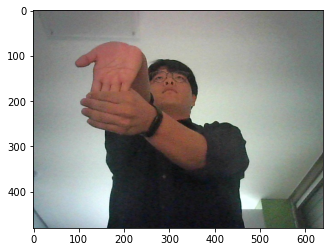

In [46]:
plt.imshow(image)